In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

Setting environment for Precision WorkStation


No vtk
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# Rename "lossless" to "raw"

for stack in all_nissl_stacks:

    for section in metadata_cache['valid_sections'][stack]:

        in_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version='jpeg', resol='lossless')

        out_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version='jpeg', resol='raw')

        create_parent_dir_if_not_exists(out_fp)
        
        execute_command('ln -s %s %s' % (in_fp, out_fp))


ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep2_raw_jpeg.jpg
1


1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_prep2_raw_jpeg.jpg


1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_prep2_raw_jpeg.jpg


1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_prep2_raw_jpeg.jpg


1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_prep2_raw_jpeg.jpg
1


ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep2_raw_jpeg.jpg
1
ln -s /data/CSHL_data_processed/MD585/MD585_prep2_lossless_jpeg/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD585/MD585_prep2_raw_jpeg/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_prep2_raw_jpeg.jpg
1


ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep2_raw_jpeg.jpg
0


ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD589/MD589_prep2_lossless_jpeg/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD589/MD589_prep2_raw_jpeg/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N17-2015.08.03-18.05.39_MD590_1_0051_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N17-2015.08.03-18.05.39_MD590_1_0051_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC17-2015.08.10-19.09.09_MD590_1_0051_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC17-2015.08.10-19.09.09_MD590_1_0051_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC23-2015.08.10-19.34.12_MD590_3_0067_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC23-2015.08.10-19.34.12_MD590_3_0067_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N23-2015.08.03-18.29.58_MD590_2_0068_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N23-2015.08.03-18.29.58_MD590_2_0068_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC23-2015.08.10-19.34.12_MD590_2_0068_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC23-2015.08.10-19.34.12_MD590_2_0068_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N23-2015.08.03-18.29.58_MD590_1_0069_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N23-2015.08.03-18.29.58_MD590_1_0069_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N32-2015.08.03-19.09.53_MD590_3_0094_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N32-2015.08.03-19.09.53_MD590_3_0094_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC32-2015.08.10-20.11.29_MD590_3_0094_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC32-2015.08.10-20.11.29_MD590_3_0094_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N32-2015.08.03-19.09.53_MD590_1_0096_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N32-2015.08.03-19.09.53_MD590_1_0096_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC32-2015.08.10-20.11.29_MD590_1_0096_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC32-2015.08.10-20.11.29_MD590_1_0096_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC40-2015.08.10-20.45.53_MD590_3_0118_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC40-2015.08.10-20.45.53_MD590_3_0118_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N40-2015.09.12-05.27.06_MD590_2_0119_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N40-2015.09.12-05.27.06_MD590_2_0119_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC40-2015.08.10-20.45.53_MD590_1_0120_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC40-2015.08.10-20.45.53_MD590_1_0120_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N41-2015.08.03-19.45.39_MD590_3_0121_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N41-2015.08.03-19.45.39_MD590_3_0121_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N49-2015.09.12-05.42.03_MD590_1_0145_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N49-2015.09.12-05.42.03_MD590_1_0145_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC49-2015.08.10-21.23.29_MD590_3_0145_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC49-2015.08.10-21.23.29_MD590_3_0145_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N49-2015.09.12-05.42.03_MD590_2_0146_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N49-2015.09.12-05.42.03_MD590_2_0146_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC49-2015.08.10-21.23.29_MD590_2_0146_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC49-2015.08.10-21.23.29_MD590_2_0146_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N59-2015.09.12-06.14.08_MD590_3_0177_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N59-2015.09.12-06.14.08_MD590_3_0177_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N60-2015.08.03-20.59.41_MD590_3_0178_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N60-2015.08.03-20.59.41_MD590_3_0178_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N60-2015.08.03-20.59.41_MD590_2_0179_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N60-2015.08.03-20.59.41_MD590_2_0179_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC60-2015.08.10-22.13.42_MD590_2_0179_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC60-2015.08.10-22.13.42_MD590_2_0179_prep2_raw_jpeg.jpg
0
ln

0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC66-2015.08.10-22.50.24_MD590_3_0196_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC66-2015.08.10-22.50.24_MD590_3_0196_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N66-2015.08.03-21.25.41_MD590_2_0197_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N66-2015.08.03-21.25.41_MD590_2_0197_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-IHC66-2015.08.10-22.50.24_MD590_2_0197_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-IHC66-2015.08.10-22.50.24_MD590_2_0197_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD590/MD590_prep2_lossless_jpeg/MD590-N66-2015.08.03-21.25.41_MD590_1_0198_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD590/MD590_prep2_raw_jpeg/MD590-N66-2015.08.03-21.25.41_MD590_1_0198_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N19-2015.08.28-04.28.05_MD591_2_0056_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N19-2015.08.28-04.28.05_MD591_2_0056_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC19-2015.08.28-04.32.33_MD591_2_0056_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC19-2015.08.28-04.32.33_MD591_2_0056_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N19-2015.08.28-04.28.05_MD591_1_0057_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N19-2015.08.28-04.28.05_MD591_1_0057_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC19-2015.08.28-04.32.33_MD591_3_0057_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC19-2015.08.28-04.32.33_MD591_3_0057_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N29-2015.08.28-05.03.06_MD591_1_0087_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N29-2015.08.28-05.03.06_MD591_1_0087_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC29-2015.08.28-05.06.08_MD591_2_0086_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC29-2015.08.28-05.06.08_MD591_2_0086_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N30-2015.08.28-05.06.50_MD591_3_0088_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N30-2015.08.28-05.06.50_MD591_3_0088_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC30-2015.08.28-05.09.44_MD591_1_0088_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC30-2015.08.28-05.09.44_MD591_1_0088_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC39-2015.08.28-05.45.26_MD591_2_0116_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC39-2015.08.28-05.45.26_MD591_2_0116_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N40-2015.08.28-05.45.06_MD591_3_0118_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N40-2015.08.28-05.45.06_MD591_3_0118_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC40-2015.08.28-05.49.54_MD591_1_0118_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC40-2015.08.28-05.49.54_MD591_1_0118_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N40-2015.08.28-05.45.06_MD591_1_0120_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N40-2015.08.28-05.45.06_MD591_1_0120_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC50-2015.08.28-06.33.46_MD591_1_0148_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC50-2015.08.28-06.33.46_MD591_1_0148_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N50-2015.08.28-06.30.55_MD591_1_0150_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N50-2015.08.28-06.30.55_MD591_1_0150_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC50-2015.08.28-06.33.46_MD591_2_0149_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC50-2015.08.28-06.33.46_MD591_2_0149_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N51-2015.08.28-06.35.26_MD591_3_0151_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N51-2015.08.28-06.35.26_MD591_3_0151_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC60-2015.08.28-07.18.31_MD591_1_0178_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC60-2015.08.28-07.18.31_MD591_1_0178_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N60-2015.08.28-07.16.38_MD591_1_0180_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N60-2015.08.28-07.16.38_MD591_1_0180_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC60-2015.08.28-07.18.31_MD591_2_0179_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC60-2015.08.28-07.18.31_MD591_2_0179_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N61-2015.08.28-07.21.28_MD591_3_0181_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N61-2015.08.28-07.21.28_MD591_3_0181_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC71-2015.08.28-08.02.41_MD591_1_0211_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC71-2015.08.28-08.02.41_MD591_1_0211_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N71-2015.08.28-08.07.29_MD591_2_0212_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N71-2015.08.28-08.07.29_MD591_2_0212_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC71-2015.08.28-08.02.41_MD591_2_0212_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC71-2015.08.28-08.02.41_MD591_2_0212_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC72-2015.08.28-08.06.06_MD591_1_0214_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC72-2015.08.28-08.06.06_MD591_1_0214_prep2_raw_jpeg.

ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N79-2015.08.28-08.40.12_MD591_3_0235_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N79-2015.08.28-08.40.12_MD591_3_0235_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC79-2015.08.28-08.35.26_MD591_1_0235_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC79-2015.08.28-08.35.26_MD591_1_0235_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-N79-2015.08.28-08.40.12_MD591_2_0236_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-N79-2015.08.28-08.40.12_MD591_2_0236_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD591/MD591_prep2_lossless_jpeg/MD591-IHC79-2015.08.28-08.35.26_MD591_2_0236_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD591/MD591_prep2_raw_jpeg/MD591-IHC79-2015.08.28-08.35.26_MD591_2_0236_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N23-2015.08.22-01.18.31_MD592_2_0068_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N23-2015.08.22-01.18.31_MD592_2_0068_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC23-2015.08.25-21.40.27_MD592_1_0069_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC23-2015.08.25-21.40.27_MD592_1_0069_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N24-2015.08.22-01.22.00_MD592_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N24-2015.08.22-01.22.00_MD592_1_0070_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC24-2015.08.25-21.44.46_MD592_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC24-2015.08.25-21.44.46_MD592_1_0070_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC34-2015.08.25-22.20.29_MD592_2_0101_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC34-2015.08.25-22.20.29_MD592_2_0101_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N34-2015.08.22-01.57.59_MD592_2_0101_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N34-2015.08.22-01.57.59_MD592_2_0101_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC34-2015.08.25-22.20.29_MD592_1_0102_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC34-2015.08.25-22.20.29_MD592_1_0102_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N35-2015.08.22-02.01.45_MD592_1_0103_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N35-2015.08.22-02.01.45_MD592_1_0103_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N44-2015.08.22-02.37.05_MD592_2_0131_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N44-2015.08.22-02.37.05_MD592_2_0131_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC44-2015.08.25-22.59.56_MD592_2_0131_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC44-2015.08.25-22.59.56_MD592_2_0131_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N45-2015.08.22-02.41.03_MD592_1_0133_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N45-2015.08.22-02.41.03_MD592_1_0133_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC45-2015.08.25-23.04.34_MD592_1_0133_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC45-2015.08.25-23.04.34_MD592_1_0133_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC55-2015.08.25-23.49.11_MD592_1_0163_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC55-2015.08.25-23.49.11_MD592_1_0163_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N55-2015.08.22-03.21.27_MD592_2_0164_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N55-2015.08.22-03.21.27_MD592_2_0164_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC55-2015.08.25-23.49.11_MD592_2_0164_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC55-2015.08.25-23.49.11_MD592_2_0164_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N56-2015.08.22-03.25.25_MD592_1_0166_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N56-2015.08.22-03.25.25_MD592_1_0166_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC65-2015.08.26-00.33.44_MD592_1_0195_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC65-2015.08.26-00.33.44_MD592_1_0195_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N66-2015.08.22-04.06.38_MD592_1_0196_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N66-2015.08.22-04.06.38_MD592_1_0196_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC66-2015.08.26-00.39.20_MD592_1_0196_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC66-2015.08.26-00.39.20_MD592_1_0196_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N66-2015.08.22-04.06.38_MD592_2_0197_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N66-2015.08.22-04.06.38_MD592_2_0197_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC72-2015.08.26-01.06.25_MD592_3_0216_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC72-2015.08.26-01.06.25_MD592_3_0216_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N73-2015.08.22-04.39.31_MD592_1_0217_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N73-2015.08.22-04.39.31_MD592_1_0217_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-IHC73-2015.08.26-01.10.51_MD592_1_0217_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-IHC73-2015.08.26-01.10.51_MD592_1_0217_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD592/MD592_prep2_lossless_jpeg/MD592-N73-2015.08.22-04.39.31_MD592_2_0218_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD592/MD592_prep2_raw_jpeg/MD592-N73-2015.08.22-04.39.31_MD592_2_0218_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC17-2015.08.25-14.55.55_MD593_2_0050_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC17-2015.08.25-14.55.55_MD593_2_0050_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC17-2015.08.25-14.55.55_MD593_1_0051_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC17-2015.08.25-14.55.55_MD593_1_0051_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N70-2015.08.21-22.06.35_MD593_2_0209_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N70-2015.08.21-22.06.35_MD593_2_0209_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-IHC70-2015.08.25-19.01.40_MD593_2_0209_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-IHC70-2015.08.25-19.01.40_MD593_2_0209_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD593/MD593_prep2_lossless_jpeg/MD593-N70-2015.08.21-22.06.35_MD593_3_0210_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD593/MD593_prep2_raw_jpeg/MD593-N70-2015.08.21-22.06.35_MD593_3_0210_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC24-2015.08.26-16.39.39_MD594_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC24-2015.08.26-16.39.39_MD594_1_0070_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC24-2015.08.26-16.39.39_MD594_2_0071_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC24-2015.08.26-16.39.39_MD594_2_0071_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N35-2015.08.26-22.51.43_MD594_2_0104_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N35-2015.08.26-22.51.43_MD594_2_0104_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC35-2015.08.26-17.18.27_MD594_2_0104_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC35-2015.08.26-17.18.27_MD594_2_0104_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N36-2015.08.26-22.55.28_MD594_1_0106_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N36-2015.08.26-22.55.28_MD594_1_0106_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC36-2015.08.26-17.22.13_MD594_1_0106_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC36-2015.08.26-17.22.13_MD594_1_0106_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC46-2015.08.26-18.02.16_MD594_2_0137_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC46-2015.08.26-18.02.16_MD594_2_0137_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N47-2015.08.26-23.38.33_MD594_1_0139_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N47-2015.08.26-23.38.33_MD594_1_0139_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N47-2015.08.26-23.38.33_MD594_2_0140_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N47-2015.08.26-23.38.33_MD594_2_0140_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC57-2015.08.26-18.45.01_MD594_1_0169_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC57-2015.08.26-18.45.01_MD594_1_0169_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC57-2015.08.26-18.45.01_MD594_2_0170_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC57-2015.08.26-18.45.01_MD594_2_0170_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_prep2_raw_jpeg.

0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N67-2015.08.27-00.56.36_MD594_2_0200_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N67-2015.08.27-00.56.36_MD594_2_0200_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC67-2015.08.26-19.23.30_MD594_2_0200_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC67-2015.08.26-19.23.30_MD594_2_0200_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N67-2015.08.27-00.56.36_MD594_3_0201_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N67-2015.08.27-00.56.36_MD594_3_0201_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N74-2015.08.27-01.27.25_MD594_3_0222_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N74-2015.08.27-01.27.25_MD594_3_0222_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-N75-2015.08.27-01.31.30_MD594_1_0223_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-N75-2015.08.27-01.31.30_MD594_1_0223_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD594/MD594_prep2_lossless_jpeg/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD594/MD594_prep2_raw_jpeg/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC16-2015.09.15-01.37.32_MD595_2_0047_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC16-2015.09.15-01.37.32_MD595_2_0047_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N16-2015.09.14-20.00.09_MD595_3_0048_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N16-2015.09.14-20.00.09_MD595_3_0048_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC16-2015.09.15-01.37.32_MD595_3_0048_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC16-2015.09.15-01.37.32_MD595_3_0048_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N17-2015.09.14-20.04.26_MD595_1_0049_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N17-2015.09.14-20.04.26_MD595_1_0049_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N23-2015.09.14-20.31.59_MD595_3_0069_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N23-2015.09.14-20.31.59_MD595_3_0069_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC23-2015.09.15-02.08.14_MD595_3_0069_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC23-2015.09.15-02.08.14_MD595_3_0069_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N24-2015.09.14-20.36.48_MD595_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N24-2015.09.14-20.36.48_MD595_1_0070_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC24-2015.09.15-02.12.56_MD595_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC24-2015.09.15-02.12.56_MD595_1_0070_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC33-2015.09.15-02.50.27_MD595_3_0097_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC33-2015.09.15-02.50.27_MD595_3_0097_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N33-2015.09.14-21.14.37_MD595_2_0098_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N33-2015.09.14-21.14.37_MD595_2_0098_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC33-2015.09.15-02.50.27_MD595_2_0098_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC33-2015.09.15-02.50.27_MD595_2_0098_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N34-2015.09.14-21.18.50_MD595_1_0100_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N34-2015.09.14-21.18.50_MD595_1_0100_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N45-2015.09.14-22.05.30_MD595_3_0133_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N45-2015.09.14-22.05.30_MD595_3_0133_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC45-2015.09.15-03.40.56_MD595_3_0133_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC45-2015.09.15-03.40.56_MD595_3_0133_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N45-2015.09.14-22.05.30_MD595_2_0134_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N45-2015.09.14-22.05.30_MD595_2_0134_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC45-2015.09.15-03.40.56_MD595_2_0134_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC45-2015.09.15-03.40.56_MD595_2_0134_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N55-2015.09.14-22.47.03_MD595_2_0164_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N55-2015.09.14-22.47.03_MD595_2_0164_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC55-2015.09.15-04.19.17_MD595_2_0164_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC55-2015.09.15-04.19.17_MD595_2_0164_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N55-2015.09.14-22.47.03_MD595_3_0165_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N55-2015.09.14-22.47.03_MD595_3_0165_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC55-2015.09.15-04.19.17_MD595_3_0165_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC55-2015.09.15-04.19.17_MD595_3_0165_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC63-2015.09.15-04.55.13_MD595_2_0188_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC63-2015.09.15-04.55.13_MD595_2_0188_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N63-2015.09.14-23.23.40_MD595_3_0189_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N63-2015.09.14-23.23.40_MD595_3_0189_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-IHC63-2015.09.15-04.55.13_MD595_3_0189_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-IHC63-2015.09.15-04.55.13_MD595_3_0189_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD595/MD595_prep2_lossless_jpeg/MD595-N64-2015.09.14-23.28.20_MD595_1_0190_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD595/MD595_prep2_raw_jpeg/MD595-N64-2015.09.14-23.28.20_MD595_1_0190_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC23-2015.09.29-23.40.02_MD598_2_0068_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC23-2015.09.29-23.40.02_MD598_2_0068_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N23-2015.09.29-18.02.11_MD598_3_0069_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N23-2015.09.29-18.02.11_MD598_3_0069_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC23-2015.09.29-23.40.02_MD598_3_0069_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC23-2015.09.29-23.40.02_MD598_3_0069_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N24-2015.09.29-18.06.44_MD598_1_0070_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N24-2015.09.29-18.06.44_MD598_1_0070_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N31-2015.09.29-18.38.16_MD598_2_0092_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N31-2015.09.29-18.38.16_MD598_2_0092_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N31-2015.09.29-18.38.16_MD598_3_0093_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N31-2015.09.29-18.38.16_MD598_3_0093_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N32-2015.09.29-18.42.57_MD598_1_0094_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N32-2015.09.29-18.42.57_MD598_1_0094_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC32-2015.09.30-00.23.36_MD598_1_0094_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC32-2015.09.30-00.23.36_MD598_1_0094_prep2_raw_jpeg.jpg
0
ln

0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N41-2015.09.29-19.22.10_MD598_1_0121_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N41-2015.09.29-19.22.10_MD598_1_0121_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC41-2015.09.30-01.01.49_MD598_1_0121_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC41-2015.09.30-01.01.49_MD598_1_0121_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N41-2015.09.29-19.22.10_MD598_2_0122_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N41-2015.09.29-19.22.10_MD598_2_0122_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC41-2015.09.30-01.01.49_MD598_2_0122_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC41-2015.09.30-01.01.49_MD598_2_0122_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N52-2015.09.29-20.06.30_MD598_1_0154_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N52-2015.09.29-20.06.30_MD598_1_0154_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC52-2015.09.30-01.43.56_MD598_1_0154_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC52-2015.09.30-01.43.56_MD598_1_0154_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N52-2015.09.29-20.06.30_MD598_2_0155_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N52-2015.09.29-20.06.30_MD598_2_0155_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC52-2015.09.30-01.43.56_MD598_2_0155_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC52-2015.09.30-01.43.56_MD598_2_0155_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC63-2015.09.30-02.25.32_MD598_1_0187_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC63-2015.09.30-02.25.32_MD598_1_0187_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N63-2015.09.29-20.49.21_MD598_2_0188_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N63-2015.09.29-20.49.21_MD598_2_0188_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC63-2015.09.30-02.25.32_MD598_2_0188_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC63-2015.09.30-02.25.32_MD598_2_0188_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N64-2015.09.29-20.53.06_MD598_1_0190_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N64-2015.09.29-20.53.06_MD598_1_0190_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N72-2015.09.29-21.25.51_MD598_1_0214_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N72-2015.09.29-21.25.51_MD598_1_0214_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC72-2015.09.30-03.00.33_MD598_1_0214_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC72-2015.09.30-03.00.33_MD598_1_0214_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-N72-2015.09.29-21.25.51_MD598_2_0215_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-N72-2015.09.29-21.25.51_MD598_2_0215_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD598/MD598_prep2_lossless_jpeg/MD598-IHC72-2015.09.30-03.00.33_MD598_2_0215_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD598/MD598_prep2_raw_jpeg/MD598-IHC72-2015.09.30-03.00.33_MD598_2_0215_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N24-2015.10.02-18.33.34_MD599_2_0071_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N24-2015.10.02-18.33.34_MD599_2_0071_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC24-2015.10.03-04.50.14_MD599_2_0071_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC24-2015.10.03-04.50.14_MD599_2_0071_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N24-2015.10.02-18.33.34_MD599_3_0072_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N24-2015.10.02-18.33.34_MD599_3_0072_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC24-2015.10.03-04.50.14_MD599_3_0072_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC24-2015.10.03-04.50.14_MD599_3_0072_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N31-2015.10.02-19.07.42_MD599_2_0092_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N31-2015.10.02-19.07.42_MD599_2_0092_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N31-2015.10.02-19.07.42_MD599_3_0093_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N31-2015.10.02-19.07.42_MD599_3_0093_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC31-2015.10.03-05.25.00_MD599_3_0093_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC31-2015.10.03-05.25.00_MD599_3_0093_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N32-2015.10.02-19.12.45_MD599_1_0094_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N32-2015.10.02-19.12.45_MD599_1_0094_prep2_raw_jpeg.jpg
0
ln -

0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC43-2015.10.03-06.18.27_MD599_1_0127_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC43-2015.10.03-06.18.27_MD599_1_0127_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N43-2015.10.05-11.03.53_MD599_2_0128_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N43-2015.10.05-11.03.53_MD599_2_0128_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC43-2015.10.03-06.18.27_MD599_2_0128_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC43-2015.10.03-06.18.27_MD599_2_0128_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N44-2015.10.05-11.08.14_MD599_1_0130_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N44-2015.10.05-11.08.14_MD599_1_0130_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N60-2015.10.05-12.16.09_MD599_1_0178_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N60-2015.10.05-12.16.09_MD599_1_0178_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC60-2015.10.03-07.30.13_MD599_1_0178_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC60-2015.10.03-07.30.13_MD599_1_0178_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N60-2015.10.05-12.16.09_MD599_2_0179_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N60-2015.10.05-12.16.09_MD599_2_0179_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC60-2015.10.03-07.30.13_MD599_2_0179_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC60-2015.10.03-07.30.13_MD599_2_0179_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC69-2015.10.03-08.27.02_MD599_3_0207_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC69-2015.10.03-08.27.02_MD599_3_0207_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N70-2015.10.05-13.01.28_MD599_1_0208_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N70-2015.10.05-13.01.28_MD599_1_0208_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-IHC70-2015.10.03-08.31.53_MD599_3_0208_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-IHC70-2015.10.03-08.31.53_MD599_3_0208_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD599/MD599_prep2_lossless_jpeg/MD599-N70-2015.10.05-13.01.28_MD599_2_0209_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD599/MD599_prep2_raw_jpeg/MD599-N70-2015.10.05-13.01.28_MD599_2_0209_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC21-2015.12.01-22.57.14_MD602_3_0063_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC21-2015.12.01-22.57.14_MD602_3_0063_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N22-2015.12.01-16.40.03_MD602_1_0064_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N22-2015.12.01-16.40.03_MD602_1_0064_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N22-2015.12.01-16.40.03_MD602_2_0065_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N22-2015.12.01-16.40.03_MD602_2_0065_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N22-2015.12.01-16.40.03_MD602_1_0066_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N22-2015.12.01-16.40.03_MD602_1_0066_prep2_raw_jpeg.jpg
0
ln

ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC33-2015.12.01-23.48.16_MD602_1_0097_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC33-2015.12.01-23.48.16_MD602_1_0097_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N33-2015.12.01-17.31.52_MD602_2_0098_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N33-2015.12.01-17.31.52_MD602_2_0098_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC33-2015.12.01-23.48.16_MD602_2_0098_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC33-2015.12.01-23.48.16_MD602_2_0098_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N34-2015.12.01-17.36.30_MD602_1_0100_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N34-2015.12.01-17.36.30_MD602_1_0100_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N44-2015.12.01-18.21.46_MD602_2_0131_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N44-2015.12.01-18.21.46_MD602_2_0131_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC44-2015.12.02-00.41.07_MD602_2_0131_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC44-2015.12.02-00.41.07_MD602_2_0131_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N45-2015.12.01-18.26.41_MD602_3_0133_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N45-2015.12.01-18.26.41_MD602_3_0133_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC45-2015.12.02-00.46.10_MD602_3_0133_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC45-2015.12.02-00.46.10_MD602_3_0133_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N53-2015.12.01-19.00.23_MD602_2_0158_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N53-2015.12.01-19.00.23_MD602_2_0158_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC53-2015.12.02-01.24.02_MD602_2_0158_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC53-2015.12.02-01.24.02_MD602_2_0158_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N54-2015.12.01-19.05.04_MD602_1_0160_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N54-2015.12.01-19.05.04_MD602_1_0160_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC54-2015.12.02-01.28.38_MD602_1_0160_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC54-2015.12.02-01.28.38_MD602_1_0160_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC61-2015.12.02-01.59.23_MD602_1_0183_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC61-2015.12.02-01.59.23_MD602_1_0183_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N62-2015.12.01-19.41.37_MD602_3_0184_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N62-2015.12.01-19.41.37_MD602_3_0184_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N62-2015.12.01-19.41.37_MD602_2_0185_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N62-2015.12.01-19.41.37_MD602_2_0185_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC62-2015.12.02-02.04.52_MD602_2_0185_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC62-2015.12.02-02.04.52_MD602_2_0185_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N68-2015.12.01-20.12.46_MD602_1_0202_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N68-2015.12.01-20.12.46_MD602_1_0202_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC68-2015.12.02-02.37.54_MD602_1_0202_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC68-2015.12.02-02.37.54_MD602_1_0202_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N68-2015.12.01-20.12.46_MD602_2_0203_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N68-2015.12.01-20.12.46_MD602_2_0203_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC68-2015.12.02-02.37.54_MD602_2_0203_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC68-2015.12.02-02.37.54_MD602_2_0203_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N73-2015.12.01-20.37.44_MD602_3_0219_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N73-2015.12.01-20.37.44_MD602_3_0219_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC73-2015.12.02-03.03.52_MD602_3_0219_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC73-2015.12.02-03.03.52_MD602_3_0219_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-N74-2015.12.01-20.42.32_MD602_1_0220_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-N74-2015.12.01-20.42.32_MD602_1_0220_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD602/MD602_prep2_lossless_jpeg/MD602-IHC74-2015.12.02-03.08.43_MD602_1_0220_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD602/MD602_prep2_raw_jpeg/MD602-IHC74-2015.12.02-03.08.43_MD602_1_0220_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N15-2015.12.03-20.49.06_MD603_3_0043_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N15-2015.12.03-20.49.06_MD603_3_0043_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC15-2015.12.03-14.27.41_MD603_3_0043_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC15-2015.12.03-14.27.41_MD603_3_0043_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N15-2015.12.03-20.49.06_MD603_2_0044_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N15-2015.12.03-20.49.06_MD603_2_0044_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC15-2015.12.03-14.27.41_MD603_2_0044_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC15-2015.12.03-14.27.41_MD603_2_0044_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC24-2015.12.03-15.06.33_MD603_2_0071_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC24-2015.12.03-15.06.33_MD603_2_0071_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N24-2015.12.03-21.24.20_MD603_1_0072_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N24-2015.12.03-21.24.20_MD603_1_0072_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC24-2015.12.03-15.06.33_MD603_1_0072_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC24-2015.12.03-15.06.33_MD603_1_0072_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N25-2015.12.03-21.27.32_MD603_3_0073_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N25-2015.12.03-21.27.32_MD603_3_0073_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N37-2015.12.03-22.11.43_MD603_2_0110_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N37-2015.12.03-22.11.43_MD603_2_0110_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC37-2015.12.03-15.57.19_MD603_3_0109_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC37-2015.12.03-15.57.19_MD603_3_0109_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N37-2015.12.03-22.11.43_MD603_1_0111_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N37-2015.12.03-22.11.43_MD603_1_0111_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC37-2015.12.03-15.57.19_MD603_1_0111_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC37-2015.12.03-15.57.19_MD603_1_0111_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC48-2016.03.02-15.41.39_MD603_2_0143_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC48-2016.03.02-15.41.39_MD603_2_0143_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N49-2016.03.02-13.30.24_MD603_1_0145_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N49-2016.03.02-13.30.24_MD603_1_0145_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC49-2015.12.03-16.53.29_MD603_3_0145_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC49-2015.12.03-16.53.29_MD603_3_0145_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N49-2016.03.02-13.30.24_MD603_2_0146_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N49-2016.03.02-13.30.24_MD603_2_0146_prep2_raw_jpeg.jpg


ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC57-2015.12.03-17.30.32_MD603_3_0169_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC57-2015.12.03-17.30.32_MD603_3_0169_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N57-2015.12.03-23.41.51_MD603_2_0170_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N57-2015.12.03-23.41.51_MD603_2_0170_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC57-2015.12.03-17.30.32_MD603_1_0171_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC57-2015.12.03-17.30.32_MD603_1_0171_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N58-2015.12.03-23.47.19_MD603_3_0172_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N58-2015.12.03-23.47.19_MD603_3_0172_prep2_raw_jpeg.jpg
0


0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N66-2016.03.02-14.06.12_MD603_1_0196_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N66-2016.03.02-14.06.12_MD603_1_0196_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC66-2015.12.03-18.11.47_MD603_3_0196_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC66-2015.12.03-18.11.47_MD603_3_0196_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N66-2016.03.02-14.06.12_MD603_2_0197_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N66-2016.03.02-14.06.12_MD603_2_0197_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC66-2015.12.03-18.11.47_MD603_1_0198_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC66-2015.12.03-18.11.47_MD603_1_0198_prep2_raw_jpeg.jpg


0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC73-2015.12.03-18.45.22_MD603_3_0217_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC73-2015.12.03-18.45.22_MD603_3_0217_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N73-2016.03.02-14.27.05_MD603_2_0218_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N73-2016.03.02-14.27.05_MD603_2_0218_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-IHC73-2015.12.03-18.45.22_MD603_2_0218_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-IHC73-2015.12.03-18.45.22_MD603_2_0218_prep2_raw_jpeg.jpg
0
ln -s /data/CSHL_data_processed/MD603/MD603_prep2_lossless_jpeg/MD603-N73-2016.03.02-14.27.05_MD603_3_0219_prep2_lossless_jpeg.jpg /data/CSHL_data_processed/MD603/MD603_prep2_raw_jpeg/MD603-N73-2016.03.02-14.27.05_MD603_3_0219_prep2_raw_jpeg.jpg


In [22]:
stack = 'MD585'

In [23]:
from skimage.transform import warp

In [24]:
_, sections_to_filenames = DataManager.load_sorted_filenames(stack=stack, redownload=True) 
valid_filenames = [fn for fn in sections_to_filenames.values() if not is_invalid(fn=fn)]
print len(valid_filenames), 'valid filenames'

rm -rf "/data/CSHL_data_processed/MD585/MD585_sorted_filenames.txt" && mkdir -p "/data/CSHL_data_processed/MD585"
0
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_sorted_filenames.txt" "/data/CSHL_data_processed/MD585/MD585_sorted_filenames.txt"
0
439 valid filenames


In [ ]:
def convert_image_types(from_type, to_type):
    
    from_prep_id = from_type['prep_id']
    to_prep_id = to_type['prep_id']
    
    if from_prep_id is None and to_prep_id == 1: # in-plane alignment
        pass
    
    elif (from_prep_id == 1 or from_prep_id == 'alignedPadded') and (to_prep_id == 5 or to_prep_id == 'alignedWithMargin'): # alignedPadded to alignedWithMargin
    
        alignedWithMargin_xmin, alignedWithMargin_xmax,\
        alignedWithMargin_ymin, alignedWithMargin_ymax = DataManager.load_cropbox_v2(stack=stack, anchor_fn=None, 
                                                            prep_id='alignedWithMargin',
                                                           return_dict=False, only_2d=True)
        
        in_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=1, section=section, version=version, resol='thumbnail')

        out_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=5, section=section, version=version, resol='thumbnail')

        create_parent_dir_if_not_exists(out_fp)

        t = time.time()
        im_prep1 = imread(in_fp)
        im_prep5 = im_prep1[alignedWithMargin_ymin:alignedWithMargin_ymax+1, 
                            alignedWithMargin_xmin:alignedWithMargin_xmax+1]        
        save_data(im_prep5, out_fp)            
        sys.stderr.write('Crop alignedPadded to generate alignedWithMargin: %.2f seconds.\n' % (time.time() - t))
        
    elif from_prep_id == 1 and to_prep_id == 2: # alignedWithMargin to alignedBrainstemCrop
        



In [76]:
def convert_tif_to_jpeg(in_fp, out_fp):
    t = time.time()
    execute_command("convert %(in_fp)s %(out_fp)s" % {'in_fp': in_fp, 'out_fp': out_fp})
    sys.stderr.write('Convert to JPEG: %.2f seconds.\n' % (time.time() - t))

In [75]:
# Convert to gray

for stack in ['MD593']:

    for section in metadata_cache['valid_sections'][stack]:

        in_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version=None, resol='raw')

        out_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version='gray', resol='raw')

        create_parent_dir_if_not_exists(out_fp)

#         t = time.time()
#         im_rgb = imread(in_fp)
#         sys.stderr.write('Load: %.2f seconds.\n' % (time.time() - t))
        
#         t = time.time()
#         im_gray = img_as_ubyte(rgb2gray(im_rgb))
# #         im_gray = im_rgb[..., 2]
#         sys.stderr.write('Convert RGB to gray: %.2f seconds.\n' % (time.time() - t))
        
#         t = time.time()
#         save_data(im_gray, out_fp)
#         sys.stderr.write('Save: %.2f seconds.\n' % (time.time() - t))

        t = time.time()
        im_rgb = imread(in_fp)
        sys.stderr.write('Load: %.2f seconds.\n' % (time.time() - t))
        
        t = time.time()
        im_gray = img_as_ubyte(rgb2gray(im_rgb))
#         im_gray = im_rgb[..., 2]
        sys.stderr.write('Convert RGB to gray: %.2f seconds.\n' % (time.time() - t))
        
        t = time.time()
        save_data(im_gray, out_fp, upload_s3=False)
        sys.stderr.write('Save: %.2f seconds.\n' % (time.time() - t))
        
#         upload_to_s3(out_fp)

Load: 8.38 seconds.
Convert RGB to gray: 16.05 seconds.
Save: 2.78 seconds.
Load: 7.67 seconds.
Convert RGB to gray: 14.22 seconds.
Save: 2.68 seconds.
Load: 8.50 seconds.
Convert RGB to gray: 14.08 seconds.
Save: 2.82 seconds.
Load: 8.59 seconds.
Convert RGB to gray: 11.91 seconds.
Save: 2.63 seconds.
Load: 8.26 seconds.
Convert RGB to gray: 11.98 seconds.
Save: 1.88 seconds.
Load: 8.31 seconds.
Convert RGB to gray: 11.85 seconds.
Save: 2.73 seconds.
Load: 8.28 seconds.
Convert RGB to gray: 11.74 seconds.
Save: 1.65 seconds.
Load: 8.34 seconds.
Convert RGB to gray: 11.84 seconds.
Save: 3.12 seconds.
Load: 8.10 seconds.
Convert RGB to gray: 11.65 seconds.
Save: 1.80 seconds.
Load: 8.31 seconds.
Convert RGB to gray: 12.08 seconds.
Save: 1.87 seconds.
Load: 8.22 seconds.
Convert RGB to gray: 11.55 seconds.
Save: 2.47 seconds.
Load: 8.41 seconds.
Convert RGB to gray: 11.47 seconds.
Save: 2.52 seconds.
Load: 8.12 seconds.
Convert RGB to gray: 11.57 seconds.
Save: 2.90 seconds.
Load: 8.03 s

Save: 1.48 seconds.
Load: 10.79 seconds.
Convert RGB to gray: 14.69 seconds.
Save: 1.40 seconds.
Load: 10.15 seconds.
Convert RGB to gray: 14.75 seconds.
Save: 1.37 seconds.
Load: 9.11 seconds.
Convert RGB to gray: 15.52 seconds.
Save: 1.41 seconds.
Load: 8.92 seconds.
Convert RGB to gray: 15.42 seconds.
Save: 1.84 seconds.
Load: 8.80 seconds.
Convert RGB to gray: 13.64 seconds.
Save: 1.40 seconds.
Load: 9.47 seconds.
Convert RGB to gray: 13.91 seconds.
Save: 0.86 seconds.
Load: 10.57 seconds.
Convert RGB to gray: 13.85 seconds.
Save: 1.06 seconds.
Load: 8.98 seconds.
Convert RGB to gray: 15.91 seconds.
Save: 1.10 seconds.
Load: 9.30 seconds.
Convert RGB to gray: 13.93 seconds.
Save: 1.25 seconds.
Load: 9.50 seconds.
Convert RGB to gray: 14.57 seconds.
Save: 1.55 seconds.
Load: 9.26 seconds.
Convert RGB to gray: 14.01 seconds.
Save: 1.51 seconds.
Load: 9.11 seconds.
Convert RGB to gray: 14.72 seconds.
Save: 1.09 seconds.
Load: 9.21 seconds.
Convert RGB to gray: 14.16 seconds.
Save: 0.8

Convert RGB to gray: 14.03 seconds.
Save: 1.52 seconds.
Load: 9.56 seconds.
Convert RGB to gray: 15.26 seconds.
Save: 1.47 seconds.
Load: 9.42 seconds.
Convert RGB to gray: 14.45 seconds.
Save: 1.11 seconds.
Load: 10.52 seconds.
Convert RGB to gray: 14.57 seconds.
Save: 1.38 seconds.
Load: 9.56 seconds.
Convert RGB to gray: 14.61 seconds.
Save: 1.00 seconds.
Load: 9.50 seconds.
Convert RGB to gray: 16.16 seconds.
Save: 1.64 seconds.
Load: 10.62 seconds.
Convert RGB to gray: 15.20 seconds.
Save: 1.25 seconds.
Load: 10.95 seconds.
Convert RGB to gray: 14.52 seconds.
Save: 1.59 seconds.
Load: 10.44 seconds.
Convert RGB to gray: 14.84 seconds.
Save: 1.10 seconds.
Load: 10.82 seconds.
Convert RGB to gray: 15.30 seconds.
Save: 1.08 seconds.
Load: 9.88 seconds.
Convert RGB to gray: 14.97 seconds.
Save: 1.36 seconds.
Load: 8.33 seconds.
Convert RGB to gray: 15.14 seconds.
Save: 0.65 seconds.
Load: 9.81 seconds.
Convert RGB to gray: 14.84 seconds.
Save: 1.64 seconds.
Load: 8.84 seconds.
Convert

In [77]:
# Convert to JPEG

for stack in ['MD593']:

    for section in metadata_cache['valid_sections'][stack]:

        in_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version='gray', resol='raw')

        out_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version='grayJpeg', resol='raw')

        create_parent_dir_if_not_exists(out_fp)

        convert_tif_to_jpeg(in_fp, out_fp)
        
#         upload_to_s3(out_fp)

convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_lossless_grayJpeg.jpg
0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC15-2015.08.25-14.46.05_MD593_1_0045_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC15-2015.08.25-14.46.05_MD593_1_0045_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.44 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N16-2015.08.21-16.56.51_MD593_1_0046_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N16-2015.08.21-16.56.51_MD593_1_0046_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.29 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC16-2015.08.25-14.51.12_MD593_3_0046_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC16-2015.08.25-14.51.12_MD593_3_0046_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.29 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N16-2015.08.21-16.56.51_MD593_2_0047_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N16-2015.08.21-16.56.51_MD593_2_0047_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.48 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC16-2015.08.25-14.51.12_MD593_2_0047_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC16-2015.08.25-14.51.12_MD593_2_0047_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.63 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N16-2015.08.21-16.56.51_MD593_3_0048_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N16-2015.08.21-16.56.51_MD593_3_0048_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.36 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC16-2015.08.25-14.51.12_MD593_1_0048_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC16-2015.08.25-14.51.12_MD593_1_0048_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.19 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N17-2015.08.21-17.24.35_MD593_1_0049_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N17-2015.08.21-17.24.35_MD593_1_0049_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.32 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC17-2015.08.25-14.55.55_MD593_3_0049_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC17-2015.08.25-14.55.55_MD593_3_0049_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.15 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N17-2015.08.21-17.24.35_MD593_2_0050_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N17-2015.08.21-17.24.35_MD593_2_0050_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.27 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC17-2015.08.25-14.55.55_MD593_2_0050_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC17-2015.08.25-14.55.55_MD593_2_0050_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.96 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.67 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC17-2015.08.25-14.55.55_MD593_1_0051_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC17-2015.08.25-14.55.55_MD593_1_0051_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.47 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.24 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC18-2015.08.25-15.01.03_MD593_3_0052_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC18-2015.08.25-15.01.03_MD593_3_0052_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.34 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N18-2015.08.21-17.28.26_MD593_2_0053_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N18-2015.08.21-17.28.26_MD593_2_0053_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.45 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC18-2015.08.25-15.01.03_MD593_2_0053_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC18-2015.08.25-15.01.03_MD593_2_0053_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N18-2015.08.21-17.28.26_MD593_3_0054_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N18-2015.08.21-17.28.26_MD593_3_0054_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.52 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC18-2015.08.25-15.01.03_MD593_1_0054_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC18-2015.08.25-15.01.03_MD593_1_0054_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.17 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N19-2015.08.21-17.32.20_MD593_1_0055_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N19-2015.08.21-17.32.20_MD593_1_0055_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.45 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC19-2015.08.25-15.05.56_MD593_1_0055_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC19-2015.08.25-15.05.56_MD593_1_0055_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.64 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N19-2015.08.21-17.32.20_MD593_2_0056_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N19-2015.08.21-17.32.20_MD593_2_0056_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.95 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC19-2015.08.25-15.05.56_MD593_2_0056_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC19-2015.08.25-15.05.56_MD593_2_0056_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.59 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N19-2015.08.21-17.32.20_MD593_3_0057_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N19-2015.08.21-17.32.20_MD593_3_0057_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.31 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC19-2015.08.25-15.05.56_MD593_3_0057_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC19-2015.08.25-15.05.56_MD593_3_0057_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.53 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC20-2015.08.25-15.11.02_MD593_3_0058_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC20-2015.08.25-15.11.02_MD593_3_0058_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.48 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N20-2015.08.21-17.37.43_MD593_1_0058_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N20-2015.08.21-17.37.43_MD593_1_0058_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.28 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC20-2015.08.25-15.11.02_MD593_2_0059_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.47 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N20-2015.08.21-17.37.43_MD593_2_0059_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.65 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC20-2015.08.25-15.11.02_MD593_1_0060_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC20-2015.08.25-15.11.02_MD593_1_0060_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.32 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N21-2015.08.21-17.40.37_MD593_1_0061_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.26 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC21-2015.08.25-15.16.07_MD593_1_0061_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC21-2015.08.25-15.16.07_MD593_1_0061_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.43 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N21-2015.08.21-17.40.37_MD593_2_0062_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.67 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC21-2015.08.25-15.16.07_MD593_2_0062_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC21-2015.08.25-15.16.07_MD593_2_0062_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N21-2015.08.21-17.40.37_MD593_3_0063_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.00 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC21-2015.08.25-15.16.07_MD593_3_0063_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC21-2015.08.25-15.16.07_MD593_3_0063_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.22 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N22-2015.08.21-17.44.40_MD593_1_0064_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.35 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC22-2015.08.25-15.21.05_MD593_1_0064_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC22-2015.08.25-15.21.05_MD593_1_0064_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.37 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N22-2015.08.21-17.44.40_MD593_2_0065_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N22-2015.08.21-17.44.40_MD593_2_0065_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.12 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC22-2015.08.25-15.21.05_MD593_2_0065_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC22-2015.08.25-15.21.05_MD593_2_0065_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.25 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N22-2015.08.21-17.44.40_MD593_3_0066_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N22-2015.08.21-17.44.40_MD593_3_0066_prep2_lossless_grayJpeg.jpg


Convert to gray: 6.14 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC22-2015.08.25-15.21.05_MD593_3_0066_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC22-2015.08.25-15.21.05_MD593_3_0066_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.17 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N23-2015.08.21-17.48.50_MD593_1_0067_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.09 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0067_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.21 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N23-2015.08.21-17.48.50_MD593_2_0068_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.46 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC23-2015.08.25-15.25.09_MD593_2_0068_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.29 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N23-2015.08.21-17.48.50_MD593_3_0069_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.22 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC23-2015.08.25-15.25.09_MD593_3_0069_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.98 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_1_0070_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.94 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_1_0070_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.20 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_2_0071_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.52 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_2_0071_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.25 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N24-2015.08.21-17.52.55_MD593_3_0072_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.33 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC24-2015.08.25-15.30.48_MD593_3_0072_prep2_lossless_grayJpeg.jpg


Convert to gray: 6.04 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_1_0073_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.72 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N25-2015.08.21-17.57.04_MD593_1_0073_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_2_0074_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.23 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N25-2015.08.21-17.57.04_MD593_2_0074_prep2_lossless_grayJpeg.jpg


Convert to gray: 6.02 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC25-2015.08.25-15.35.47_MD593_3_0075_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.48 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_3_0076_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.42 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_1_0076_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.31 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_2_0077_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.68 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_2_0077_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.19 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N26-2015.08.21-18.00.10_MD593_1_0078_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.80 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC26-2015.08.25-15.40.04_MD593_3_0078_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.32 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_3_0079_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.82 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_1_0079_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.54 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_2_0080_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.39 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_2_0080_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.59 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N27-2015.08.21-18.04.16_MD593_3_0081_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.88 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC27-2015.08.25-15.45.27_MD593_3_0081_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.35 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N28-2015.08.21-18.08.31_MD593_3_0082_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.42 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC28-2015.08.25-15.50.11_MD593_1_0082_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.44 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N28-2015.08.21-18.08.31_MD593_2_0083_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.55 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC28-2015.08.25-15.50.11_MD593_2_0083_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.51 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N29-2015.08.21-18.11.43_MD593_1_0085_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.27 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC29-2015.08.25-15.53.59_MD593_1_0085_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.67 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N29-2015.08.21-18.11.43_MD593_2_0086_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.26 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC29-2015.08.25-15.53.59_MD593_2_0086_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.06 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N30-2015.08.21-18.14.53_MD593_1_0088_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.53 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC30-2015.08.25-15.57.47_MD593_1_0088_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.67 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N30-2015.08.21-18.14.53_MD593_2_0089_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.35 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC30-2015.08.25-15.57.47_MD593_2_0089_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.55 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_1_0091_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_1_0091_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.52 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N31-2015.08.21-18.18.47_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.25 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC31-2015.08.25-16.01.57_MD593_2_0092_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.23 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.76 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_1_0094_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.22 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N32-2015.08.21-18.22.50_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.70 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC32-2015.08.25-16.06.12_MD593_2_0095_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.18 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.69 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_1_0097_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.53 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N33-2015.08.21-18.26.55_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.47 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC33-2015.08.25-16.10.45_MD593_2_0098_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.70 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.95 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_1_0100_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.19 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N34-2015.08.21-18.31.01_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.83 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC34-2015.08.25-16.15.25_MD593_2_0101_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.80 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.39 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_1_0103_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.58 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N35-2015.08.21-18.35.03_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.84 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC35-2015.08.25-16.19.12_MD593_2_0104_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.48 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.77 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_1_0106_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.51 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N36-2015.08.21-18.38.59_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.31 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC36-2015.08.25-16.23.09_MD593_2_0107_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.31 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.56 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_1_0109_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.31 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N37-2015.08.21-18.42.46_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.86 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC37-2015.08.25-16.27.08_MD593_2_0110_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.43 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.28 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_1_0112_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.58 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N38-2015.08.21-18.46.37_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.74 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC38-2015.08.25-16.31.11_MD593_2_0113_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.80 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.44 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_1_0115_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.55 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N39-2015.08.21-18.50.29_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.40 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC39-2015.08.25-16.35.48_MD593_2_0116_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.64 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.55 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_1_0118_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.56 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N40-2015.08.21-18.54.23_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.54 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC40-2015.08.25-16.40.32_MD593_2_0119_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.68 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_1_0121_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.42 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_3_0121_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.45 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N41-2015.08.21-18.58.12_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.70 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC41-2015.08.25-16.44.46_MD593_2_0122_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.62 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.62 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_1_0124_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N42-2015.08.21-19.02.05_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.28 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC42-2015.08.25-16.48.47_MD593_2_0125_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.40 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_1_0127_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.65 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N43-2015.08.21-19.06.05_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC43-2015.08.25-16.52.59_MD593_2_0128_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.36 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.45 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_1_0130_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.39 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N44-2015.08.21-19.09.58_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.57 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC44-2015.08.25-16.57.44_MD593_2_0131_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.40 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_1_0133_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.69 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_3_0133_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.51 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N45-2015.08.21-19.13.46_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.46 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC45-2015.08.25-17.01.48_MD593_2_0134_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_1_0136_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.39 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.37 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N46-2015.08.21-19.17.33_MD593_2_0137_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.31 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC46-2015.08.25-17.06.23_MD593_1_0138_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.39 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.56 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_1_0139_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.53 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N47-2015.08.21-19.21.24_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.80 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC47-2015.08.25-17.10.52_MD593_2_0140_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.56 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.44 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_1_0142_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.40 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N48-2015.08.21-19.25.07_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.83 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC48-2015.08.25-17.15.16_MD593_2_0143_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.82 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.57 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_1_0145_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.24 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N49-2015.08.21-20.33.12_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Convert to gray: 6.10 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC49-2015.08.25-17.19.32_MD593_2_0146_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.56 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.82 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_1_0148_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.81 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N50-2015.08.21-20.37.13_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.60 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC50-2015.08.25-17.23.34_MD593_2_0149_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.92 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.79 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_1_0151_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.44 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N51-2015.08.21-20.41.02_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.94 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC51-2015.08.25-17.27.42_MD593_2_0152_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.64 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.91 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_1_0154_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.59 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N52-2015.08.21-20.44.55_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.75 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC52-2015.08.25-17.32.03_MD593_2_0155_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.30 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.78 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_1_0157_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.78 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N53-2015.08.21-20.49.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.92 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC53-2015.08.25-17.36.15_MD593_2_0158_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.25 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.58 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_1_0160_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.66 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N54-2015.08.21-20.53.07_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.86 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC54-2015.08.25-17.40.32_MD593_2_0161_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.92 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.86 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_1_0163_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.47 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N55-2015.08.21-20.56.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.60 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC55-2015.08.25-17.44.55_MD593_2_0164_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.91 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_3_0166_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.82 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_1_0166_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.91 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_2_0167_prep2_lossless_grayJpeg.jpg


Convert to gray: 6.01 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_2_0167_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.76 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N56-2015.08.21-21.00.48_MD593_1_0168_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.63 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC56-2015.08.25-17.49.01_MD593_3_0168_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.79 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_3_0169_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.48 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_3_0169_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.41 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_2_0170_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.54 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_2_0170_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.87 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N57-2015.08.21-21.05.45_MD593_1_0171_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.95 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC57-2015.08.25-17.54.27_MD593_1_0171_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.92 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_1_0172_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.37 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N58-2015.08.21-21.10.36_MD593_1_0172_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.68 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_2_0173_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.34 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N58-2015.08.21-21.10.36_MD593_2_0173_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.90 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC58-2015.08.25-18.00.03_MD593_3_0174_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.40 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_1_0175_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.56 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_1_0175_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.42 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_2_0176_prep2_lossless_grayJpeg.jpg


Convert to gray: 6.10 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_2_0176_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.27 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N59-2015.08.21-21.13.53_MD593_3_0177_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.49 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC59-2015.08.25-18.05.22_MD593_3_0177_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.69 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_1_0178_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.78 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_1_0178_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.74 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_2_0179_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.80 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_2_0179_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.58 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N60-2015.08.21-21.18.45_MD593_3_0180_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.38 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC60-2015.08.25-18.10.43_MD593_3_0180_prep2_lossless_grayJpeg.jpg


Convert to gray: 6.25 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_1_0181_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.48 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_1_0181_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.26 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_2_0182_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.79 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_2_0182_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.56 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N61-2015.08.21-21.24.25_MD593_3_0183_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.88 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC61-2015.08.25-18.16.06_MD593_3_0183_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.75 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_1_0184_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.58 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_1_0184_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.38 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_2_0185_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.82 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_2_0185_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.46 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N62-2015.08.21-21.29.21_MD593_3_0186_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.21 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC62-2015.08.25-18.20.55_MD593_3_0186_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.76 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N63-2015.08.21-21.34.06_MD593_1_0187_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.40 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_3_0187_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.59 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N63-2015.08.21-21.34.06_MD593_2_0188_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N63-2015.08.21-21.34.06_MD593_2_0188_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.68 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_2_0188_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.42 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N63-2015.08.21-21.34.06_MD593_3_0189_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.20 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC63-2015.08.25-18.25.27_MD593_1_0189_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.89 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N64-2015.08.21-21.38.56_MD593_1_0190_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.43 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC64-2015.08.25-18.30.40_MD593_3_0190_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.35 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N64-2015.08.21-21.38.56_MD593_2_0191_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.40 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC64-2015.08.25-18.30.40_MD593_2_0191_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.67 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N64-2015.08.21-21.38.56_MD593_3_0192_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.96 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC64-2015.08.25-18.30.40_MD593_1_0192_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC64-2015.08.25-18.30.40_MD593_1_0192_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.05 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N65-2015.08.21-21.43.42_MD593_1_0193_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N65-2015.08.21-21.43.42_MD593_1_0193_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.80 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC65-2015.08.25-18.35.54_MD593_1_0193_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.09 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N65-2015.08.21-21.43.42_MD593_2_0194_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.27 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC65-2015.08.25-18.35.54_MD593_2_0194_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.00 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N65-2015.08.21-21.43.42_MD593_3_0195_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.18 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC65-2015.08.25-18.35.54_MD593_3_0195_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.73 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC66-2015.08.25-18.40.38_MD593_3_0196_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.39 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N66-2015.08.21-21.48.27_MD593_2_0197_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N66-2015.08.21-21.48.27_MD593_2_0197_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.12 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC66-2015.08.25-18.40.38_MD593_2_0197_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC66-2015.08.25-18.40.38_MD593_2_0197_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.95 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N66-2015.08.21-21.48.27_MD593_3_0198_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N66-2015.08.21-21.48.27_MD593_3_0198_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.02 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC66-2015.08.25-18.40.38_MD593_1_0198_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC66-2015.08.25-18.40.38_MD593_1_0198_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.82 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N67-2015.08.21-21.53.17_MD593_1_0199_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N67-2015.08.21-21.53.17_MD593_1_0199_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.97 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC67-2015.08.25-18.45.58_MD593_3_0199_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC67-2015.08.25-18.45.58_MD593_3_0199_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.66 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N67-2015.08.21-21.53.17_MD593_2_0200_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N67-2015.08.21-21.53.17_MD593_2_0200_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.84 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC67-2015.08.25-18.45.58_MD593_2_0200_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC67-2015.08.25-18.45.58_MD593_2_0200_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.48 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N67-2015.08.21-21.53.17_MD593_3_0201_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N67-2015.08.21-21.53.17_MD593_3_0201_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.00 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC67-2015.08.25-18.45.58_MD593_1_0201_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC67-2015.08.25-18.45.58_MD593_1_0201_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.02 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N68-2015.08.21-21.57.49_MD593_1_0202_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N68-2015.08.21-21.57.49_MD593_1_0202_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.76 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC68-2015.08.25-18.51.08_MD593_3_0202_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC68-2015.08.25-18.51.08_MD593_3_0202_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.19 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N68-2015.08.21-21.57.49_MD593_2_0203_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N68-2015.08.21-21.57.49_MD593_2_0203_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.67 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC68-2015.08.25-18.51.08_MD593_2_0203_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC68-2015.08.25-18.51.08_MD593_2_0203_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.74 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N68-2015.08.21-21.57.49_MD593_3_0204_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N68-2015.08.21-21.57.49_MD593_3_0204_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.61 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC68-2015.08.25-18.51.08_MD593_1_0204_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC68-2015.08.25-18.51.08_MD593_1_0204_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.18 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N69-2015.08.21-22.02.13_MD593_1_0205_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N69-2015.08.21-22.02.13_MD593_1_0205_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.22 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC69-2015.08.25-18.56.25_MD593_3_0205_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC69-2015.08.25-18.56.25_MD593_3_0205_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.05 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N69-2015.08.21-22.02.13_MD593_2_0206_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N69-2015.08.21-22.02.13_MD593_2_0206_prep2_lossless_grayJpeg.jpg


Convert to gray: 5.91 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC69-2015.08.25-18.56.25_MD593_2_0206_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC69-2015.08.25-18.56.25_MD593_2_0206_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.32 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N69-2015.08.21-22.02.13_MD593_3_0207_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N69-2015.08.21-22.02.13_MD593_3_0207_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.01 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC69-2015.08.25-18.56.25_MD593_1_0207_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC69-2015.08.25-18.56.25_MD593_1_0207_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.08 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N70-2015.08.21-22.06.35_MD593_1_0208_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N70-2015.08.21-22.06.35_MD593_1_0208_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.08 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC70-2015.08.25-19.01.40_MD593_3_0208_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC70-2015.08.25-19.01.40_MD593_3_0208_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.31 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N70-2015.08.21-22.06.35_MD593_2_0209_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N70-2015.08.21-22.06.35_MD593_2_0209_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.19 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-IHC70-2015.08.25-19.01.40_MD593_2_0209_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-IHC70-2015.08.25-19.01.40_MD593_2_0209_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.02 seconds.


0
convert /data/CSHL_data_processed/MD593/MD593_prep2_lossless_gray/MD593-N70-2015.08.21-22.06.35_MD593_3_0210_prep2_lossless_gray.tif /data/CSHL_data_processed/MD593/MD593_prep2_lossless_grayJpeg/MD593-N70-2015.08.21-22.06.35_MD593_3_0210_prep2_lossless_grayJpeg.jpg


Convert to gray: 4.02 seconds.


0


Convert to gray: 4.45 seconds.


In [ ]:
# Convert to JPEG

for stack in ['MD593']:

    for section in metadata_cache['valid_sections'][stack]:

        in_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version='gray', resol='raw')

        out_fp = \
        DataManager.get_image_filepath_v2(stack=stack, prep_id=2, section=section, version='grayJpeg', resol='raw')

        create_parent_dir_if_not_exists(out_fp)

        convert_tif_to_jpeg(in_fp, out_fp)
        
#         upload_to_s3(out_fp)

# alignedBrainstemCrop bbox

In [39]:
for stack in all_nissl_stacks:
    
    alignedBrainstemCrop_xmin, alignedBrainstemCrop_xmax, \
    alignedBrainstemCrop_ymin, alignedBrainstemCrop_ymax = DataManager.load_cropbox_v2(stack=stack, only_2d=True)

    alignedBrainstemCrop_cropbox = {'rostral_limit': alignedBrainstemCrop_xmin, 'caudal_limit': alignedBrainstemCrop_xmax, 
     'dorsal_limit': alignedBrainstemCrop_ymin, 'ventral_limit': alignedBrainstemCrop_ymax}
    
    save_data(alignedBrainstemCrop_cropbox, 
          DataManager.get_cropbox_filename_v2(stack=stack, anchor_fn=None, prep_id='alignedBrainstemCrop'))

aws s3 cp "/data/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep2_cropbox.json" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep2_cropbox.json"
0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_cropbox.json" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep2_cropbox.json"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_cropbox.json" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep2_cropbox.json"
0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep2_cropbox.json" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1

# Identify bounding box for "wholebrainWithMargin"

In [99]:
tb_resol = 'down32'

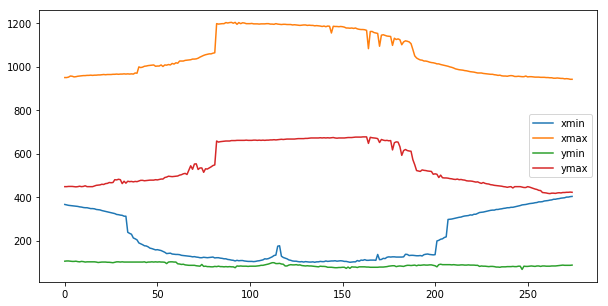

50 1254 17 727
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep5_cropbox.json" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep5_cropbox.json"
0


In [189]:
for stack in ['MD589']:
# for stack in all_nissl_stacks:
    
    bbox_all_images = []
    for fn in metadata_cache['valid_filenames'][stack]:
        mask_tb_alignedPadded = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=1, fn=fn)
        bbox = bbox_2d(mask_tb_alignedPadded)
        bbox_all_images.append(bbox)
    bbox_all_images = np.array(bbox_all_images)

#     bbox_all_images = np.array([
#         bbox_2d(DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=1, fn=fn))
#         for fn in metadata_cache['valid_filenames'][stack]
#     ])
    
    # Are the bounding boxes reasonable? If some numbers stand out, go back to check the mask.
    plt.figure(figsize=(10,5));
    plt.plot(bbox_all_images[:,0], label='xmin')
    plt.plot(bbox_all_images[:,1], label='xmax')
    plt.plot(bbox_all_images[:,2], label='ymin')
    plt.plot(bbox_all_images[:,3], label='ymax')
    plt.legend();
    plt.show();
    
    margin_um = 736.
    margin = int(np.round(margin_um / convert_resolution_string_to_um(resolution=tb_resol, stack=stack)))
    alignedWithMargin_xmin, alignedWithMargin_ymin = np.maximum(bbox_all_images[:, [0,2]].min(axis=0) - margin, 0)
    alignedWithMargin_xmax, alignedWithMargin_ymax = np.minimum(bbox_all_images[:, [1,3]].max(axis=0) + margin, 
                                                                [mask_tb_alignedPadded.shape[1]-1, mask_tb_alignedPadded.shape[0]-1])
    
    print alignedWithMargin_xmin, alignedWithMargin_xmax, alignedWithMargin_ymin, alignedWithMargin_ymax 
    
    alignedWithMargin_cropbox = {'rostral_limit': alignedWithMargin_xmin, 'caudal_limit': alignedWithMargin_xmax, 
 'dorsal_limit': alignedWithMargin_ymin, 'ventral_limit': alignedWithMargin_ymax}
    
    save_data(alignedWithMargin_cropbox, 
              DataManager.get_cropbox_filename_v2(stack=stack, anchor_fn=None, prep_id='alignedWithMargin'))

*NOTE*: If any of the four sides looks out of place, identify the section and double-check its mask.

In [190]:
def find_outlier(a, t, mode='max'):
    """
    Args:
        t(float): The peak must be different from neighbor by this much.
    """
    if mode == 'max':
        return np.r_[True, a[1:] - a[:-1] > t] & np.r_[a[:-1] - a[1:] > t, True]
    elif mode == 'min':
        return np.r_[True, a[1:] - a[:-1] < -t] & np.r_[a[:-1] - a[1:] < -t, True]
    else:
        raise

In [186]:
# Identify sections whose bboxes are outliers.

print 'xmin outlier', [metadata_cache['valid_filenames'][stack][s] for s in np.where(find_outlier(bbox_all_images[:,0], 40, 'min'))[0]]
print 'xmax outlier', [metadata_cache['valid_filenames'][stack][s] for s in np.where(find_outlier(bbox_all_images[:,1], 40, 'max'))[0]]
print 'ymin outlier', [metadata_cache['valid_filenames'][stack][s] for s in np.where(find_outlier(bbox_all_images[:,2], 40, 'min'))[0]]
print 'ymax outlier', [metadata_cache['valid_filenames'][stack][s] for s in np.where(find_outlier(bbox_all_images[:,3], 40, 'max'))[0]]

xmin outlier []
xmax outlier []
ymin outlier []
ymax outlier []


In [64]:
# for fn in metadata_cache['valid_filenames'][stack]:
#     mask_tb_alignedPadded = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=1, fn=fn)
#     plt.figure();
#     plt.imshow(mask_tb_alignedPadded[alignedWithMargin_ymin:alignedWithMargin_ymax+1, 
#                                      alignedWithMargin_xmin:alignedWithMargin_xmax+1], cmap=plt.cm.gray)
#     plt.show();

In [65]:
# Generate prep5 thumbnails from prep1 thumbnails

In [ ]:
for stack in all_nissl_stacks:

    alignedWithMargin_xmin, alignedWithMargin_xmax,\
    alignedWithMargin_ymin, alignedWithMargin_ymax = DataManager.load_cropbox_v2(stack=stack, anchor_fn=None, 
                                                            prep_id='alignedWithMargin',
                                                           return_dict=False, only_2d=True)
            
#     for section in metadata_cache['valid_sections_all'][stack]: # for CHATM2 and CHATM3
    for section in metadata_cache['valid_sections'][stack]: # for MD589 etc.
        
#         for version in ['NtbNormalized', 'mask']:
        for version in [None, 'mask']:

            in_fp = \
            DataManager.get_image_filepath_v2(stack=stack, prep_id=1, section=section, version=version, resol='thumbnail')

            out_fp = \
            DataManager.get_image_filepath_v2(stack=stack, prep_id=5, section=section, version=version, resol='thumbnail')

            create_parent_dir_if_not_exists(out_fp)

            t = time.time()

            im_prep1 = imread(in_fp)
            im_prep5 = im_prep1[alignedWithMargin_ymin:alignedWithMargin_ymax+1, 
                                alignedWithMargin_xmin:alignedWithMargin_xmax+1]        
            save_data(im_prep5, out_fp)
            
            sys.stderr.write('Generate prep5: %.2f seconds.\n' % (time.time() - t))

aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep5_thumbnail_mask.png"


Generate prep5: 1.18 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.74 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_1_0055_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_1_0055_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC19-2015.07.16-15.39.52_MD585_1_0055_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC19-2015.07.16-15.39.52_MD585_1_0055_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_3_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_3_0057_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC19-2015.07.16-15.39.52_MD585_3_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC19-2015.07.16-15.39.52_MD585_3_0057_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC20-2015.07.16-15.43.53_MD585_1_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC20-2015.07.16-15.43.53_MD585_1_0058_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC20-2015.07.16-15.43.53_MD585_1_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC20-2015.07.16-15.43.53_MD585_1_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 1.17 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_prep5_thumbnail_mask.png"


Generate prep5: 1.17 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC21-2015.07.16-15.47.52_MD585_3_0063_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC21-2015.07.16-15.47.52_MD585_3_0063_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_3_0063_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_3_0063_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC22-2015.07.16-15.51.54_MD585_3_0066_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC22-2015.07.16-15.51.54_MD585_3_0066_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC22-2015.07.16-15.51.54_MD585_3_0066_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC22-2015.07.16-15.51.54_MD585_3_0066_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC23-2015.08.19-13.18.49_MD585_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC23-2015.08.19-13.18.49_MD585_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_prep5_thumbnail.tif"

Generate prep5: 0.69 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep5_thumbnail.tif"


Generate prep5: 0.80 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0


Generate prep5: 0.74 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N25-2015.08.19-15.33.31_MD585_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N25-2015.08.19-15.33.31_MD585_2_0074_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep5_thumbnail_mask.png"


Generate prep5: 1.36 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_prep5_thumbnail.tif"


Generate prep5: 0.78 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N27-2015.08.19-15.42.30_MD585_3_0081_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N27-2015.08.19-15.42.30_MD585_3_0081_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N27-2015.08.19-15.42.30_MD585_3_0081_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N27-2015.08.19-15.42.30_MD585_3_0081_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC28-2015.08.19-13.33.04_MD585_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC28-2015.08.19-13.33.04_MD585_2_0083_prep5_thumbnail.tif"


Generate prep5: 1.19 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep5_thumbnail_mask.png"


Generate prep5: 1.33 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_prep5_thumbnail_mask.png"


Generate prep5: 1.82 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_prep5_thumbnail_mask.png"


Generate prep5: 1.17 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_prep5_thumbnail.tif"

Generate prep5: 0.67 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep5_thumbnail.tif"


Generate prep5: 0.78 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_prep5_thumbnail.tif"
0


Generate prep5: 0.99 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_prep5_thumbnail_mask.png"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_prep5_thumbnail.tif"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep5_thumbnail.tif"


Generate prep5: 0.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0


Generate prep5: 0.74 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N38-2015.07.16-22.04.12_MD585_3_0114_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N38-2015.07.16-22.04.12_MD585_3_0114_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N38-2015.07.16-22.04.12_MD585_3_0114_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N38-2015.07.16-22.04.12_MD585_3_0114_prep5_thumbnail_mask.png"


Generate prep5: 1.22 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC38-2015.07.16-17.00.35_MD585_3_0114_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC38-2015.07.16-17.00.35_MD585_3_0114_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC38-2015.07.16-17.00.35_MD585_3_0114_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC38-2015.07.16-17.00.35_MD585_3_0114_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N39-2015.07.16-22.09.19_MD585_1_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N39-2015.07.16-22.09.19_MD585_1_0115_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N39-2015.07.16-22.09.19_MD585_1_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N39-2015.07.16-22.09.19_MD585_1_0115_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N39-2015.07.16-22.09.19_MD585_2_0116_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N39-2015.07.16-22.09.19_MD585_2_0116_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N39-2015.07.16-22.09.19_MD585_2_0116_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N39-2015.07.16-22.09.19_MD585_2_0116_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC39-2015.08.19-14.10.09_MD585_2_0116_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC39-2015.08.19-14.10.09_MD585_2_0116_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC39-2015.08.19-14.10.09_MD585_2_0116_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC39-2015.08.19-14.10.09_MD585_2_0116_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_1_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_1_0118_prep5_thumbnail.tif"


Generate prep5: 0.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC40-2015.08.19-14.15.44_MD585_1_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC40-2015.08.19-14.15.44_MD585_1_0118_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep5_thumbnail.tif"

Generate prep5: 0.68 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_1_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_1_0121_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N41-2015.07.16-22.19.30_MD585_1_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N41-2015.07.16-22.19.30_MD585_1_0121_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_prep5_thumbnail.tif"

Generate prep5: 0.68 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC41-2015.08.19-14.21.09_MD585_3_0123_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC41-2015.08.19-14.21.09_MD585_3_0123_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_3_0123_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_3_0123_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_prep5_thumbnail_mask.png"


Generate prep5: 1.19 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_prep5_thumbnail.tif"


Generate prep5: 0.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_1_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_1_0127_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC43-2015.08.19-14.32.02_MD585_1_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC43-2015.08.19-14.32.02_MD585_1_0127_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_prep5_thumbnail_mask.png"


Generate prep5: 1.21 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_prep5_thumbnail_mask.png"


Generate prep5: 1.22 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_prep5_thumbnail.tif"


Generate prep5: 0.78 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_prep5_thumbnail.tif"


Generate prep5: 0.80 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_prep5_thumbnail.tif"

Generate prep5: 0.67 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_prep5_thumbnail.tif"

Generate prep5: 0.68 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_prep5_thumbnail.tif"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC48-2015.08.19-14.58.14_MD585_3_0144_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC48-2015.08.19-14.58.14_MD585_3_0144_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC48-2015.08.19-14.58.14_MD585_3_0144_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC48-2015.08.19-14.58.14_MD585_3_0144_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_prep5_thumbnail.tif"

Generate prep5: 0.70 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.57 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N49-2015.07.16-23.01.02_MD585_3_0147_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N49-2015.07.16-23.01.02_MD585_3_0147_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_3_0147_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_3_0147_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_2_0149_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_2_0149_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N50-2015.07.16-23.05.49_MD585_2_0149_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N50-2015.07.16-23.05.49_MD585_2_0149_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC51-2015.08.19-15.03.10_MD585_3_0153_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC51-2015.08.19-15.03.10_MD585_3_0153_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_3_0153_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_3_0153_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 1.23 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_2_0158_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N53-2015.08.19-16.16.47_MD585_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N53-2015.08.19-16.16.47_MD585_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep5_thumbnail.tif"

Generate prep5: 0.74 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_prep5_thumbnail.tif"


Generate prep5: 1.18 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep5_thumbnail.tif"

Generate prep5: 0.61 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.63 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_prep5_thumbnail.tif"

Generate prep5: 0.70 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 1.60 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_prep5_thumbnail.tif"

Generate prep5: 0.69 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_prep5_thumbnail.tif"


Generate prep5: 0.83 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep5_thumbnail.tif"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N61-2015.07.16-23.52.50_MD585_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N61-2015.07.16-23.52.50_MD585_2_0182_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N61-2015.07.16-23.52.50_MD585_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N61-2015.07.16-23.52.50_MD585_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC61-2015.07.16-18.50.40_MD585_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC61-2015.07.16-18.50.40_MD585_2_0182_prep5_thumbnail.tif"

Generate prep5: 0.72 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC61-2015.07.16-18.50.40_MD585_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC61-2015.07.16-18.50.40_MD585_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep5_thumbnail_mask.png"


Generate prep5: 1.23 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC16-2015.07.30-22.20.07_MD589_3_0048_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep5_thumbnail.tif"


Generate prep5: 1.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep5_thumbnail.tif"


Generate prep5: 1.38 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep5_thumbnail.tif"


Generate prep5: 0.83 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep5_thumbnail.tif"

Generate prep5: 0.66 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_prep5_thumbnail_mask.png"


Generate prep5: 1.41 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep5_thumbnail.tif"


Generate prep5: 0.76 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_prep5_thumbnail_mask.png"


Generate prep5: 1.29 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 1.28 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep5_thumbnail.tif"


Generate prep5: 1.26 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_prep5_thumbnail_mask.png"


Generate prep5: 1.21 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep5_thumbnail.tif"


Generate prep5: 1.31 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_prep5_thumbnail.tif"

Generate prep5: 0.61 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_prep5_thumbnail.tif"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_prep5_thumbnail_mask.png"


Generate prep5: 2.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_prep5_thumbnail_mask.png"


Generate prep5: 1.36 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_prep5_thumbnail_mask.png"


Generate prep5: 1.19 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_prep5_thumbnail.tif"


Generate prep5: 0.80 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_prep5_thumbnail.tif"

Generate prep5: 0.61 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.61 seconds.


aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_prep5_thumbnail.tif"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_prep5_thumbnail_mask.png"


Generate prep5: 1.29 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_prep5_thumbnail.tif"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_prep5_thumbnail_mask.png"


Generate prep5: 1.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_prep5_thumbnail.tif"

Generate prep5: 0.63 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_prep5_thumbnail.tif"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 1.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_prep5_thumbnail.tif"


Generate prep5: 0.82 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_prep5_thumbnail.tif"

Generate prep5: 0.62 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_prep5_thumbnail.tif"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_prep5_thumbnail.tif"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_prep5_thumbnail.tif"


Generate prep5: 1.28 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_prep5_thumbnail_mask.png"


Generate prep5: 1.59 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_prep5_thumbnail_mask.png"


Generate prep5: 1.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_prep5_thumbnail_mask.png"


Generate prep5: 1.30 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_prep5_thumbnail_mask/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N17-2015.08.03-18.05.39_MD590_1_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N17-2015.08.03-18.05.39_MD590_1_0051_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N17-2015.08.03-18.05.39_MD590_1_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N17-2015.08.03-18.05.39_MD590_1_0051_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_1_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_1_0051_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC17-2015.08.10-19.09.09_MD590_1_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC17-2015.08.10-19.09.09_MD590_1_0051_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.77 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N18-2015.08.03-18.09.43_MD590_3_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N18-2015.08.03-18.09.43_MD590_3_0052_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N18-2015.08.03-18.09.43_MD590_3_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N18-2015.08.03-18.09.43_MD590_3_0052_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC18-2015.08.10-19.13.20_MD590_3_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC18-2015.08.10-19.13.20_MD590_3_0052_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC18-2015.08.10-19.13.20_MD590_3_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC18-2015.08.10-19.13.20_MD590_3_0052_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N18-2015.08.03-18.09.43_MD590_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N18-2015.08.03-18.09.43_MD590_2_0053_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N18-2015.08.03-18.09.43_MD590_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N18-2015.08.03-18.09.43_MD590_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC18-2015.08.10-19.13.20_MD590_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC18-2015.08.10-19.13.20_MD590_2_0053_prep5_thumbnail.tif"

Generate prep5: 0.85 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC18-2015.08.10-19.13.20_MD590_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC18-2015.08.10-19.13.20_MD590_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N18-2015.08.03-18.09.43_MD590_1_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N18-2015.08.03-18.09.43_MD590_1_0054_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N18-2015.08.03-18.09.43_MD590_1_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N18-2015.08.03-18.09.43_MD590_1_0054_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC18-2015.08.10-19.13.20_MD590_1_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC18-2015.08.10-19.13.20_MD590_1_0054_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC18-2015.08.10-19.13.20_MD590_1_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC18-2015.08.10-19.13.20_MD590_1_0054_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N19-2015.08.03-18.13.45_MD590_3_0055_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N19-2015.08.03-18.13.45_MD590_3_0055_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N19-2015.08.03-18.13.45_MD590_3_0055_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N19-2015.08.03-18.13.45_MD590_3_0055_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.91 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N19-2015.08.03-18.13.45_MD590_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N19-2015.08.03-18.13.45_MD590_2_0056_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N19-2015.08.03-18.13.45_MD590_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N19-2015.08.03-18.13.45_MD590_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC19-2015.08.10-19.17.32_MD590_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC19-2015.08.10-19.17.32_MD590_2_0056_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC19-2015.08.10-19.17.32_MD590_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC19-2015.08.10-19.17.32_MD590_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N19-2015.08.03-18.13.45_MD590_1_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N19-2015.08.03-18.13.45_MD590_1_0057_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N19-2015.08.03-18.13.45_MD590_1_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N19-2015.08.03-18.13.45_MD590_1_0057_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC19-2015.08.10-19.17.32_MD590_1_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC19-2015.08.10-19.17.32_MD590_1_0057_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC19-2015.08.10-19.17.32_MD590_1_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC19-2015.08.10-19.17.32_MD590_1_0057_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N20-2015.08.03-18.17.51_MD590_3_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N20-2015.08.03-18.17.51_MD590_3_0058_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N20-2015.08.03-18.17.51_MD590_3_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N20-2015.08.03-18.17.51_MD590_3_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC20-2015.08.10-19.21.44_MD590_3_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC20-2015.08.10-19.21.44_MD590_3_0058_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC20-2015.08.10-19.21.44_MD590_3_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC20-2015.08.10-19.21.44_MD590_3_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N20-2015.08.03-18.17.51_MD590_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N20-2015.08.03-18.17.51_MD590_2_0059_prep5_thumbnail.tif"

Generate prep5: 0.66 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N20-2015.08.03-18.17.51_MD590_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N20-2015.08.03-18.17.51_MD590_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC20-2015.08.10-19.21.44_MD590_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC20-2015.08.10-19.21.44_MD590_2_0059_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC20-2015.08.10-19.21.44_MD590_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC20-2015.08.10-19.21.44_MD590_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N20-2015.08.03-18.17.51_MD590_1_0060_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N20-2015.08.03-18.17.51_MD590_1_0060_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N20-2015.08.03-18.17.51_MD590_1_0060_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N20-2015.08.03-18.17.51_MD590_1_0060_prep5_thumbnail_mask.png"


Generate prep5: 1.20 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC20-2015.08.10-19.21.44_MD590_1_0060_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC20-2015.08.10-19.21.44_MD590_1_0060_prep5_thumbnail.tif"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC20-2015.08.10-19.21.44_MD590_1_0060_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC20-2015.08.10-19.21.44_MD590_1_0060_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N21-2015.08.03-18.21.58_MD590_3_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N21-2015.08.03-18.21.58_MD590_3_0061_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N21-2015.08.03-18.21.58_MD590_3_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N21-2015.08.03-18.21.58_MD590_3_0061_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC21-2015.08.10-19.25.54_MD590_3_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC21-2015.08.10-19.25.54_MD590_3_0061_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC21-2015.08.10-19.25.54_MD590_3_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC21-2015.08.10-19.25.54_MD590_3_0061_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.64 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N21-2015.08.03-18.21.58_MD590_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N21-2015.08.03-18.21.58_MD590_2_0062_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N21-2015.08.03-18.21.58_MD590_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N21-2015.08.03-18.21.58_MD590_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC21-2015.08.10-19.25.54_MD590_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC21-2015.08.10-19.25.54_MD590_2_0062_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC21-2015.08.10-19.25.54_MD590_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC21-2015.08.10-19.25.54_MD590_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N21-2015.08.03-18.21.58_MD590_1_0063_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N21-2015.08.03-18.21.58_MD590_1_0063_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N21-2015.08.03-18.21.58_MD590_1_0063_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N21-2015.08.03-18.21.58_MD590_1_0063_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC21-2015.08.10-19.25.54_MD590_1_0063_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC21-2015.08.10-19.25.54_MD590_1_0063_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC21-2015.08.10-19.25.54_MD590_1_0063_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC21-2015.08.10-19.25.54_MD590_1_0063_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N22-2015.08.03-18.25.59_MD590_3_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N22-2015.08.03-18.25.59_MD590_3_0064_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N22-2015.08.03-18.25.59_MD590_3_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N22-2015.08.03-18.25.59_MD590_3_0064_prep5_thumbnail_mask.png"


Generate prep5: 1.78 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC22-2015.08.10-19.30.03_MD590_3_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC22-2015.08.10-19.30.03_MD590_3_0064_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC22-2015.08.10-19.30.03_MD590_3_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC22-2015.08.10-19.30.03_MD590_3_0064_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.62 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N22-2015.08.03-18.25.59_MD590_2_0065_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N22-2015.08.03-18.25.59_MD590_2_0065_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N22-2015.08.03-18.25.59_MD590_2_0065_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N22-2015.08.03-18.25.59_MD590_2_0065_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC22-2015.08.10-19.30.03_MD590_2_0065_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC22-2015.08.10-19.30.03_MD590_2_0065_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC22-2015.08.10-19.30.03_MD590_2_0065_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC22-2015.08.10-19.30.03_MD590_2_0065_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N22-2015.08.03-18.25.59_MD590_1_0066_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N22-2015.08.03-18.25.59_MD590_1_0066_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N22-2015.08.03-18.25.59_MD590_1_0066_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N22-2015.08.03-18.25.59_MD590_1_0066_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC22-2015.08.10-19.30.03_MD590_1_0066_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC22-2015.08.10-19.30.03_MD590_1_0066_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC22-2015.08.10-19.30.03_MD590_1_0066_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC22-2015.08.10-19.30.03_MD590_1_0066_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.74 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N23-2015.08.03-18.29.58_MD590_3_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N23-2015.08.03-18.29.58_MD590_3_0067_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N23-2015.08.03-18.29.58_MD590_3_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N23-2015.08.03-18.29.58_MD590_3_0067_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC23-2015.08.10-19.34.12_MD590_3_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC23-2015.08.10-19.34.12_MD590_3_0067_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC23-2015.08.10-19.34.12_MD590_3_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC23-2015.08.10-19.34.12_MD590_3_0067_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N23-2015.08.03-18.29.58_MD590_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N23-2015.08.03-18.29.58_MD590_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N23-2015.08.03-18.29.58_MD590_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N23-2015.08.03-18.29.58_MD590_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC23-2015.08.10-19.34.12_MD590_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC23-2015.08.10-19.34.12_MD590_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC23-2015.08.10-19.34.12_MD590_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC23-2015.08.10-19.34.12_MD590_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N23-2015.08.03-18.29.58_MD590_1_0069_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N23-2015.08.03-18.29.58_MD590_1_0069_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N23-2015.08.03-18.29.58_MD590_1_0069_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N23-2015.08.03-18.29.58_MD590_1_0069_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC23-2015.08.10-19.34.12_MD590_1_0069_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC23-2015.08.10-19.34.12_MD590_1_0069_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC23-2015.08.10-19.34.12_MD590_1_0069_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC23-2015.08.10-19.34.12_MD590_1_0069_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N24-2015.08.03-18.34.11_MD590_3_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N24-2015.08.03-18.34.11_MD590_3_0070_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N24-2015.08.03-18.34.11_MD590_3_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N24-2015.08.03-18.34.11_MD590_3_0070_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N24-2015.08.03-18.34.11_MD590_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N24-2015.08.03-18.34.11_MD590_2_0071_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N24-2015.08.03-18.34.11_MD590_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N24-2015.08.03-18.34.11_MD590_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC24-2015.08.10-19.38.23_MD590_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC24-2015.08.10-19.38.23_MD590_2_0071_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC24-2015.08.10-19.38.23_MD590_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC24-2015.08.10-19.38.23_MD590_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N24-2015.08.03-18.34.11_MD590_1_0072_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N24-2015.08.03-18.34.11_MD590_1_0072_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N24-2015.08.03-18.34.11_MD590_1_0072_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N24-2015.08.03-18.34.11_MD590_1_0072_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0


Generate prep5: 0.74 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC24-2015.08.10-19.38.23_MD590_1_0072_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC24-2015.08.10-19.38.23_MD590_1_0072_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC24-2015.08.10-19.38.23_MD590_1_0072_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC24-2015.08.10-19.38.23_MD590_1_0072_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N25-2015.09.12-05.15.53_MD590_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N25-2015.09.12-05.15.53_MD590_1_0073_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N25-2015.09.12-05.15.53_MD590_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N25-2015.09.12-05.15.53_MD590_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 1.23 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC25-2015.08.10-19.42.49_MD590_3_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC25-2015.08.10-19.42.49_MD590_3_0073_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC25-2015.08.10-19.42.49_MD590_3_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC25-2015.08.10-19.42.49_MD590_3_0073_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N25-2015.09.12-05.15.53_MD590_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N25-2015.09.12-05.15.53_MD590_2_0074_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N25-2015.09.12-05.15.53_MD590_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N25-2015.09.12-05.15.53_MD590_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC25-2015.08.10-19.42.49_MD590_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC25-2015.08.10-19.42.49_MD590_2_0074_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC25-2015.08.10-19.42.49_MD590_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC25-2015.08.10-19.42.49_MD590_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N25-2015.09.12-05.15.53_MD590_3_0075_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N25-2015.09.12-05.15.53_MD590_3_0075_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N25-2015.09.12-05.15.53_MD590_3_0075_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N25-2015.09.12-05.15.53_MD590_3_0075_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC25-2015.08.10-19.42.49_MD590_1_0075_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC25-2015.08.10-19.42.49_MD590_1_0075_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC25-2015.08.10-19.42.49_MD590_1_0075_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC25-2015.08.10-19.42.49_MD590_1_0075_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N26-2015.08.03-18.42.38_MD590_3_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N26-2015.08.03-18.42.38_MD590_3_0076_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N26-2015.08.03-18.42.38_MD590_3_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N26-2015.08.03-18.42.38_MD590_3_0076_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC26-2015.08.10-19.47.18_MD590_3_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC26-2015.08.10-19.47.18_MD590_3_0076_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC26-2015.08.10-19.47.18_MD590_3_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC26-2015.08.10-19.47.18_MD590_3_0076_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N26-2015.08.03-18.42.38_MD590_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N26-2015.08.03-18.42.38_MD590_2_0077_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N26-2015.08.03-18.42.38_MD590_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N26-2015.08.03-18.42.38_MD590_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC26-2015.08.10-19.47.18_MD590_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC26-2015.08.10-19.47.18_MD590_2_0077_prep5_thumbnail.tif"

Generate prep5: 0.78 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC26-2015.08.10-19.47.18_MD590_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC26-2015.08.10-19.47.18_MD590_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N26-2015.08.03-18.42.38_MD590_1_0078_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N26-2015.08.03-18.42.38_MD590_1_0078_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N26-2015.08.03-18.42.38_MD590_1_0078_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N26-2015.08.03-18.42.38_MD590_1_0078_prep5_thumbnail_mask.png"


Generate prep5: 1.20 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC26-2015.08.10-19.47.18_MD590_1_0078_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC26-2015.08.10-19.47.18_MD590_1_0078_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC26-2015.08.10-19.47.18_MD590_1_0078_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC26-2015.08.10-19.47.18_MD590_1_0078_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N27-2015.08.03-18.47.02_MD590_3_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N27-2015.08.03-18.47.02_MD590_3_0079_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N27-2015.08.03-18.47.02_MD590_3_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N27-2015.08.03-18.47.02_MD590_3_0079_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N27-2015.08.03-18.47.02_MD590_2_0080_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N27-2015.08.03-18.47.02_MD590_2_0080_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N27-2015.08.03-18.47.02_MD590_2_0080_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N27-2015.08.03-18.47.02_MD590_2_0080_prep5_thumbnail_mask.png"


Generate prep5: 1.21 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N27-2015.08.03-18.47.02_MD590_1_0081_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N27-2015.08.03-18.47.02_MD590_1_0081_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N27-2015.08.03-18.47.02_MD590_1_0081_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N27-2015.08.03-18.47.02_MD590_1_0081_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.74 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N28-2015.09.12-05.21.18_MD590_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N28-2015.09.12-05.21.18_MD590_1_0082_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N28-2015.09.12-05.21.18_MD590_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N28-2015.09.12-05.21.18_MD590_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC28-2015.08.10-19.51.53_MD590_3_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC28-2015.08.10-19.51.53_MD590_3_0082_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC28-2015.08.10-19.51.53_MD590_3_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC28-2015.08.10-19.51.53_MD590_3_0082_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N28-2015.09.12-05.21.18_MD590_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N28-2015.09.12-05.21.18_MD590_2_0083_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N28-2015.09.12-05.21.18_MD590_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N28-2015.09.12-05.21.18_MD590_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 1.18 seconds.


0


Generate prep5: 0.89 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC28-2015.08.10-19.51.53_MD590_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC28-2015.08.10-19.51.53_MD590_2_0083_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC28-2015.08.10-19.51.53_MD590_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC28-2015.08.10-19.51.53_MD590_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N28-2015.09.12-05.21.18_MD590_3_0084_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N28-2015.09.12-05.21.18_MD590_3_0084_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N28-2015.09.12-05.21.18_MD590_3_0084_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N28-2015.09.12-05.21.18_MD590_3_0084_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC28-2015.08.10-19.51.53_MD590_1_0084_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC28-2015.08.10-19.51.53_MD590_1_0084_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC28-2015.08.10-19.51.53_MD590_1_0084_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC28-2015.08.10-19.51.53_MD590_1_0084_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N29-2015.08.03-18.55.57_MD590_3_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N29-2015.08.03-18.55.57_MD590_3_0085_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N29-2015.08.03-18.55.57_MD590_3_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N29-2015.08.03-18.55.57_MD590_3_0085_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC29-2015.08.10-19.56.34_MD590_3_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC29-2015.08.10-19.56.34_MD590_3_0085_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC29-2015.08.10-19.56.34_MD590_3_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC29-2015.08.10-19.56.34_MD590_3_0085_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N29-2015.08.03-18.55.57_MD590_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N29-2015.08.03-18.55.57_MD590_2_0086_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N29-2015.08.03-18.55.57_MD590_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N29-2015.08.03-18.55.57_MD590_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC29-2015.08.10-19.56.34_MD590_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC29-2015.08.10-19.56.34_MD590_2_0086_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC29-2015.08.10-19.56.34_MD590_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC29-2015.08.10-19.56.34_MD590_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 1.82 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N29-2015.08.03-18.55.57_MD590_1_0087_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N29-2015.08.03-18.55.57_MD590_1_0087_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N29-2015.08.03-18.55.57_MD590_1_0087_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N29-2015.08.03-18.55.57_MD590_1_0087_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N30-2015.08.03-19.00.39_MD590_3_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N30-2015.08.03-19.00.39_MD590_3_0088_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N30-2015.08.03-19.00.39_MD590_3_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N30-2015.08.03-19.00.39_MD590_3_0088_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC30-2015.08.10-20.01.31_MD590_3_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC30-2015.08.10-20.01.31_MD590_3_0088_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC30-2015.08.10-20.01.31_MD590_3_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC30-2015.08.10-20.01.31_MD590_3_0088_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N30-2015.08.03-19.00.39_MD590_2_0089_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N30-2015.08.03-19.00.39_MD590_2_0089_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N30-2015.08.03-19.00.39_MD590_2_0089_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N30-2015.08.03-19.00.39_MD590_2_0089_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N30-2015.08.03-19.00.39_MD590_1_0090_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N30-2015.08.03-19.00.39_MD590_1_0090_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N30-2015.08.03-19.00.39_MD590_1_0090_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N30-2015.08.03-19.00.39_MD590_1_0090_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC30-2015.08.10-20.01.31_MD590_1_0090_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC30-2015.08.10-20.01.31_MD590_1_0090_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC30-2015.08.10-20.01.31_MD590_1_0090_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC30-2015.08.10-20.01.31_MD590_1_0090_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N31-2015.08.03-19.05.52_MD590_3_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N31-2015.08.03-19.05.52_MD590_3_0091_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N31-2015.08.03-19.05.52_MD590_3_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N31-2015.08.03-19.05.52_MD590_3_0091_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC31-2015.08.10-20.06.46_MD590_3_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC31-2015.08.10-20.06.46_MD590_3_0091_prep5_thumbnail.tif"

Generate prep5: 0.66 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC31-2015.08.10-20.06.46_MD590_3_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC31-2015.08.10-20.06.46_MD590_3_0091_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.98 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N31-2015.08.03-19.05.52_MD590_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N31-2015.08.03-19.05.52_MD590_2_0092_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N31-2015.08.03-19.05.52_MD590_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N31-2015.08.03-19.05.52_MD590_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC31-2015.08.10-20.06.46_MD590_1_0093_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC31-2015.08.10-20.06.46_MD590_1_0093_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC31-2015.08.10-20.06.46_MD590_1_0093_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC31-2015.08.10-20.06.46_MD590_1_0093_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N32-2015.08.03-19.09.53_MD590_3_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N32-2015.08.03-19.09.53_MD590_3_0094_prep5_thumbnail.tif"

Generate prep5: 0.74 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N32-2015.08.03-19.09.53_MD590_3_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N32-2015.08.03-19.09.53_MD590_3_0094_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC32-2015.08.10-20.11.29_MD590_3_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC32-2015.08.10-20.11.29_MD590_3_0094_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC32-2015.08.10-20.11.29_MD590_3_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC32-2015.08.10-20.11.29_MD590_3_0094_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N32-2015.08.03-19.09.53_MD590_1_0096_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N32-2015.08.03-19.09.53_MD590_1_0096_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N32-2015.08.03-19.09.53_MD590_1_0096_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N32-2015.08.03-19.09.53_MD590_1_0096_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC32-2015.08.10-20.11.29_MD590_1_0096_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC32-2015.08.10-20.11.29_MD590_1_0096_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC32-2015.08.10-20.11.29_MD590_1_0096_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC32-2015.08.10-20.11.29_MD590_1_0096_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N33-2015.08.03-19.13.48_MD590_3_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N33-2015.08.03-19.13.48_MD590_3_0097_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N33-2015.08.03-19.13.48_MD590_3_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N33-2015.08.03-19.13.48_MD590_3_0097_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC33-2015.08.10-20.15.47_MD590_2_0098_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC33-2015.08.10-20.15.47_MD590_2_0098_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC33-2015.08.10-20.15.47_MD590_2_0098_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC33-2015.08.10-20.15.47_MD590_2_0098_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N33-2015.08.03-19.13.48_MD590_1_0099_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N33-2015.08.03-19.13.48_MD590_1_0099_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N33-2015.08.03-19.13.48_MD590_1_0099_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N33-2015.08.03-19.13.48_MD590_1_0099_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC33-2015.08.10-20.15.47_MD590_1_0099_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC33-2015.08.10-20.15.47_MD590_1_0099_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC33-2015.08.10-20.15.47_MD590_1_0099_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC33-2015.08.10-20.15.47_MD590_1_0099_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N34-2015.08.03-19.17.57_MD590_3_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N34-2015.08.03-19.17.57_MD590_3_0100_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N34-2015.08.03-19.17.57_MD590_3_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N34-2015.08.03-19.17.57_MD590_3_0100_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC34-2015.08.10-20.20.03_MD590_3_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC34-2015.08.10-20.20.03_MD590_3_0100_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC34-2015.08.10-20.20.03_MD590_3_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC34-2015.08.10-20.20.03_MD590_3_0100_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N34-2015.08.03-19.17.57_MD590_1_0102_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N34-2015.08.03-19.17.57_MD590_1_0102_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N34-2015.08.03-19.17.57_MD590_1_0102_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N34-2015.08.03-19.17.57_MD590_1_0102_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC34-2015.08.10-20.20.03_MD590_1_0102_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC34-2015.08.10-20.20.03_MD590_1_0102_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC34-2015.08.10-20.20.03_MD590_1_0102_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC34-2015.08.10-20.20.03_MD590_1_0102_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N35-2015.08.03-19.21.58_MD590_3_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N35-2015.08.03-19.21.58_MD590_3_0103_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N35-2015.08.03-19.21.58_MD590_3_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N35-2015.08.03-19.21.58_MD590_3_0103_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC35-2015.08.10-20.24.17_MD590_3_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC35-2015.08.10-20.24.17_MD590_3_0103_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC35-2015.08.10-20.24.17_MD590_3_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC35-2015.08.10-20.24.17_MD590_3_0103_prep5_thumbnail_mask.png"


Generate prep5: 1.26 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N35-2015.08.03-19.21.58_MD590_1_0105_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N35-2015.08.03-19.21.58_MD590_1_0105_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N35-2015.08.03-19.21.58_MD590_1_0105_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N35-2015.08.03-19.21.58_MD590_1_0105_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC35-2015.08.10-20.24.17_MD590_1_0105_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC35-2015.08.10-20.24.17_MD590_1_0105_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC35-2015.08.10-20.24.17_MD590_1_0105_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC35-2015.08.10-20.24.17_MD590_1_0105_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N36-2015.08.03-19.25.52_MD590_3_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N36-2015.08.03-19.25.52_MD590_3_0106_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N36-2015.08.03-19.25.52_MD590_3_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N36-2015.08.03-19.25.52_MD590_3_0106_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC36-2015.08.10-20.28.27_MD590_3_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC36-2015.08.10-20.28.27_MD590_3_0106_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC36-2015.08.10-20.28.27_MD590_3_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC36-2015.08.10-20.28.27_MD590_3_0106_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N36-2015.08.03-19.25.52_MD590_1_0108_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N36-2015.08.03-19.25.52_MD590_1_0108_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N36-2015.08.03-19.25.52_MD590_1_0108_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N36-2015.08.03-19.25.52_MD590_1_0108_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC36-2015.08.10-20.28.27_MD590_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC36-2015.08.10-20.28.27_MD590_2_0107_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC36-2015.08.10-20.28.27_MD590_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC36-2015.08.10-20.28.27_MD590_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.78 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N37-2015.08.03-19.29.50_MD590_3_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N37-2015.08.03-19.29.50_MD590_3_0109_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N37-2015.08.03-19.29.50_MD590_3_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N37-2015.08.03-19.29.50_MD590_3_0109_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC37-2015.08.10-20.32.56_MD590_3_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC37-2015.08.10-20.32.56_MD590_3_0109_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC37-2015.08.10-20.32.56_MD590_3_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC37-2015.08.10-20.32.56_MD590_3_0109_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N37-2015.08.03-19.29.50_MD590_1_0111_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N37-2015.08.03-19.29.50_MD590_1_0111_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N37-2015.08.03-19.29.50_MD590_1_0111_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N37-2015.08.03-19.29.50_MD590_1_0111_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC37-2015.08.10-20.32.56_MD590_2_0110_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC37-2015.08.10-20.32.56_MD590_2_0110_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC37-2015.08.10-20.32.56_MD590_2_0110_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC37-2015.08.10-20.32.56_MD590_2_0110_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N38-2015.08.03-19.33.46_MD590_3_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N38-2015.08.03-19.33.46_MD590_3_0112_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N38-2015.08.03-19.33.46_MD590_3_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N38-2015.08.03-19.33.46_MD590_3_0112_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC38-2015.08.10-20.37.21_MD590_3_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC38-2015.08.10-20.37.21_MD590_3_0112_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC38-2015.08.10-20.37.21_MD590_3_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC38-2015.08.10-20.37.21_MD590_3_0112_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N38-2015.08.03-19.33.46_MD590_1_0114_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N38-2015.08.03-19.33.46_MD590_1_0114_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N38-2015.08.03-19.33.46_MD590_1_0114_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N38-2015.08.03-19.33.46_MD590_1_0114_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 1.06 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC38-2015.08.10-20.37.21_MD590_1_0114_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC38-2015.08.10-20.37.21_MD590_1_0114_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC38-2015.08.10-20.37.21_MD590_1_0114_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC38-2015.08.10-20.37.21_MD590_1_0114_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N39-2015.08.03-19.37.45_MD590_3_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N39-2015.08.03-19.37.45_MD590_3_0115_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N39-2015.08.03-19.37.45_MD590_3_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N39-2015.08.03-19.37.45_MD590_3_0115_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.62 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC39-2015.08.10-20.41.34_MD590_3_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC39-2015.08.10-20.41.34_MD590_3_0115_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC39-2015.08.10-20.41.34_MD590_3_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC39-2015.08.10-20.41.34_MD590_3_0115_prep5_thumbnail_mask.png"


Generate prep5: 1.18 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N39-2015.08.03-19.37.45_MD590_1_0117_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N39-2015.08.03-19.37.45_MD590_1_0117_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N39-2015.08.03-19.37.45_MD590_1_0117_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N39-2015.08.03-19.37.45_MD590_1_0117_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC39-2015.08.10-20.41.34_MD590_2_0116_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC39-2015.08.10-20.41.34_MD590_2_0116_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC39-2015.08.10-20.41.34_MD590_2_0116_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC39-2015.08.10-20.41.34_MD590_2_0116_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N40-2015.09.12-05.27.06_MD590_1_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N40-2015.09.12-05.27.06_MD590_1_0118_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N40-2015.09.12-05.27.06_MD590_1_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N40-2015.09.12-05.27.06_MD590_1_0118_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC40-2015.08.10-20.45.53_MD590_3_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC40-2015.08.10-20.45.53_MD590_3_0118_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC40-2015.08.10-20.45.53_MD590_3_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC40-2015.08.10-20.45.53_MD590_3_0118_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N40-2015.09.12-05.27.06_MD590_2_0119_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N40-2015.09.12-05.27.06_MD590_2_0119_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N40-2015.09.12-05.27.06_MD590_2_0119_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N40-2015.09.12-05.27.06_MD590_2_0119_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC40-2015.08.10-20.45.53_MD590_1_0120_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC40-2015.08.10-20.45.53_MD590_1_0120_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC40-2015.08.10-20.45.53_MD590_1_0120_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC40-2015.08.10-20.45.53_MD590_1_0120_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N41-2015.08.03-19.45.39_MD590_3_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N41-2015.08.03-19.45.39_MD590_3_0121_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N41-2015.08.03-19.45.39_MD590_3_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N41-2015.08.03-19.45.39_MD590_3_0121_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC41-2015.08.10-20.50.09_MD590_3_0121_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N41-2015.08.03-19.45.39_MD590_1_0123_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N41-2015.08.03-19.45.39_MD590_1_0123_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N41-2015.08.03-19.45.39_MD590_1_0123_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N41-2015.08.03-19.45.39_MD590_1_0123_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC41-2015.08.10-20.50.09_MD590_1_0123_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC41-2015.08.10-20.50.09_MD590_1_0123_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC41-2015.08.10-20.50.09_MD590_1_0123_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC41-2015.08.10-20.50.09_MD590_1_0123_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N42-2015.08.03-19.49.38_MD590_3_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N42-2015.08.03-19.49.38_MD590_3_0124_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N42-2015.08.03-19.49.38_MD590_3_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N42-2015.08.03-19.49.38_MD590_3_0124_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC42-2015.08.10-20.54.21_MD590_3_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC42-2015.08.10-20.54.21_MD590_3_0124_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC42-2015.08.10-20.54.21_MD590_3_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC42-2015.08.10-20.54.21_MD590_3_0124_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N42-2015.08.03-19.49.38_MD590_1_0126_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N42-2015.08.03-19.49.38_MD590_1_0126_prep5_thumbnail.tif"

Generate prep5: 0.82 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N42-2015.08.03-19.49.38_MD590_1_0126_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N42-2015.08.03-19.49.38_MD590_1_0126_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.64 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC42-2015.08.10-20.54.21_MD590_2_0125_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC42-2015.08.10-20.54.21_MD590_2_0125_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC42-2015.08.10-20.54.21_MD590_2_0125_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC42-2015.08.10-20.54.21_MD590_2_0125_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N43-2015.08.03-19.53.30_MD590_3_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N43-2015.08.03-19.53.30_MD590_3_0127_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N43-2015.08.03-19.53.30_MD590_3_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N43-2015.08.03-19.53.30_MD590_3_0127_prep5_thumbnail_mask.png"


Generate prep5: 1.37 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC43-2015.08.10-20.58.28_MD590_3_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC43-2015.08.10-20.58.28_MD590_3_0127_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC43-2015.08.10-20.58.28_MD590_3_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC43-2015.08.10-20.58.28_MD590_3_0127_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.80 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N43-2015.08.03-19.53.30_MD590_1_0129_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N43-2015.08.03-19.53.30_MD590_1_0129_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N43-2015.08.03-19.53.30_MD590_1_0129_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N43-2015.08.03-19.53.30_MD590_1_0129_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC43-2015.08.10-20.58.28_MD590_2_0128_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC43-2015.08.10-20.58.28_MD590_2_0128_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC43-2015.08.10-20.58.28_MD590_2_0128_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC43-2015.08.10-20.58.28_MD590_2_0128_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N44-2015.08.03-19.57.30_MD590_3_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N44-2015.08.03-19.57.30_MD590_3_0130_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N44-2015.08.03-19.57.30_MD590_3_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N44-2015.08.03-19.57.30_MD590_3_0130_prep5_thumbnail_mask.png"


Generate prep5: 1.19 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC44-2015.08.10-21.02.32_MD590_3_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC44-2015.08.10-21.02.32_MD590_3_0130_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC44-2015.08.10-21.02.32_MD590_3_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC44-2015.08.10-21.02.32_MD590_3_0130_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N44-2015.08.03-19.57.30_MD590_1_0132_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N44-2015.08.03-19.57.30_MD590_1_0132_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N44-2015.08.03-19.57.30_MD590_1_0132_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N44-2015.08.03-19.57.30_MD590_1_0132_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC44-2015.08.10-21.02.32_MD590_1_0132_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC44-2015.08.10-21.02.32_MD590_1_0132_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC44-2015.08.10-21.02.32_MD590_1_0132_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC44-2015.08.10-21.02.32_MD590_1_0132_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N45-2015.08.03-20.01.29_MD590_3_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N45-2015.08.03-20.01.29_MD590_3_0133_prep5_thumbnail.tif"

Generate prep5: 0.77 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N45-2015.08.03-20.01.29_MD590_3_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N45-2015.08.03-20.01.29_MD590_3_0133_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC45-2015.08.10-21.06.43_MD590_3_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC45-2015.08.10-21.06.43_MD590_3_0133_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC45-2015.08.10-21.06.43_MD590_3_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC45-2015.08.10-21.06.43_MD590_3_0133_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.61 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N45-2015.08.03-20.01.29_MD590_1_0135_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N45-2015.08.03-20.01.29_MD590_1_0135_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N45-2015.08.03-20.01.29_MD590_1_0135_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N45-2015.08.03-20.01.29_MD590_1_0135_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC45-2015.08.10-21.06.43_MD590_1_0135_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC45-2015.08.10-21.06.43_MD590_1_0135_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC45-2015.08.10-21.06.43_MD590_1_0135_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC45-2015.08.10-21.06.43_MD590_1_0135_prep5_thumbnail_mask.png"


Generate prep5: 1.23 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N46-2015.08.03-20.05.19_MD590_3_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N46-2015.08.03-20.05.19_MD590_3_0136_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N46-2015.08.03-20.05.19_MD590_3_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N46-2015.08.03-20.05.19_MD590_3_0136_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.76 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC46-2015.08.10-21.10.44_MD590_3_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC46-2015.08.10-21.10.44_MD590_3_0136_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC46-2015.08.10-21.10.44_MD590_3_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC46-2015.08.10-21.10.44_MD590_3_0136_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.64 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N46-2015.08.03-20.05.19_MD590_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N46-2015.08.03-20.05.19_MD590_2_0137_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N46-2015.08.03-20.05.19_MD590_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N46-2015.08.03-20.05.19_MD590_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC46-2015.08.10-21.10.44_MD590_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC46-2015.08.10-21.10.44_MD590_2_0137_prep5_thumbnail.tif"


Generate prep5: 0.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC46-2015.08.10-21.10.44_MD590_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC46-2015.08.10-21.10.44_MD590_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N47-2015.09.12-05.32.06_MD590_1_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N47-2015.09.12-05.32.06_MD590_1_0139_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N47-2015.09.12-05.32.06_MD590_1_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N47-2015.09.12-05.32.06_MD590_1_0139_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC47-2015.08.10-21.15.09_MD590_3_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC47-2015.08.10-21.15.09_MD590_3_0139_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC47-2015.08.10-21.15.09_MD590_3_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC47-2015.08.10-21.15.09_MD590_3_0139_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N47-2015.09.12-05.32.06_MD590_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 1.17 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC47-2015.08.10-21.15.09_MD590_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC47-2015.08.10-21.15.09_MD590_2_0140_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC47-2015.08.10-21.15.09_MD590_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC47-2015.08.10-21.15.09_MD590_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N48-2015.09.12-05.37.05_MD590_1_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N48-2015.09.12-05.37.05_MD590_1_0142_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N48-2015.09.12-05.37.05_MD590_1_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N48-2015.09.12-05.37.05_MD590_1_0142_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC48-2015.08.10-21.19.21_MD590_3_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC48-2015.08.10-21.19.21_MD590_3_0142_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC48-2015.08.10-21.19.21_MD590_3_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC48-2015.08.10-21.19.21_MD590_3_0142_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N48-2015.09.12-05.37.05_MD590_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N48-2015.09.12-05.37.05_MD590_2_0143_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N48-2015.09.12-05.37.05_MD590_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N48-2015.09.12-05.37.05_MD590_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0


Generate prep5: 0.81 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC48-2015.08.10-21.19.21_MD590_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC48-2015.08.10-21.19.21_MD590_2_0143_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC48-2015.08.10-21.19.21_MD590_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC48-2015.08.10-21.19.21_MD590_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N49-2015.09.12-05.42.03_MD590_1_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N49-2015.09.12-05.42.03_MD590_1_0145_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N49-2015.09.12-05.42.03_MD590_1_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N49-2015.09.12-05.42.03_MD590_1_0145_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC49-2015.08.10-21.23.29_MD590_3_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC49-2015.08.10-21.23.29_MD590_3_0145_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC49-2015.08.10-21.23.29_MD590_3_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC49-2015.08.10-21.23.29_MD590_3_0145_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N49-2015.09.12-05.42.03_MD590_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N49-2015.09.12-05.42.03_MD590_2_0146_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N49-2015.09.12-05.42.03_MD590_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N49-2015.09.12-05.42.03_MD590_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.78 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC49-2015.08.10-21.23.29_MD590_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC49-2015.08.10-21.23.29_MD590_2_0146_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC49-2015.08.10-21.23.29_MD590_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC49-2015.08.10-21.23.29_MD590_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 1.19 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N50-2015.09.12-05.46.59_MD590_1_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N50-2015.09.12-05.46.59_MD590_1_0148_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N50-2015.09.12-05.46.59_MD590_1_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N50-2015.09.12-05.46.59_MD590_1_0148_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N50-2015.09.12-05.46.59_MD590_2_0149_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N50-2015.09.12-05.46.59_MD590_2_0149_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N50-2015.09.12-05.46.59_MD590_2_0149_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N50-2015.09.12-05.46.59_MD590_2_0149_prep5_thumbnail_mask.png"


Generate prep5: 2.26 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC50-2015.08.10-21.27.35_MD590_1_0150_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC50-2015.08.10-21.27.35_MD590_1_0150_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC50-2015.08.10-21.27.35_MD590_1_0150_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC50-2015.08.10-21.27.35_MD590_1_0150_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N51-2015.08.03-20.24.52_MD590_3_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N51-2015.08.03-20.24.52_MD590_3_0151_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N51-2015.08.03-20.24.52_MD590_3_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N51-2015.08.03-20.24.52_MD590_3_0151_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC51-2015.08.10-21.31.46_MD590_3_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC51-2015.08.10-21.31.46_MD590_3_0151_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC51-2015.08.10-21.31.46_MD590_3_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC51-2015.08.10-21.31.46_MD590_3_0151_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N51-2015.08.03-20.24.52_MD590_1_0153_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N51-2015.08.03-20.24.52_MD590_1_0153_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N51-2015.08.03-20.24.52_MD590_1_0153_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N51-2015.08.03-20.24.52_MD590_1_0153_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0


Generate prep5: 1.24 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC51-2015.08.10-21.31.46_MD590_1_0153_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC51-2015.08.10-21.31.46_MD590_1_0153_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC51-2015.08.10-21.31.46_MD590_1_0153_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC51-2015.08.10-21.31.46_MD590_1_0153_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N52-2015.08.03-20.28.37_MD590_3_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N52-2015.08.03-20.28.37_MD590_3_0154_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N52-2015.08.03-20.28.37_MD590_3_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N52-2015.08.03-20.28.37_MD590_3_0154_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC52-2015.08.10-21.35.58_MD590_3_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC52-2015.08.10-21.35.58_MD590_3_0154_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC52-2015.08.10-21.35.58_MD590_3_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC52-2015.08.10-21.35.58_MD590_3_0154_prep5_thumbnail_mask.png"


Generate prep5: 1.36 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N52-2015.08.03-20.28.37_MD590_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N52-2015.08.03-20.28.37_MD590_2_0155_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N52-2015.08.03-20.28.37_MD590_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N52-2015.08.03-20.28.37_MD590_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC52-2015.08.10-21.35.58_MD590_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC52-2015.08.10-21.35.58_MD590_2_0155_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC52-2015.08.10-21.35.58_MD590_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC52-2015.08.10-21.35.58_MD590_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 1.38 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N53-2015.09.12-05.51.48_MD590_1_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N53-2015.09.12-05.51.48_MD590_1_0157_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N53-2015.09.12-05.51.48_MD590_1_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N53-2015.09.12-05.51.48_MD590_1_0157_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.74 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC53-2015.08.10-21.40.10_MD590_3_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC53-2015.08.10-21.40.10_MD590_3_0157_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC53-2015.08.10-21.40.10_MD590_3_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC53-2015.08.10-21.40.10_MD590_3_0157_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N53-2015.09.12-05.51.48_MD590_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N53-2015.09.12-05.51.48_MD590_2_0158_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N53-2015.09.12-05.51.48_MD590_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N53-2015.09.12-05.51.48_MD590_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 1.30 seconds.


0


Generate prep5: 0.74 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC53-2015.08.10-21.40.10_MD590_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC53-2015.08.10-21.40.10_MD590_2_0158_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC53-2015.08.10-21.40.10_MD590_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC53-2015.08.10-21.40.10_MD590_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N54-2015.08.03-20.36.07_MD590_3_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N54-2015.08.03-20.36.07_MD590_3_0160_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N54-2015.08.03-20.36.07_MD590_3_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N54-2015.08.03-20.36.07_MD590_3_0160_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC54-2015.08.10-21.44.37_MD590_3_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC54-2015.08.10-21.44.37_MD590_3_0160_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC54-2015.08.10-21.44.37_MD590_3_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC54-2015.08.10-21.44.37_MD590_3_0160_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N54-2015.08.03-20.36.07_MD590_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N54-2015.08.03-20.36.07_MD590_2_0161_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N54-2015.08.03-20.36.07_MD590_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N54-2015.08.03-20.36.07_MD590_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC54-2015.08.10-21.44.37_MD590_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC54-2015.08.10-21.44.37_MD590_2_0161_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC54-2015.08.10-21.44.37_MD590_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC54-2015.08.10-21.44.37_MD590_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N54-2015.08.03-20.36.07_MD590_1_0162_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N54-2015.08.03-20.36.07_MD590_1_0162_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N54-2015.08.03-20.36.07_MD590_1_0162_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N54-2015.08.03-20.36.07_MD590_1_0162_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC54-2015.08.10-21.44.37_MD590_1_0162_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC54-2015.08.10-21.44.37_MD590_1_0162_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC54-2015.08.10-21.44.37_MD590_1_0162_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC54-2015.08.10-21.44.37_MD590_1_0162_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N55-2015.09.12-05.56.37_MD590_1_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N55-2015.09.12-05.56.37_MD590_1_0163_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N55-2015.09.12-05.56.37_MD590_1_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N55-2015.09.12-05.56.37_MD590_1_0163_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N55-2015.09.12-05.56.37_MD590_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N55-2015.09.12-05.56.37_MD590_2_0164_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N55-2015.09.12-05.56.37_MD590_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N55-2015.09.12-05.56.37_MD590_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC55-2015.08.10-21.49.38_MD590_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC55-2015.08.10-21.49.38_MD590_2_0164_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC55-2015.08.10-21.49.38_MD590_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC55-2015.08.10-21.49.38_MD590_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N55-2015.09.12-05.56.37_MD590_3_0165_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N55-2015.09.12-05.56.37_MD590_3_0165_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N55-2015.09.12-05.56.37_MD590_3_0165_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N55-2015.09.12-05.56.37_MD590_3_0165_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC55-2015.08.10-21.49.38_MD590_1_0165_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC55-2015.08.10-21.49.38_MD590_1_0165_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC55-2015.08.10-21.49.38_MD590_1_0165_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC55-2015.08.10-21.49.38_MD590_1_0165_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC56-2015.08.10-21.54.46_MD590_3_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC56-2015.08.10-21.54.46_MD590_3_0166_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC56-2015.08.10-21.54.46_MD590_3_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC56-2015.08.10-21.54.46_MD590_3_0166_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC56-2015.08.10-21.54.46_MD590_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC56-2015.08.10-21.54.46_MD590_2_0167_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC56-2015.08.10-21.54.46_MD590_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC56-2015.08.10-21.54.46_MD590_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC56-2015.08.10-21.54.46_MD590_1_0168_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC56-2015.08.10-21.54.46_MD590_1_0168_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC56-2015.08.10-21.54.46_MD590_1_0168_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC56-2015.08.10-21.54.46_MD590_1_0168_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N57-2015.09.12-06.02.32_MD590_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N57-2015.09.12-06.02.32_MD590_1_0169_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N57-2015.09.12-06.02.32_MD590_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N57-2015.09.12-06.02.32_MD590_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N57-2015.09.12-06.02.32_MD590_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N57-2015.09.12-06.02.32_MD590_2_0170_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N57-2015.09.12-06.02.32_MD590_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N57-2015.09.12-06.02.32_MD590_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N57-2015.09.12-06.02.32_MD590_3_0171_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N57-2015.09.12-06.02.32_MD590_3_0171_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N57-2015.09.12-06.02.32_MD590_3_0171_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N57-2015.09.12-06.02.32_MD590_3_0171_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N58-2015.09.12-06.08.20_MD590_1_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N58-2015.09.12-06.08.20_MD590_1_0172_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N58-2015.09.12-06.08.20_MD590_1_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N58-2015.09.12-06.08.20_MD590_1_0172_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC58-2015.08.10-22.04.21_MD590_3_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC58-2015.08.10-22.04.21_MD590_3_0172_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC58-2015.08.10-22.04.21_MD590_3_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC58-2015.08.10-22.04.21_MD590_3_0172_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N58-2015.09.12-06.08.20_MD590_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N58-2015.09.12-06.08.20_MD590_2_0173_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N58-2015.09.12-06.08.20_MD590_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N58-2015.09.12-06.08.20_MD590_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0


Generate prep5: 0.78 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC58-2015.08.10-22.04.21_MD590_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC58-2015.08.10-22.04.21_MD590_2_0173_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC58-2015.08.10-22.04.21_MD590_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC58-2015.08.10-22.04.21_MD590_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N58-2015.09.12-06.08.20_MD590_3_0174_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N58-2015.09.12-06.08.20_MD590_3_0174_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N58-2015.09.12-06.08.20_MD590_3_0174_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N58-2015.09.12-06.08.20_MD590_3_0174_prep5_thumbnail_mask.png"


Generate prep5: 1.60 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC58-2015.08.10-22.04.21_MD590_1_0174_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC58-2015.08.10-22.04.21_MD590_1_0174_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC58-2015.08.10-22.04.21_MD590_1_0174_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC58-2015.08.10-22.04.21_MD590_1_0174_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N59-2015.09.12-06.14.08_MD590_1_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N59-2015.09.12-06.14.08_MD590_1_0175_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N59-2015.09.12-06.14.08_MD590_1_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N59-2015.09.12-06.14.08_MD590_1_0175_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N59-2015.09.12-06.14.08_MD590_2_0176_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N59-2015.09.12-06.14.08_MD590_2_0176_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N59-2015.09.12-06.14.08_MD590_2_0176_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N59-2015.09.12-06.14.08_MD590_2_0176_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.63 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N59-2015.09.12-06.14.08_MD590_3_0177_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N59-2015.09.12-06.14.08_MD590_3_0177_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N59-2015.09.12-06.14.08_MD590_3_0177_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N59-2015.09.12-06.14.08_MD590_3_0177_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N60-2015.08.03-20.59.41_MD590_3_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N60-2015.08.03-20.59.41_MD590_3_0178_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N60-2015.08.03-20.59.41_MD590_3_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N60-2015.08.03-20.59.41_MD590_3_0178_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N60-2015.08.03-20.59.41_MD590_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N60-2015.08.03-20.59.41_MD590_2_0179_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N60-2015.08.03-20.59.41_MD590_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N60-2015.08.03-20.59.41_MD590_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC60-2015.08.10-22.13.42_MD590_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC60-2015.08.10-22.13.42_MD590_2_0179_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC60-2015.08.10-22.13.42_MD590_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC60-2015.08.10-22.13.42_MD590_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N60-2015.08.03-20.59.41_MD590_1_0180_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N60-2015.08.03-20.59.41_MD590_1_0180_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N60-2015.08.03-20.59.41_MD590_1_0180_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N60-2015.08.03-20.59.41_MD590_1_0180_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC60-2015.08.10-22.13.42_MD590_1_0180_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC60-2015.08.10-22.13.42_MD590_1_0180_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC60-2015.08.10-22.13.42_MD590_1_0180_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC60-2015.08.10-22.13.42_MD590_1_0180_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N61-2015.08.03-21.04.14_MD590_3_0181_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N61-2015.08.03-21.04.14_MD590_3_0181_prep5_thumbnail.tif"


Generate prep5: 1.28 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N61-2015.08.03-21.04.14_MD590_3_0181_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N61-2015.08.03-21.04.14_MD590_3_0181_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC61-2015.08.10-22.18.21_MD590_3_0181_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC61-2015.08.10-22.18.21_MD590_3_0181_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC61-2015.08.10-22.18.21_MD590_3_0181_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC61-2015.08.10-22.18.21_MD590_3_0181_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N61-2015.08.03-21.04.14_MD590_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N61-2015.08.03-21.04.14_MD590_2_0182_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N61-2015.08.03-21.04.14_MD590_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N61-2015.08.03-21.04.14_MD590_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC61-2015.08.10-22.18.21_MD590_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC61-2015.08.10-22.18.21_MD590_2_0182_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC61-2015.08.10-22.18.21_MD590_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC61-2015.08.10-22.18.21_MD590_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N61-2015.08.03-21.04.14_MD590_1_0183_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N61-2015.08.03-21.04.14_MD590_1_0183_prep5_thumbnail.tif"

Generate prep5: 0.81 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N61-2015.08.03-21.04.14_MD590_1_0183_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N61-2015.08.03-21.04.14_MD590_1_0183_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC61-2015.08.10-22.18.21_MD590_1_0183_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC61-2015.08.10-22.18.21_MD590_1_0183_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC61-2015.08.10-22.18.21_MD590_1_0183_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC61-2015.08.10-22.18.21_MD590_1_0183_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.77 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N62-2015.08.03-21.08.37_MD590_3_0184_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N62-2015.08.03-21.08.37_MD590_3_0184_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N62-2015.08.03-21.08.37_MD590_3_0184_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N62-2015.08.03-21.08.37_MD590_3_0184_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC62-2015.08.10-22.22.52_MD590_3_0184_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC62-2015.08.10-22.22.52_MD590_3_0184_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC62-2015.08.10-22.22.52_MD590_3_0184_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC62-2015.08.10-22.22.52_MD590_3_0184_prep5_thumbnail_mask.png"


Generate prep5: 1.69 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N62-2015.08.03-21.08.37_MD590_2_0185_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N62-2015.08.03-21.08.37_MD590_2_0185_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N62-2015.08.03-21.08.37_MD590_2_0185_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N62-2015.08.03-21.08.37_MD590_2_0185_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC62-2015.08.10-22.22.52_MD590_2_0185_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC62-2015.08.10-22.22.52_MD590_2_0185_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC62-2015.08.10-22.22.52_MD590_2_0185_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC62-2015.08.10-22.22.52_MD590_2_0185_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N62-2015.08.03-21.08.37_MD590_1_0186_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N62-2015.08.03-21.08.37_MD590_1_0186_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N62-2015.08.03-21.08.37_MD590_1_0186_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N62-2015.08.03-21.08.37_MD590_1_0186_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC62-2015.08.10-22.22.52_MD590_1_0186_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC62-2015.08.10-22.22.52_MD590_1_0186_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC62-2015.08.10-22.22.52_MD590_1_0186_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC62-2015.08.10-22.22.52_MD590_1_0186_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N63-2015.08.03-21.13.04_MD590_3_0187_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N63-2015.08.03-21.13.04_MD590_3_0187_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N63-2015.08.03-21.13.04_MD590_3_0187_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N63-2015.08.03-21.13.04_MD590_3_0187_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC63-2015.08.10-22.27.12_MD590_3_0187_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC63-2015.08.10-22.27.12_MD590_3_0187_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC63-2015.08.10-22.27.12_MD590_3_0187_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC63-2015.08.10-22.27.12_MD590_3_0187_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N63-2015.08.03-21.13.04_MD590_2_0188_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N63-2015.08.03-21.13.04_MD590_2_0188_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N63-2015.08.03-21.13.04_MD590_2_0188_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N63-2015.08.03-21.13.04_MD590_2_0188_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC63-2015.08.10-22.27.12_MD590_2_0188_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC63-2015.08.10-22.27.12_MD590_2_0188_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC63-2015.08.10-22.27.12_MD590_2_0188_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC63-2015.08.10-22.27.12_MD590_2_0188_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N63-2015.08.03-21.13.04_MD590_1_0189_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N63-2015.08.03-21.13.04_MD590_1_0189_prep5_thumbnail.tif"

Generate prep5: 0.66 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N63-2015.08.03-21.13.04_MD590_1_0189_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N63-2015.08.03-21.13.04_MD590_1_0189_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC63-2015.08.10-22.27.12_MD590_1_0189_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC63-2015.08.10-22.27.12_MD590_1_0189_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC63-2015.08.10-22.27.12_MD590_1_0189_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC63-2015.08.10-22.27.12_MD590_1_0189_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N64-2015.08.03-21.17.23_MD590_3_0190_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N64-2015.08.03-21.17.23_MD590_3_0190_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N64-2015.08.03-21.17.23_MD590_3_0190_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N64-2015.08.03-21.17.23_MD590_3_0190_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC64-2015.08.10-22.31.41_MD590_3_0190_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC64-2015.08.10-22.31.41_MD590_3_0190_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC64-2015.08.10-22.31.41_MD590_3_0190_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC64-2015.08.10-22.31.41_MD590_3_0190_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N64-2015.08.03-21.17.23_MD590_2_0191_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N64-2015.08.03-21.17.23_MD590_2_0191_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N64-2015.08.03-21.17.23_MD590_2_0191_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N64-2015.08.03-21.17.23_MD590_2_0191_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0


Generate prep5: 0.67 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC64-2015.08.10-22.31.41_MD590_2_0191_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC64-2015.08.10-22.31.41_MD590_2_0191_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC64-2015.08.10-22.31.41_MD590_2_0191_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC64-2015.08.10-22.31.41_MD590_2_0191_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N64-2015.08.03-21.17.23_MD590_1_0192_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N64-2015.08.03-21.17.23_MD590_1_0192_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N64-2015.08.03-21.17.23_MD590_1_0192_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N64-2015.08.03-21.17.23_MD590_1_0192_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC64-2015.08.10-22.31.41_MD590_1_0192_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC64-2015.08.10-22.31.41_MD590_1_0192_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC64-2015.08.10-22.31.41_MD590_1_0192_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC64-2015.08.10-22.31.41_MD590_1_0192_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N65-2015.08.03-21.21.32_MD590_3_0193_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N65-2015.08.03-21.21.32_MD590_3_0193_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N65-2015.08.03-21.21.32_MD590_3_0193_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N65-2015.08.03-21.21.32_MD590_3_0193_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC65-2015.08.10-22.35.53_MD590_3_0193_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC65-2015.08.10-22.35.53_MD590_3_0193_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC65-2015.08.10-22.35.53_MD590_3_0193_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC65-2015.08.10-22.35.53_MD590_3_0193_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N65-2015.08.03-21.21.32_MD590_2_0194_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N65-2015.08.03-21.21.32_MD590_2_0194_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N65-2015.08.03-21.21.32_MD590_2_0194_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N65-2015.08.03-21.21.32_MD590_2_0194_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC65-2015.08.10-22.35.53_MD590_2_0194_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC65-2015.08.10-22.35.53_MD590_2_0194_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC65-2015.08.10-22.35.53_MD590_2_0194_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC65-2015.08.10-22.35.53_MD590_2_0194_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N65-2015.08.03-21.21.32_MD590_1_0195_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N65-2015.08.03-21.21.32_MD590_1_0195_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N65-2015.08.03-21.21.32_MD590_1_0195_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N65-2015.08.03-21.21.32_MD590_1_0195_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC65-2015.08.10-22.35.53_MD590_1_0195_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC65-2015.08.10-22.35.53_MD590_1_0195_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC65-2015.08.10-22.35.53_MD590_1_0195_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC65-2015.08.10-22.35.53_MD590_1_0195_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N66-2015.08.03-21.25.41_MD590_3_0196_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N66-2015.08.03-21.25.41_MD590_3_0196_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N66-2015.08.03-21.25.41_MD590_3_0196_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N66-2015.08.03-21.25.41_MD590_3_0196_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.70 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC66-2015.08.10-22.50.24_MD590_3_0196_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC66-2015.08.10-22.50.24_MD590_3_0196_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC66-2015.08.10-22.50.24_MD590_3_0196_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC66-2015.08.10-22.50.24_MD590_3_0196_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N66-2015.08.03-21.25.41_MD590_2_0197_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N66-2015.08.03-21.25.41_MD590_2_0197_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N66-2015.08.03-21.25.41_MD590_2_0197_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N66-2015.08.03-21.25.41_MD590_2_0197_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC66-2015.08.10-22.50.24_MD590_2_0197_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC66-2015.08.10-22.50.24_MD590_2_0197_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC66-2015.08.10-22.50.24_MD590_2_0197_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC66-2015.08.10-22.50.24_MD590_2_0197_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.81 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N66-2015.08.03-21.25.41_MD590_1_0198_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N66-2015.08.03-21.25.41_MD590_1_0198_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N66-2015.08.03-21.25.41_MD590_1_0198_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N66-2015.08.03-21.25.41_MD590_1_0198_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC66-2015.08.10-22.50.24_MD590_1_0198_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC66-2015.08.10-22.50.24_MD590_1_0198_prep5_thumbnail.tif"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC66-2015.08.10-22.50.24_MD590_1_0198_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC66-2015.08.10-22.50.24_MD590_1_0198_prep5_thumbnail_mask.png"


Generate prep5: 1.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N67-2015.08.03-21.29.46_MD590_3_0199_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N67-2015.08.03-21.29.46_MD590_3_0199_prep5_thumbnail.tif"

Generate prep5: 0.67 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N67-2015.08.03-21.29.46_MD590_3_0199_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N67-2015.08.03-21.29.46_MD590_3_0199_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC67-2015.08.10-22.54.35_MD590_3_0199_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC67-2015.08.10-22.54.35_MD590_3_0199_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC67-2015.08.10-22.54.35_MD590_3_0199_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC67-2015.08.10-22.54.35_MD590_3_0199_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N67-2015.08.03-21.29.46_MD590_2_0200_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N67-2015.08.03-21.29.46_MD590_2_0200_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N67-2015.08.03-21.29.46_MD590_2_0200_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N67-2015.08.03-21.29.46_MD590_2_0200_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.63 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC67-2015.08.10-22.54.35_MD590_2_0200_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC67-2015.08.10-22.54.35_MD590_2_0200_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC67-2015.08.10-22.54.35_MD590_2_0200_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC67-2015.08.10-22.54.35_MD590_2_0200_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N67-2015.08.03-21.29.46_MD590_1_0201_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N67-2015.08.03-21.29.46_MD590_1_0201_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N67-2015.08.03-21.29.46_MD590_1_0201_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N67-2015.08.03-21.29.46_MD590_1_0201_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC67-2015.08.10-22.54.35_MD590_1_0201_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC67-2015.08.10-22.54.35_MD590_1_0201_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC67-2015.08.10-22.54.35_MD590_1_0201_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC67-2015.08.10-22.54.35_MD590_1_0201_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N68-2015.08.03-21.33.49_MD590_3_0202_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N68-2015.08.03-21.33.49_MD590_3_0202_prep5_thumbnail.tif"

Generate prep5: 0.73 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N68-2015.08.03-21.33.49_MD590_3_0202_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N68-2015.08.03-21.33.49_MD590_3_0202_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC68-2015.08.10-22.58.41_MD590_3_0202_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC68-2015.08.10-22.58.41_MD590_3_0202_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC68-2015.08.10-22.58.41_MD590_3_0202_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC68-2015.08.10-22.58.41_MD590_3_0202_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N68-2015.08.03-21.33.49_MD590_2_0203_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N68-2015.08.03-21.33.49_MD590_2_0203_prep5_thumbnail.tif"

Generate prep5: 0.68 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N68-2015.08.03-21.33.49_MD590_2_0203_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N68-2015.08.03-21.33.49_MD590_2_0203_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC68-2015.08.10-22.58.41_MD590_2_0203_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC68-2015.08.10-22.58.41_MD590_2_0203_prep5_thumbnail.tif"

Generate prep5: 0.67 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC68-2015.08.10-22.58.41_MD590_2_0203_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC68-2015.08.10-22.58.41_MD590_2_0203_prep5_thumbnail_mask.png"


Generate prep5: 1.18 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N68-2015.08.03-21.33.49_MD590_1_0204_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N68-2015.08.03-21.33.49_MD590_1_0204_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N68-2015.08.03-21.33.49_MD590_1_0204_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N68-2015.08.03-21.33.49_MD590_1_0204_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC68-2015.08.10-22.58.41_MD590_1_0204_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC68-2015.08.10-22.58.41_MD590_1_0204_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC68-2015.08.10-22.58.41_MD590_1_0204_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC68-2015.08.10-22.58.41_MD590_1_0204_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N69-2015.08.03-21.37.52_MD590_3_0205_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N69-2015.08.03-21.37.52_MD590_3_0205_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N69-2015.08.03-21.37.52_MD590_3_0205_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N69-2015.08.03-21.37.52_MD590_3_0205_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC69-2015.08.10-23.02.45_MD590_3_0205_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC69-2015.08.10-23.02.45_MD590_3_0205_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC69-2015.08.10-23.02.45_MD590_3_0205_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC69-2015.08.10-23.02.45_MD590_3_0205_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.57 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N69-2015.08.03-21.37.52_MD590_2_0206_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N69-2015.08.03-21.37.52_MD590_2_0206_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N69-2015.08.03-21.37.52_MD590_2_0206_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N69-2015.08.03-21.37.52_MD590_2_0206_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0


Generate prep5: 0.61 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC69-2015.08.10-23.02.45_MD590_2_0206_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC69-2015.08.10-23.02.45_MD590_2_0206_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC69-2015.08.10-23.02.45_MD590_2_0206_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC69-2015.08.10-23.02.45_MD590_2_0206_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0


Generate prep5: 1.27 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N69-2015.08.03-21.37.52_MD590_1_0207_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N69-2015.08.03-21.37.52_MD590_1_0207_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N69-2015.08.03-21.37.52_MD590_1_0207_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N69-2015.08.03-21.37.52_MD590_1_0207_prep5_thumbnail_mask.png"


Generate prep5: 1.94 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC69-2015.08.10-23.02.45_MD590_1_0207_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC69-2015.08.10-23.02.45_MD590_1_0207_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC69-2015.08.10-23.02.45_MD590_1_0207_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC69-2015.08.10-23.02.45_MD590_1_0207_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N70-2015.08.03-21.41.49_MD590_3_0208_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N70-2015.08.03-21.41.49_MD590_3_0208_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N70-2015.08.03-21.41.49_MD590_3_0208_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N70-2015.08.03-21.41.49_MD590_3_0208_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC70-2015.08.10-23.06.44_MD590_3_0208_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC70-2015.08.10-23.06.44_MD590_3_0208_prep5_thumbnail.tif"

Generate prep5: 1.75 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC70-2015.08.10-23.06.44_MD590_3_0208_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC70-2015.08.10-23.06.44_MD590_3_0208_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0


Generate prep5: 0.69 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N70-2015.08.03-21.41.49_MD590_2_0209_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N70-2015.08.03-21.41.49_MD590_2_0209_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N70-2015.08.03-21.41.49_MD590_2_0209_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N70-2015.08.03-21.41.49_MD590_2_0209_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC70-2015.08.10-23.06.44_MD590_2_0209_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-IHC70-2015.08.10-23.06.44_MD590_2_0209_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC70-2015.08.10-23.06.44_MD590_2_0209_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-IHC70-2015.08.10-23.06.44_MD590_2_0209_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.66 seconds.


aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N70-2015.08.03-21.41.49_MD590_1_0210_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail/MD590-N70-2015.08.03-21.41.49_MD590_1_0210_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N70-2015.08.03-21.41.49_MD590_1_0210_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_prep5_thumbnail_mask/MD590-N70-2015.08.03-21.41.49_MD590_1_0210_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep5_thumbnail.tif"


Generate prep5: 0.78 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N17-2015.08.28-04.19.17_MD591_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N17-2015.08.28-04.19.17_MD591_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N17-2015.08.28-04.19.17_MD591_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N17-2015.08.28-04.19.17_MD591_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC17-2015.08.28-04.23.47_MD591_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC17-2015.08.28-04.23.47_MD591_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 1.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N17-2015.08.28-04.19.17_MD591_1_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N17-2015.08.28-04.19.17_MD591_1_0051_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N17-2015.08.28-04.19.17_MD591_1_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N17-2015.08.28-04.19.17_MD591_1_0051_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_3_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_3_0051_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC17-2015.08.28-04.23.47_MD591_3_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC17-2015.08.28-04.23.47_MD591_3_0051_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N18-2015.08.28-04.23.35_MD591_3_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N18-2015.08.28-04.23.35_MD591_3_0052_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N18-2015.08.28-04.23.35_MD591_3_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N18-2015.08.28-04.23.35_MD591_3_0052_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC18-2015.08.28-04.28.05_MD591_1_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC18-2015.08.28-04.28.05_MD591_1_0052_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC18-2015.08.28-04.28.05_MD591_1_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC18-2015.08.28-04.28.05_MD591_1_0052_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N18-2015.08.28-04.23.35_MD591_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N18-2015.08.28-04.23.35_MD591_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N18-2015.08.28-04.23.35_MD591_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N18-2015.08.28-04.23.35_MD591_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC18-2015.08.28-04.28.05_MD591_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC18-2015.08.28-04.28.05_MD591_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC18-2015.08.28-04.28.05_MD591_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC18-2015.08.28-04.28.05_MD591_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N18-2015.08.28-04.23.35_MD591_1_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N18-2015.08.28-04.23.35_MD591_1_0054_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N18-2015.08.28-04.23.35_MD591_1_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N18-2015.08.28-04.23.35_MD591_1_0054_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC18-2015.08.28-04.28.05_MD591_3_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC18-2015.08.28-04.28.05_MD591_3_0054_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC18-2015.08.28-04.28.05_MD591_3_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC18-2015.08.28-04.28.05_MD591_3_0054_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC19-2015.08.28-04.32.33_MD591_1_0055_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC19-2015.08.28-04.32.33_MD591_1_0055_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC19-2015.08.28-04.32.33_MD591_1_0055_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC19-2015.08.28-04.32.33_MD591_1_0055_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N19-2015.08.28-04.28.05_MD591_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N19-2015.08.28-04.28.05_MD591_2_0056_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N19-2015.08.28-04.28.05_MD591_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N19-2015.08.28-04.28.05_MD591_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC19-2015.08.28-04.32.33_MD591_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC19-2015.08.28-04.32.33_MD591_2_0056_prep5_thumbnail.tif"


Generate prep5: 0.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC19-2015.08.28-04.32.33_MD591_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC19-2015.08.28-04.32.33_MD591_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N19-2015.08.28-04.28.05_MD591_1_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N19-2015.08.28-04.28.05_MD591_1_0057_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N19-2015.08.28-04.28.05_MD591_1_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N19-2015.08.28-04.28.05_MD591_1_0057_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC19-2015.08.28-04.32.33_MD591_3_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC19-2015.08.28-04.32.33_MD591_3_0057_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC19-2015.08.28-04.32.33_MD591_3_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC19-2015.08.28-04.32.33_MD591_3_0057_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N20-2015.08.28-04.32.34_MD591_3_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N20-2015.08.28-04.32.34_MD591_3_0058_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N20-2015.08.28-04.32.34_MD591_3_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N20-2015.08.28-04.32.34_MD591_3_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC20-2015.08.28-04.36.54_MD591_1_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC20-2015.08.28-04.36.54_MD591_1_0058_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC20-2015.08.28-04.36.54_MD591_1_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC20-2015.08.28-04.36.54_MD591_1_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N20-2015.08.28-04.32.34_MD591_1_0060_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N20-2015.08.28-04.32.34_MD591_1_0060_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N20-2015.08.28-04.32.34_MD591_1_0060_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N20-2015.08.28-04.32.34_MD591_1_0060_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC20-2015.08.28-04.36.54_MD591_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC20-2015.08.28-04.36.54_MD591_2_0059_prep5_thumbnail.tif"


Generate prep5: 0.59 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC20-2015.08.28-04.36.54_MD591_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC20-2015.08.28-04.36.54_MD591_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N21-2015.08.28-04.35.55_MD591_3_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N21-2015.08.28-04.35.55_MD591_3_0061_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N21-2015.08.28-04.35.55_MD591_3_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N21-2015.08.28-04.35.55_MD591_3_0061_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC21-2015.08.28-04.40.06_MD591_1_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC21-2015.08.28-04.40.06_MD591_1_0061_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC21-2015.08.28-04.40.06_MD591_1_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC21-2015.08.28-04.40.06_MD591_1_0061_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N21-2015.08.28-04.35.55_MD591_1_0063_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N21-2015.08.28-04.35.55_MD591_1_0063_prep5_thumbnail.tif"


Generate prep5: 0.76 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N21-2015.08.28-04.35.55_MD591_1_0063_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N21-2015.08.28-04.35.55_MD591_1_0063_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC21-2015.08.28-04.40.06_MD591_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC21-2015.08.28-04.40.06_MD591_2_0062_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC21-2015.08.28-04.40.06_MD591_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC21-2015.08.28-04.40.06_MD591_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N22-2015.08.28-04.39.07_MD591_3_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N22-2015.08.28-04.39.07_MD591_3_0064_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N22-2015.08.28-04.39.07_MD591_3_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N22-2015.08.28-04.39.07_MD591_3_0064_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC22-2015.08.28-04.43.09_MD591_1_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC22-2015.08.28-04.43.09_MD591_1_0064_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC22-2015.08.28-04.43.09_MD591_1_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC22-2015.08.28-04.43.09_MD591_1_0064_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N22-2015.08.28-04.39.07_MD591_1_0066_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N22-2015.08.28-04.39.07_MD591_1_0066_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N22-2015.08.28-04.39.07_MD591_1_0066_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N22-2015.08.28-04.39.07_MD591_1_0066_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC22-2015.08.28-04.43.09_MD591_2_0065_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC22-2015.08.28-04.43.09_MD591_2_0065_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC22-2015.08.28-04.43.09_MD591_2_0065_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC22-2015.08.28-04.43.09_MD591_2_0065_prep5_thumbnail_mask.png"


Generate prep5: 1.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N23-2015.09.21-16.31.56_MD591_1_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N23-2015.09.21-16.31.56_MD591_1_0067_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N23-2015.09.21-16.31.56_MD591_1_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N23-2015.09.21-16.31.56_MD591_1_0067_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC23-2015.08.28-04.46.19_MD591_1_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC23-2015.08.28-04.46.19_MD591_1_0067_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC23-2015.08.28-04.46.19_MD591_1_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC23-2015.08.28-04.46.19_MD591_1_0067_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N23-2015.09.21-16.31.56_MD591_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N23-2015.09.21-16.31.56_MD591_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N23-2015.09.21-16.31.56_MD591_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N23-2015.09.21-16.31.56_MD591_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC23-2015.08.28-04.46.19_MD591_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC23-2015.08.28-04.46.19_MD591_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.82 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC23-2015.08.28-04.46.19_MD591_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC23-2015.08.28-04.46.19_MD591_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N24-2015.09.21-16.54.12_MD591_1_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N24-2015.09.21-16.54.12_MD591_1_0070_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N24-2015.09.21-16.54.12_MD591_1_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N24-2015.09.21-16.54.12_MD591_1_0070_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC24-2015.08.28-04.49.26_MD591_1_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC24-2015.08.28-04.49.26_MD591_1_0070_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC24-2015.08.28-04.49.26_MD591_1_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC24-2015.08.28-04.49.26_MD591_1_0070_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N24-2015.09.21-16.54.12_MD591_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N24-2015.09.21-16.54.12_MD591_2_0071_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N24-2015.09.21-16.54.12_MD591_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N24-2015.09.21-16.54.12_MD591_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC24-2015.08.28-04.49.26_MD591_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC24-2015.08.28-04.49.26_MD591_2_0071_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC24-2015.08.28-04.49.26_MD591_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC24-2015.08.28-04.49.26_MD591_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N25-2015.09.21-17.05.20_MD591_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N25-2015.09.21-17.05.20_MD591_1_0073_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N25-2015.09.21-17.05.20_MD591_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N25-2015.09.21-17.05.20_MD591_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC25-2015.08.28-04.52.39_MD591_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC25-2015.08.28-04.52.39_MD591_1_0073_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC25-2015.08.28-04.52.39_MD591_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC25-2015.08.28-04.52.39_MD591_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N25-2015.09.21-17.05.20_MD591_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N25-2015.09.21-17.05.20_MD591_2_0074_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N25-2015.09.21-17.05.20_MD591_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N25-2015.09.21-17.05.20_MD591_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC25-2015.08.28-04.52.39_MD591_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC25-2015.08.28-04.52.39_MD591_2_0074_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC25-2015.08.28-04.52.39_MD591_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC25-2015.08.28-04.52.39_MD591_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N26-2015.08.28-04.52.26_MD591_3_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N26-2015.08.28-04.52.26_MD591_3_0076_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N26-2015.08.28-04.52.26_MD591_3_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N26-2015.08.28-04.52.26_MD591_3_0076_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC26-2015.08.28-04.55.48_MD591_1_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC26-2015.08.28-04.55.48_MD591_1_0076_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC26-2015.08.28-04.55.48_MD591_1_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC26-2015.08.28-04.55.48_MD591_1_0076_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N26-2015.08.28-04.52.26_MD591_1_0078_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N26-2015.08.28-04.52.26_MD591_1_0078_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N26-2015.08.28-04.52.26_MD591_1_0078_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N26-2015.08.28-04.52.26_MD591_1_0078_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC26-2015.08.28-04.55.48_MD591_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC26-2015.08.28-04.55.48_MD591_2_0077_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC26-2015.08.28-04.55.48_MD591_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC26-2015.08.28-04.55.48_MD591_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N27-2015.08.28-04.55.55_MD591_3_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N27-2015.08.28-04.55.55_MD591_3_0079_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N27-2015.08.28-04.55.55_MD591_3_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N27-2015.08.28-04.55.55_MD591_3_0079_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC27-2015.08.28-04.59.13_MD591_1_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC27-2015.08.28-04.59.13_MD591_1_0079_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC27-2015.08.28-04.59.13_MD591_1_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC27-2015.08.28-04.59.13_MD591_1_0079_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N27-2015.08.28-04.55.55_MD591_1_0081_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N27-2015.08.28-04.55.55_MD591_1_0081_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N27-2015.08.28-04.55.55_MD591_1_0081_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N27-2015.08.28-04.55.55_MD591_1_0081_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC27-2015.08.28-04.59.13_MD591_2_0080_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC27-2015.08.28-04.59.13_MD591_2_0080_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC27-2015.08.28-04.59.13_MD591_2_0080_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC27-2015.08.28-04.59.13_MD591_2_0080_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N28-2015.09.21-17.23.10_MD591_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N28-2015.09.21-17.23.10_MD591_1_0082_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N28-2015.09.21-17.23.10_MD591_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N28-2015.09.21-17.23.10_MD591_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC28-2015.08.28-05.02.37_MD591_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC28-2015.08.28-05.02.37_MD591_1_0082_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC28-2015.08.28-05.02.37_MD591_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC28-2015.08.28-05.02.37_MD591_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N28-2015.09.21-17.23.10_MD591_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N28-2015.09.21-17.23.10_MD591_2_0083_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N28-2015.09.21-17.23.10_MD591_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N28-2015.09.21-17.23.10_MD591_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC28-2015.08.28-05.02.37_MD591_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC28-2015.08.28-05.02.37_MD591_2_0083_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC28-2015.08.28-05.02.37_MD591_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC28-2015.08.28-05.02.37_MD591_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N29-2015.08.28-05.03.06_MD591_3_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N29-2015.08.28-05.03.06_MD591_3_0085_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N29-2015.08.28-05.03.06_MD591_3_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N29-2015.08.28-05.03.06_MD591_3_0085_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC29-2015.08.28-05.06.08_MD591_1_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC29-2015.08.28-05.06.08_MD591_1_0085_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC29-2015.08.28-05.06.08_MD591_1_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC29-2015.08.28-05.06.08_MD591_1_0085_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N29-2015.08.28-05.03.06_MD591_1_0087_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N29-2015.08.28-05.03.06_MD591_1_0087_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N29-2015.08.28-05.03.06_MD591_1_0087_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N29-2015.08.28-05.03.06_MD591_1_0087_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC29-2015.08.28-05.06.08_MD591_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC29-2015.08.28-05.06.08_MD591_2_0086_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC29-2015.08.28-05.06.08_MD591_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC29-2015.08.28-05.06.08_MD591_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N30-2015.08.28-05.06.50_MD591_3_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N30-2015.08.28-05.06.50_MD591_3_0088_prep5_thumbnail.tif"


Generate prep5: 0.82 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N30-2015.08.28-05.06.50_MD591_3_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N30-2015.08.28-05.06.50_MD591_3_0088_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC30-2015.08.28-05.09.44_MD591_1_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC30-2015.08.28-05.09.44_MD591_1_0088_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC30-2015.08.28-05.09.44_MD591_1_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC30-2015.08.28-05.09.44_MD591_1_0088_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N30-2015.08.28-05.06.50_MD591_1_0090_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N30-2015.08.28-05.06.50_MD591_1_0090_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N30-2015.08.28-05.06.50_MD591_1_0090_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N30-2015.08.28-05.06.50_MD591_1_0090_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC30-2015.08.28-05.09.44_MD591_2_0089_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC30-2015.08.28-05.09.44_MD591_2_0089_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC30-2015.08.28-05.09.44_MD591_2_0089_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC30-2015.08.28-05.09.44_MD591_2_0089_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N31-2015.09.21-16.37.23_MD591_1_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N31-2015.09.21-16.37.23_MD591_1_0091_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N31-2015.09.21-16.37.23_MD591_1_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N31-2015.09.21-16.37.23_MD591_1_0091_prep5_thumbnail_mask.png"


Generate prep5: 1.37 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC31-2015.08.28-05.13.25_MD591_1_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC31-2015.08.28-05.13.25_MD591_1_0091_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC31-2015.08.28-05.13.25_MD591_1_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC31-2015.08.28-05.13.25_MD591_1_0091_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N31-2015.09.21-16.37.23_MD591_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N31-2015.09.21-16.37.23_MD591_2_0092_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N31-2015.09.21-16.37.23_MD591_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N31-2015.09.21-16.37.23_MD591_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC31-2015.08.28-05.13.25_MD591_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC31-2015.08.28-05.13.25_MD591_2_0092_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC31-2015.08.28-05.13.25_MD591_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC31-2015.08.28-05.13.25_MD591_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N32-2015.08.28-05.14.26_MD591_3_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N32-2015.08.28-05.14.26_MD591_3_0094_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N32-2015.08.28-05.14.26_MD591_3_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N32-2015.08.28-05.14.26_MD591_3_0094_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC32-2015.08.28-05.17.00_MD591_1_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC32-2015.08.28-05.17.00_MD591_1_0094_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC32-2015.08.28-05.17.00_MD591_1_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC32-2015.08.28-05.17.00_MD591_1_0094_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N32-2015.08.28-05.14.26_MD591_1_0096_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N32-2015.08.28-05.14.26_MD591_1_0096_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N32-2015.08.28-05.14.26_MD591_1_0096_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N32-2015.08.28-05.14.26_MD591_1_0096_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC32-2015.08.28-05.17.00_MD591_2_0095_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC32-2015.08.28-05.17.00_MD591_2_0095_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC32-2015.08.28-05.17.00_MD591_2_0095_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC32-2015.08.28-05.17.00_MD591_2_0095_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N33-2015.08.28-05.18.15_MD591_3_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N33-2015.08.28-05.18.15_MD591_3_0097_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N33-2015.08.28-05.18.15_MD591_3_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N33-2015.08.28-05.18.15_MD591_3_0097_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC33-2015.08.28-05.20.42_MD591_1_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC33-2015.08.28-05.20.42_MD591_1_0097_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC33-2015.08.28-05.20.42_MD591_1_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC33-2015.08.28-05.20.42_MD591_1_0097_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N33-2015.08.28-05.18.15_MD591_1_0099_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N33-2015.08.28-05.18.15_MD591_1_0099_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N33-2015.08.28-05.18.15_MD591_1_0099_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N33-2015.08.28-05.18.15_MD591_1_0099_prep5_thumbnail_mask.png"


Generate prep5: 1.38 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC33-2015.08.28-05.20.42_MD591_2_0098_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC33-2015.08.28-05.20.42_MD591_2_0098_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC33-2015.08.28-05.20.42_MD591_2_0098_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC33-2015.08.28-05.20.42_MD591_2_0098_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N34-2015.08.28-05.22.23_MD591_3_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N34-2015.08.28-05.22.23_MD591_3_0100_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N34-2015.08.28-05.22.23_MD591_3_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N34-2015.08.28-05.22.23_MD591_3_0100_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC34-2015.08.28-05.24.29_MD591_1_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC34-2015.08.28-05.24.29_MD591_1_0100_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC34-2015.08.28-05.24.29_MD591_1_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC34-2015.08.28-05.24.29_MD591_1_0100_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N34-2015.08.28-05.22.23_MD591_1_0102_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N34-2015.08.28-05.22.23_MD591_1_0102_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N34-2015.08.28-05.22.23_MD591_1_0102_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N34-2015.08.28-05.22.23_MD591_1_0102_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC34-2015.08.28-05.24.29_MD591_2_0101_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC34-2015.08.28-05.24.29_MD591_2_0101_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC34-2015.08.28-05.24.29_MD591_2_0101_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC34-2015.08.28-05.24.29_MD591_2_0101_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N35-2015.09.10-18.36.49_MD591_1_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N35-2015.09.10-18.36.49_MD591_1_0103_prep5_thumbnail.tif"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N35-2015.09.10-18.36.49_MD591_1_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N35-2015.09.10-18.36.49_MD591_1_0103_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC35-2015.08.28-05.28.20_MD591_2_0104_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC35-2015.08.28-05.28.20_MD591_2_0104_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC35-2015.08.28-05.28.20_MD591_2_0104_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC35-2015.08.28-05.28.20_MD591_2_0104_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N35-2015.09.10-18.36.49_MD591_2_0104_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N35-2015.09.10-18.36.49_MD591_2_0104_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N35-2015.09.10-18.36.49_MD591_2_0104_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N35-2015.09.10-18.36.49_MD591_2_0104_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC35-2015.08.28-05.28.20_MD591_3_0105_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC35-2015.08.28-05.28.20_MD591_3_0105_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC35-2015.08.28-05.28.20_MD591_3_0105_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC35-2015.08.28-05.28.20_MD591_3_0105_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N36-2015.09.21-17.18.11_MD591_1_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N36-2015.09.21-17.18.11_MD591_1_0106_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N36-2015.09.21-17.18.11_MD591_1_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N36-2015.09.21-17.18.11_MD591_1_0106_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC36-2015.08.28-05.32.19_MD591_1_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC36-2015.08.28-05.32.19_MD591_1_0106_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC36-2015.08.28-05.32.19_MD591_1_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC36-2015.08.28-05.32.19_MD591_1_0106_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N36-2015.09.21-17.18.11_MD591_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N36-2015.09.21-17.18.11_MD591_2_0107_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N36-2015.09.21-17.18.11_MD591_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N36-2015.09.21-17.18.11_MD591_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC36-2015.08.28-05.32.19_MD591_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC36-2015.08.28-05.32.19_MD591_2_0107_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC36-2015.08.28-05.32.19_MD591_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC36-2015.08.28-05.32.19_MD591_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N37-2015.08.28-05.31.03_MD591_3_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N37-2015.08.28-05.31.03_MD591_3_0109_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N37-2015.08.28-05.31.03_MD591_3_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N37-2015.08.28-05.31.03_MD591_3_0109_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC37-2015.08.28-05.36.27_MD591_1_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC37-2015.08.28-05.36.27_MD591_1_0109_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC37-2015.08.28-05.36.27_MD591_1_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC37-2015.08.28-05.36.27_MD591_1_0109_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N37-2015.08.28-05.31.03_MD591_1_0111_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N37-2015.08.28-05.31.03_MD591_1_0111_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N37-2015.08.28-05.31.03_MD591_1_0111_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N37-2015.08.28-05.31.03_MD591_1_0111_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC37-2015.08.28-05.36.27_MD591_2_0110_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC37-2015.08.28-05.36.27_MD591_2_0110_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC37-2015.08.28-05.36.27_MD591_2_0110_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC37-2015.08.28-05.36.27_MD591_2_0110_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N38-2015.08.28-05.35.33_MD591_3_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N38-2015.08.28-05.35.33_MD591_3_0112_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N38-2015.08.28-05.35.33_MD591_3_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N38-2015.08.28-05.35.33_MD591_3_0112_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC38-2015.08.28-05.40.51_MD591_1_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC38-2015.08.28-05.40.51_MD591_1_0112_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC38-2015.08.28-05.40.51_MD591_1_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC38-2015.08.28-05.40.51_MD591_1_0112_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N38-2015.08.28-05.35.33_MD591_1_0114_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N38-2015.08.28-05.35.33_MD591_1_0114_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N38-2015.08.28-05.35.33_MD591_1_0114_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N38-2015.08.28-05.35.33_MD591_1_0114_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC38-2015.08.28-05.40.51_MD591_2_0113_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC38-2015.08.28-05.40.51_MD591_2_0113_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC38-2015.08.28-05.40.51_MD591_2_0113_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC38-2015.08.28-05.40.51_MD591_2_0113_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N39-2015.08.28-05.40.31_MD591_3_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N39-2015.08.28-05.40.31_MD591_3_0115_prep5_thumbnail.tif"


Generate prep5: 1.54 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N39-2015.08.28-05.40.31_MD591_3_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N39-2015.08.28-05.40.31_MD591_3_0115_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC39-2015.08.28-05.45.26_MD591_1_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC39-2015.08.28-05.45.26_MD591_1_0115_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC39-2015.08.28-05.45.26_MD591_1_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC39-2015.08.28-05.45.26_MD591_1_0115_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N39-2015.08.28-05.40.31_MD591_1_0117_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N39-2015.08.28-05.40.31_MD591_1_0117_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N39-2015.08.28-05.40.31_MD591_1_0117_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N39-2015.08.28-05.40.31_MD591_1_0117_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC39-2015.08.28-05.45.26_MD591_2_0116_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC39-2015.08.28-05.45.26_MD591_2_0116_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC39-2015.08.28-05.45.26_MD591_2_0116_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC39-2015.08.28-05.45.26_MD591_2_0116_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N40-2015.08.28-05.45.06_MD591_3_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N40-2015.08.28-05.45.06_MD591_3_0118_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N40-2015.08.28-05.45.06_MD591_3_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N40-2015.08.28-05.45.06_MD591_3_0118_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC40-2015.08.28-05.49.54_MD591_1_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC40-2015.08.28-05.49.54_MD591_1_0118_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC40-2015.08.28-05.49.54_MD591_1_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC40-2015.08.28-05.49.54_MD591_1_0118_prep5_thumbnail_mask.png"


Generate prep5: 2.33 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N40-2015.08.28-05.45.06_MD591_1_0120_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N40-2015.08.28-05.45.06_MD591_1_0120_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N40-2015.08.28-05.45.06_MD591_1_0120_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N40-2015.08.28-05.45.06_MD591_1_0120_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC40-2015.08.28-05.49.54_MD591_2_0119_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC40-2015.08.28-05.49.54_MD591_2_0119_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC40-2015.08.28-05.49.54_MD591_2_0119_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC40-2015.08.28-05.49.54_MD591_2_0119_prep5_thumbnail_mask.png"


Generate prep5: 1.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N41-2015.08.28-05.49.45_MD591_3_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N41-2015.08.28-05.49.45_MD591_3_0121_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N41-2015.08.28-05.49.45_MD591_3_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N41-2015.08.28-05.49.45_MD591_3_0121_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC41-2015.08.28-05.54.11_MD591_1_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC41-2015.08.28-05.54.11_MD591_1_0121_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC41-2015.08.28-05.54.11_MD591_1_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC41-2015.08.28-05.54.11_MD591_1_0121_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N41-2015.08.28-05.49.45_MD591_1_0123_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N41-2015.08.28-05.49.45_MD591_1_0123_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N41-2015.08.28-05.49.45_MD591_1_0123_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N41-2015.08.28-05.49.45_MD591_1_0123_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC41-2015.08.28-05.54.11_MD591_2_0122_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC41-2015.08.28-05.54.11_MD591_2_0122_prep5_thumbnail.tif"


Generate prep5: 1.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC41-2015.08.28-05.54.11_MD591_2_0122_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC41-2015.08.28-05.54.11_MD591_2_0122_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N42-2015.08.28-05.54.25_MD591_3_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N42-2015.08.28-05.54.25_MD591_3_0124_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N42-2015.08.28-05.54.25_MD591_3_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N42-2015.08.28-05.54.25_MD591_3_0124_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC42-2015.08.28-05.58.33_MD591_1_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC42-2015.08.28-05.58.33_MD591_1_0124_prep5_thumbnail.tif"


Generate prep5: 1.24 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC42-2015.08.28-05.58.33_MD591_1_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC42-2015.08.28-05.58.33_MD591_1_0124_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N42-2015.08.28-05.54.25_MD591_1_0126_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N42-2015.08.28-05.54.25_MD591_1_0126_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N42-2015.08.28-05.54.25_MD591_1_0126_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N42-2015.08.28-05.54.25_MD591_1_0126_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC42-2015.08.28-05.58.33_MD591_2_0125_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC42-2015.08.28-05.58.33_MD591_2_0125_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC42-2015.08.28-05.58.33_MD591_2_0125_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC42-2015.08.28-05.58.33_MD591_2_0125_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N43-2015.08.28-05.59.12_MD591_3_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N43-2015.08.28-05.59.12_MD591_3_0127_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N43-2015.08.28-05.59.12_MD591_3_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N43-2015.08.28-05.59.12_MD591_3_0127_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC43-2015.08.28-06.03.06_MD591_1_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC43-2015.08.28-06.03.06_MD591_1_0127_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC43-2015.08.28-06.03.06_MD591_1_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC43-2015.08.28-06.03.06_MD591_1_0127_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N43-2015.08.28-05.59.12_MD591_1_0129_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N43-2015.08.28-05.59.12_MD591_1_0129_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N43-2015.08.28-05.59.12_MD591_1_0129_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N43-2015.08.28-05.59.12_MD591_1_0129_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC43-2015.08.28-06.03.06_MD591_2_0128_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC43-2015.08.28-06.03.06_MD591_2_0128_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC43-2015.08.28-06.03.06_MD591_2_0128_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC43-2015.08.28-06.03.06_MD591_2_0128_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N44-2015.08.28-06.03.34_MD591_3_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N44-2015.08.28-06.03.34_MD591_3_0130_prep5_thumbnail.tif"

Generate prep5: 0.70 seconds.



0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N44-2015.08.28-06.03.34_MD591_3_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N44-2015.08.28-06.03.34_MD591_3_0130_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC44-2015.08.28-06.07.20_MD591_1_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC44-2015.08.28-06.07.20_MD591_1_0130_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC44-2015.08.28-06.07.20_MD591_1_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC44-2015.08.28-06.07.20_MD591_1_0130_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N44-2015.08.28-06.03.34_MD591_1_0132_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N44-2015.08.28-06.03.34_MD591_1_0132_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N44-2015.08.28-06.03.34_MD591_1_0132_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N44-2015.08.28-06.03.34_MD591_1_0132_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC44-2015.08.28-06.07.20_MD591_2_0131_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC44-2015.08.28-06.07.20_MD591_2_0131_prep5_thumbnail.tif"


Generate prep5: 1.17 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC44-2015.08.28-06.07.20_MD591_2_0131_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC44-2015.08.28-06.07.20_MD591_2_0131_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N45-2015.08.28-06.08.02_MD591_3_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N45-2015.08.28-06.08.02_MD591_3_0133_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N45-2015.08.28-06.08.02_MD591_3_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N45-2015.08.28-06.08.02_MD591_3_0133_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC45-2015.08.28-06.11.42_MD591_1_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC45-2015.08.28-06.11.42_MD591_1_0133_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC45-2015.08.28-06.11.42_MD591_1_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC45-2015.08.28-06.11.42_MD591_1_0133_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N45-2015.08.28-06.08.02_MD591_1_0135_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N45-2015.08.28-06.08.02_MD591_1_0135_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N45-2015.08.28-06.08.02_MD591_1_0135_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N45-2015.08.28-06.08.02_MD591_1_0135_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC45-2015.08.28-06.11.42_MD591_2_0134_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC45-2015.08.28-06.11.42_MD591_2_0134_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC45-2015.08.28-06.11.42_MD591_2_0134_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC45-2015.08.28-06.11.42_MD591_2_0134_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N46-2015.08.28-06.12.54_MD591_3_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N46-2015.08.28-06.12.54_MD591_3_0136_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N46-2015.08.28-06.12.54_MD591_3_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N46-2015.08.28-06.12.54_MD591_3_0136_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC46-2015.08.28-06.16.10_MD591_1_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC46-2015.08.28-06.16.10_MD591_1_0136_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC46-2015.08.28-06.16.10_MD591_1_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC46-2015.08.28-06.16.10_MD591_1_0136_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N46-2015.08.28-06.12.54_MD591_1_0138_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N46-2015.08.28-06.12.54_MD591_1_0138_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N46-2015.08.28-06.12.54_MD591_1_0138_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N46-2015.08.28-06.12.54_MD591_1_0138_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC46-2015.08.28-06.16.10_MD591_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC46-2015.08.28-06.16.10_MD591_2_0137_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC46-2015.08.28-06.16.10_MD591_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC46-2015.08.28-06.16.10_MD591_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N47-2015.08.28-06.17.33_MD591_3_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N47-2015.08.28-06.17.33_MD591_3_0139_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N47-2015.08.28-06.17.33_MD591_3_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N47-2015.08.28-06.17.33_MD591_3_0139_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC47-2015.08.28-06.20.33_MD591_1_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC47-2015.08.28-06.20.33_MD591_1_0139_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC47-2015.08.28-06.20.33_MD591_1_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC47-2015.08.28-06.20.33_MD591_1_0139_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N47-2015.08.28-06.17.33_MD591_1_0141_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N47-2015.08.28-06.17.33_MD591_1_0141_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N47-2015.08.28-06.17.33_MD591_1_0141_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N47-2015.08.28-06.17.33_MD591_1_0141_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC47-2015.08.28-06.20.33_MD591_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC47-2015.08.28-06.20.33_MD591_2_0140_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC47-2015.08.28-06.20.33_MD591_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC47-2015.08.28-06.20.33_MD591_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N48-2015.08.28-06.22.10_MD591_3_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N48-2015.08.28-06.22.10_MD591_3_0142_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N48-2015.08.28-06.22.10_MD591_3_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N48-2015.08.28-06.22.10_MD591_3_0142_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC48-2015.08.28-06.24.58_MD591_1_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC48-2015.08.28-06.24.58_MD591_1_0142_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC48-2015.08.28-06.24.58_MD591_1_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC48-2015.08.28-06.24.58_MD591_1_0142_prep5_thumbnail_mask.png"


Generate prep5: 1.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N48-2015.08.28-06.22.10_MD591_1_0144_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N48-2015.08.28-06.22.10_MD591_1_0144_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N48-2015.08.28-06.22.10_MD591_1_0144_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N48-2015.08.28-06.22.10_MD591_1_0144_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC48-2015.08.28-06.24.58_MD591_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC48-2015.08.28-06.24.58_MD591_2_0143_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC48-2015.08.28-06.24.58_MD591_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC48-2015.08.28-06.24.58_MD591_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N49-2015.08.28-06.26.34_MD591_3_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N49-2015.08.28-06.26.34_MD591_3_0145_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N49-2015.08.28-06.26.34_MD591_3_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N49-2015.08.28-06.26.34_MD591_3_0145_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC49-2015.08.28-06.29.23_MD591_1_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC49-2015.08.28-06.29.23_MD591_1_0145_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC49-2015.08.28-06.29.23_MD591_1_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC49-2015.08.28-06.29.23_MD591_1_0145_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N49-2015.08.28-06.26.34_MD591_1_0147_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N49-2015.08.28-06.26.34_MD591_1_0147_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N49-2015.08.28-06.26.34_MD591_1_0147_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N49-2015.08.28-06.26.34_MD591_1_0147_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC49-2015.08.28-06.29.23_MD591_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC49-2015.08.28-06.29.23_MD591_2_0146_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC49-2015.08.28-06.29.23_MD591_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC49-2015.08.28-06.29.23_MD591_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N50-2015.08.28-06.30.55_MD591_3_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N50-2015.08.28-06.30.55_MD591_3_0148_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N50-2015.08.28-06.30.55_MD591_3_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N50-2015.08.28-06.30.55_MD591_3_0148_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC50-2015.08.28-06.33.46_MD591_1_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC50-2015.08.28-06.33.46_MD591_1_0148_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC50-2015.08.28-06.33.46_MD591_1_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC50-2015.08.28-06.33.46_MD591_1_0148_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N50-2015.08.28-06.30.55_MD591_1_0150_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N50-2015.08.28-06.30.55_MD591_1_0150_prep5_thumbnail.tif"


Generate prep5: 0.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N50-2015.08.28-06.30.55_MD591_1_0150_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N50-2015.08.28-06.30.55_MD591_1_0150_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC50-2015.08.28-06.33.46_MD591_2_0149_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC50-2015.08.28-06.33.46_MD591_2_0149_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC50-2015.08.28-06.33.46_MD591_2_0149_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC50-2015.08.28-06.33.46_MD591_2_0149_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N51-2015.08.28-06.35.26_MD591_3_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N51-2015.08.28-06.35.26_MD591_3_0151_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N51-2015.08.28-06.35.26_MD591_3_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N51-2015.08.28-06.35.26_MD591_3_0151_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC51-2015.08.28-06.38.16_MD591_1_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC51-2015.08.28-06.38.16_MD591_1_0151_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC51-2015.08.28-06.38.16_MD591_1_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC51-2015.08.28-06.38.16_MD591_1_0151_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N51-2015.08.28-06.35.26_MD591_1_0153_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N51-2015.08.28-06.35.26_MD591_1_0153_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N51-2015.08.28-06.35.26_MD591_1_0153_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N51-2015.08.28-06.35.26_MD591_1_0153_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC51-2015.08.28-06.38.16_MD591_2_0152_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC51-2015.08.28-06.38.16_MD591_2_0152_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC51-2015.08.28-06.38.16_MD591_2_0152_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC51-2015.08.28-06.38.16_MD591_2_0152_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N52-2015.09.21-17.00.57_MD591_1_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N52-2015.09.21-17.00.57_MD591_1_0154_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N52-2015.09.21-17.00.57_MD591_1_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N52-2015.09.21-17.00.57_MD591_1_0154_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC52-2015.08.28-06.42.39_MD591_1_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC52-2015.08.28-06.42.39_MD591_1_0154_prep5_thumbnail.tif"


Generate prep5: 2.28 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC52-2015.08.28-06.42.39_MD591_1_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC52-2015.08.28-06.42.39_MD591_1_0154_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N52-2015.09.21-17.00.57_MD591_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N52-2015.09.21-17.00.57_MD591_2_0155_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N52-2015.09.21-17.00.57_MD591_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N52-2015.09.21-17.00.57_MD591_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC52-2015.08.28-06.42.39_MD591_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC52-2015.08.28-06.42.39_MD591_2_0155_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC52-2015.08.28-06.42.39_MD591_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC52-2015.08.28-06.42.39_MD591_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N53-2015.08.28-06.44.27_MD591_3_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N53-2015.08.28-06.44.27_MD591_3_0157_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N53-2015.08.28-06.44.27_MD591_3_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N53-2015.08.28-06.44.27_MD591_3_0157_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC53-2015.08.28-06.46.58_MD591_1_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC53-2015.08.28-06.46.58_MD591_1_0157_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC53-2015.08.28-06.46.58_MD591_1_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC53-2015.08.28-06.46.58_MD591_1_0157_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N53-2015.08.28-06.44.27_MD591_1_0159_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N53-2015.08.28-06.44.27_MD591_1_0159_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N53-2015.08.28-06.44.27_MD591_1_0159_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N53-2015.08.28-06.44.27_MD591_1_0159_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC53-2015.08.28-06.46.58_MD591_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC53-2015.08.28-06.46.58_MD591_2_0158_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC53-2015.08.28-06.46.58_MD591_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC53-2015.08.28-06.46.58_MD591_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N54-2015.08.28-06.48.56_MD591_3_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N54-2015.08.28-06.48.56_MD591_3_0160_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N54-2015.08.28-06.48.56_MD591_3_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N54-2015.08.28-06.48.56_MD591_3_0160_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC54-2015.08.28-06.51.27_MD591_1_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC54-2015.08.28-06.51.27_MD591_1_0160_prep5_thumbnail.tif"


Generate prep5: 0.76 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC54-2015.08.28-06.51.27_MD591_1_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC54-2015.08.28-06.51.27_MD591_1_0160_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N54-2015.08.28-06.48.56_MD591_1_0162_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N54-2015.08.28-06.48.56_MD591_1_0162_prep5_thumbnail.tif"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N54-2015.08.28-06.48.56_MD591_1_0162_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N54-2015.08.28-06.48.56_MD591_1_0162_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC54-2015.08.28-06.51.27_MD591_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC54-2015.08.28-06.51.27_MD591_2_0161_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC54-2015.08.28-06.51.27_MD591_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC54-2015.08.28-06.51.27_MD591_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N55-2015.08.28-06.53.27_MD591_3_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N55-2015.08.28-06.53.27_MD591_3_0163_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N55-2015.08.28-06.53.27_MD591_3_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N55-2015.08.28-06.53.27_MD591_3_0163_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC55-2015.08.28-06.55.54_MD591_1_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC55-2015.08.28-06.55.54_MD591_1_0163_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC55-2015.08.28-06.55.54_MD591_1_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC55-2015.08.28-06.55.54_MD591_1_0163_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N55-2015.08.28-06.53.27_MD591_1_0165_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N55-2015.08.28-06.53.27_MD591_1_0165_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N55-2015.08.28-06.53.27_MD591_1_0165_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N55-2015.08.28-06.53.27_MD591_1_0165_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC55-2015.08.28-06.55.54_MD591_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC55-2015.08.28-06.55.54_MD591_2_0164_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC55-2015.08.28-06.55.54_MD591_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC55-2015.08.28-06.55.54_MD591_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N56-2015.09.21-17.08.53_MD591_1_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N56-2015.09.21-17.08.53_MD591_1_0166_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N56-2015.09.21-17.08.53_MD591_1_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N56-2015.09.21-17.08.53_MD591_1_0166_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC56-2015.08.28-07.00.19_MD591_1_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC56-2015.08.28-07.00.19_MD591_1_0166_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC56-2015.08.28-07.00.19_MD591_1_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC56-2015.08.28-07.00.19_MD591_1_0166_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N56-2015.09.21-17.08.53_MD591_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N56-2015.09.21-17.08.53_MD591_2_0167_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N56-2015.09.21-17.08.53_MD591_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N56-2015.09.21-17.08.53_MD591_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 1.20 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC56-2015.08.28-07.00.19_MD591_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC56-2015.08.28-07.00.19_MD591_2_0167_prep5_thumbnail.tif"


Generate prep5: 1.83 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC56-2015.08.28-07.00.19_MD591_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC56-2015.08.28-07.00.19_MD591_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N57-2015.09.21-17.13.29_MD591_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC57-2015.08.28-07.04.50_MD591_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC57-2015.08.28-07.04.50_MD591_1_0169_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC57-2015.08.28-07.04.50_MD591_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC57-2015.08.28-07.04.50_MD591_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 2.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N57-2015.09.21-17.13.29_MD591_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N57-2015.09.21-17.13.29_MD591_2_0170_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N57-2015.09.21-17.13.29_MD591_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N57-2015.09.21-17.13.29_MD591_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 1.56 seconds.


0


Generate prep5: 0.76 seconds.


aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC57-2015.08.28-07.04.50_MD591_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC57-2015.08.28-07.04.50_MD591_2_0170_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC57-2015.08.28-07.04.50_MD591_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC57-2015.08.28-07.04.50_MD591_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N58-2015.08.28-07.07.04_MD591_3_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N58-2015.08.28-07.07.04_MD591_3_0172_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N58-2015.08.28-07.07.04_MD591_3_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N58-2015.08.28-07.07.04_MD591_3_0172_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC58-2015.08.28-07.09.16_MD591_1_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC58-2015.08.28-07.09.16_MD591_1_0172_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC58-2015.08.28-07.09.16_MD591_1_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC58-2015.08.28-07.09.16_MD591_1_0172_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N58-2015.08.28-07.07.04_MD591_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N58-2015.08.28-07.07.04_MD591_2_0173_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N58-2015.08.28-07.07.04_MD591_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N58-2015.08.28-07.07.04_MD591_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC58-2015.08.28-07.09.16_MD591_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC58-2015.08.28-07.09.16_MD591_2_0173_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC58-2015.08.28-07.09.16_MD591_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC58-2015.08.28-07.09.16_MD591_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N59-2015.08.28-07.11.57_MD591_3_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N59-2015.08.28-07.11.57_MD591_3_0175_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N59-2015.08.28-07.11.57_MD591_3_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N59-2015.08.28-07.11.57_MD591_3_0175_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC59-2015.08.28-07.13.46_MD591_1_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC59-2015.08.28-07.13.46_MD591_1_0175_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC59-2015.08.28-07.13.46_MD591_1_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC59-2015.08.28-07.13.46_MD591_1_0175_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N59-2015.08.28-07.11.57_MD591_1_0177_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N59-2015.08.28-07.11.57_MD591_1_0177_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N59-2015.08.28-07.11.57_MD591_1_0177_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N59-2015.08.28-07.11.57_MD591_1_0177_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC59-2015.08.28-07.13.46_MD591_2_0176_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC59-2015.08.28-07.13.46_MD591_2_0176_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC59-2015.08.28-07.13.46_MD591_2_0176_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC59-2015.08.28-07.13.46_MD591_2_0176_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N60-2015.08.28-07.16.38_MD591_3_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N60-2015.08.28-07.16.38_MD591_3_0178_prep5_thumbnail.tif"


Generate prep5: 0.75 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N60-2015.08.28-07.16.38_MD591_3_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N60-2015.08.28-07.16.38_MD591_3_0178_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC60-2015.08.28-07.18.31_MD591_1_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC60-2015.08.28-07.18.31_MD591_1_0178_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC60-2015.08.28-07.18.31_MD591_1_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC60-2015.08.28-07.18.31_MD591_1_0178_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N60-2015.08.28-07.16.38_MD591_1_0180_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N60-2015.08.28-07.16.38_MD591_1_0180_prep5_thumbnail.tif"


Generate prep5: 0.79 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N60-2015.08.28-07.16.38_MD591_1_0180_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N60-2015.08.28-07.16.38_MD591_1_0180_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC60-2015.08.28-07.18.31_MD591_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC60-2015.08.28-07.18.31_MD591_2_0179_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC60-2015.08.28-07.18.31_MD591_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC60-2015.08.28-07.18.31_MD591_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N61-2015.08.28-07.21.28_MD591_3_0181_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N61-2015.08.28-07.21.28_MD591_3_0181_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N61-2015.08.28-07.21.28_MD591_3_0181_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N61-2015.08.28-07.21.28_MD591_3_0181_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC61-2015.08.28-07.23.13_MD591_1_0181_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC61-2015.08.28-07.23.13_MD591_1_0181_prep5_thumbnail.tif"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC61-2015.08.28-07.23.13_MD591_1_0181_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC61-2015.08.28-07.23.13_MD591_1_0181_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N61-2015.08.28-07.21.28_MD591_1_0183_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N61-2015.08.28-07.21.28_MD591_1_0183_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N61-2015.08.28-07.21.28_MD591_1_0183_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N61-2015.08.28-07.21.28_MD591_1_0183_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0


Generate prep5: 0.65 seconds.


aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC61-2015.08.28-07.23.13_MD591_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC61-2015.08.28-07.23.13_MD591_2_0182_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC61-2015.08.28-07.23.13_MD591_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC61-2015.08.28-07.23.13_MD591_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N62-2015.08.28-07.26.17_MD591_3_0184_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N62-2015.08.28-07.26.17_MD591_3_0184_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N62-2015.08.28-07.26.17_MD591_3_0184_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N62-2015.08.28-07.26.17_MD591_3_0184_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC62-2015.08.28-07.27.50_MD591_1_0184_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC62-2015.08.28-07.27.50_MD591_1_0184_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC62-2015.08.28-07.27.50_MD591_1_0184_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC62-2015.08.28-07.27.50_MD591_1_0184_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N62-2015.08.28-07.26.17_MD591_1_0186_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N62-2015.08.28-07.26.17_MD591_1_0186_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N62-2015.08.28-07.26.17_MD591_1_0186_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N62-2015.08.28-07.26.17_MD591_1_0186_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC62-2015.08.28-07.27.50_MD591_2_0185_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC62-2015.08.28-07.27.50_MD591_2_0185_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC62-2015.08.28-07.27.50_MD591_2_0185_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC62-2015.08.28-07.27.50_MD591_2_0185_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N63-2015.08.28-07.31.10_MD591_3_0187_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N63-2015.08.28-07.31.10_MD591_3_0187_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N63-2015.08.28-07.31.10_MD591_3_0187_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N63-2015.08.28-07.31.10_MD591_3_0187_prep5_thumbnail_mask.png"


Generate prep5: 2.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC63-2015.08.28-07.32.16_MD591_1_0187_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC63-2015.08.28-07.32.16_MD591_1_0187_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC63-2015.08.28-07.32.16_MD591_1_0187_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC63-2015.08.28-07.32.16_MD591_1_0187_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N63-2015.08.28-07.31.10_MD591_1_0189_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N63-2015.08.28-07.31.10_MD591_1_0189_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N63-2015.08.28-07.31.10_MD591_1_0189_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N63-2015.08.28-07.31.10_MD591_1_0189_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC63-2015.08.28-07.32.16_MD591_2_0188_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC63-2015.08.28-07.32.16_MD591_2_0188_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC63-2015.08.28-07.32.16_MD591_2_0188_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC63-2015.08.28-07.32.16_MD591_2_0188_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N64-2015.08.28-07.36.02_MD591_3_0190_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N64-2015.08.28-07.36.02_MD591_3_0190_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N64-2015.08.28-07.36.02_MD591_3_0190_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N64-2015.08.28-07.36.02_MD591_3_0190_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC64-2015.08.28-07.36.37_MD591_1_0190_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC64-2015.08.28-07.36.37_MD591_1_0190_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC64-2015.08.28-07.36.37_MD591_1_0190_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC64-2015.08.28-07.36.37_MD591_1_0190_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N64-2015.08.28-07.36.02_MD591_2_0191_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N64-2015.08.28-07.36.02_MD591_2_0191_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N64-2015.08.28-07.36.02_MD591_2_0191_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N64-2015.08.28-07.36.02_MD591_2_0191_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC64-2015.08.28-07.36.37_MD591_2_0191_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC64-2015.08.28-07.36.37_MD591_2_0191_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC64-2015.08.28-07.36.37_MD591_2_0191_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC64-2015.08.28-07.36.37_MD591_2_0191_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N65-2015.08.28-07.45.35_MD591_1_0193_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N65-2015.08.28-07.45.35_MD591_1_0193_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N65-2015.08.28-07.45.35_MD591_1_0193_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N65-2015.08.28-07.45.35_MD591_1_0193_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC65-2015.08.28-07.40.51_MD591_1_0193_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC65-2015.08.28-07.40.51_MD591_1_0193_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC65-2015.08.28-07.40.51_MD591_1_0193_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC65-2015.08.28-07.40.51_MD591_1_0193_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N65-2015.08.28-07.45.35_MD591_2_0194_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N65-2015.08.28-07.45.35_MD591_2_0194_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N65-2015.08.28-07.45.35_MD591_2_0194_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N65-2015.08.28-07.45.35_MD591_2_0194_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC65-2015.08.28-07.40.51_MD591_2_0194_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC65-2015.08.28-07.40.51_MD591_2_0194_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC65-2015.08.28-07.40.51_MD591_2_0194_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC65-2015.08.28-07.40.51_MD591_2_0194_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC66-2015.08.28-07.45.01_MD591_1_0196_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC66-2015.08.28-07.45.01_MD591_1_0196_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC66-2015.08.28-07.45.01_MD591_1_0196_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC66-2015.08.28-07.45.01_MD591_1_0196_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N66-2015.08.28-07.49.18_MD591_1_0198_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N66-2015.08.28-07.49.18_MD591_1_0198_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N66-2015.08.28-07.49.18_MD591_1_0198_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N66-2015.08.28-07.49.18_MD591_1_0198_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC66-2015.08.28-07.45.01_MD591_2_0197_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC66-2015.08.28-07.45.01_MD591_2_0197_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC66-2015.08.28-07.45.01_MD591_2_0197_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC66-2015.08.28-07.45.01_MD591_2_0197_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N67-2015.08.28-07.52.57_MD591_1_0199_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N67-2015.08.28-07.52.57_MD591_1_0199_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N67-2015.08.28-07.52.57_MD591_1_0199_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N67-2015.08.28-07.52.57_MD591_1_0199_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC67-2015.08.28-07.48.38_MD591_1_0199_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC67-2015.08.28-07.48.38_MD591_1_0199_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC67-2015.08.28-07.48.38_MD591_1_0199_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC67-2015.08.28-07.48.38_MD591_1_0199_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N67-2015.08.28-07.52.57_MD591_2_0200_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N67-2015.08.28-07.52.57_MD591_2_0200_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N67-2015.08.28-07.52.57_MD591_2_0200_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N67-2015.08.28-07.52.57_MD591_2_0200_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC67-2015.08.28-07.48.38_MD591_2_0200_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC67-2015.08.28-07.48.38_MD591_2_0200_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC67-2015.08.28-07.48.38_MD591_2_0200_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC67-2015.08.28-07.48.38_MD591_2_0200_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC68-2015.08.28-07.52.12_MD591_1_0202_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC68-2015.08.28-07.52.12_MD591_1_0202_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC68-2015.08.28-07.52.12_MD591_1_0202_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC68-2015.08.28-07.52.12_MD591_1_0202_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N68-2015.08.28-07.56.36_MD591_1_0204_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N68-2015.08.28-07.56.36_MD591_1_0204_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N68-2015.08.28-07.56.36_MD591_1_0204_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N68-2015.08.28-07.56.36_MD591_1_0204_prep5_thumbnail_mask.png"


Generate prep5: 0.81 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC68-2015.08.28-07.52.12_MD591_2_0203_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC68-2015.08.28-07.52.12_MD591_2_0203_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC68-2015.08.28-07.52.12_MD591_2_0203_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC68-2015.08.28-07.52.12_MD591_2_0203_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N69-2015.08.28-08.00.24_MD591_1_0205_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N69-2015.08.28-08.00.24_MD591_1_0205_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N69-2015.08.28-08.00.24_MD591_1_0205_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N69-2015.08.28-08.00.24_MD591_1_0205_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC69-2015.08.28-07.55.45_MD591_1_0205_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC69-2015.08.28-07.55.45_MD591_1_0205_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC69-2015.08.28-07.55.45_MD591_1_0205_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC69-2015.08.28-07.55.45_MD591_1_0205_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N69-2015.08.28-08.00.24_MD591_2_0206_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N69-2015.08.28-08.00.24_MD591_2_0206_prep5_thumbnail.tif"


Generate prep5: 1.45 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N69-2015.08.28-08.00.24_MD591_2_0206_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N69-2015.08.28-08.00.24_MD591_2_0206_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC69-2015.08.28-07.55.45_MD591_2_0206_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC69-2015.08.28-07.55.45_MD591_2_0206_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC69-2015.08.28-07.55.45_MD591_2_0206_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC69-2015.08.28-07.55.45_MD591_2_0206_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N70-2015.08.28-08.03.55_MD591_3_0208_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N70-2015.08.28-08.03.55_MD591_3_0208_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N70-2015.08.28-08.03.55_MD591_3_0208_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N70-2015.08.28-08.03.55_MD591_3_0208_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC70-2015.08.28-07.59.15_MD591_1_0208_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC70-2015.08.28-07.59.15_MD591_1_0208_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC70-2015.08.28-07.59.15_MD591_1_0208_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC70-2015.08.28-07.59.15_MD591_1_0208_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N70-2015.08.28-08.03.55_MD591_2_0209_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N70-2015.08.28-08.03.55_MD591_2_0209_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N70-2015.08.28-08.03.55_MD591_2_0209_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N70-2015.08.28-08.03.55_MD591_2_0209_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC70-2015.08.28-07.59.15_MD591_2_0209_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC70-2015.08.28-07.59.15_MD591_2_0209_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC70-2015.08.28-07.59.15_MD591_2_0209_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC70-2015.08.28-07.59.15_MD591_2_0209_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N71-2015.08.28-08.07.29_MD591_3_0211_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N71-2015.08.28-08.07.29_MD591_3_0211_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N71-2015.08.28-08.07.29_MD591_3_0211_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N71-2015.08.28-08.07.29_MD591_3_0211_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC71-2015.08.28-08.02.41_MD591_1_0211_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC71-2015.08.28-08.02.41_MD591_1_0211_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC71-2015.08.28-08.02.41_MD591_1_0211_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC71-2015.08.28-08.02.41_MD591_1_0211_prep5_thumbnail_mask.png"


Generate prep5: 1.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N71-2015.08.28-08.07.29_MD591_2_0212_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N71-2015.08.28-08.07.29_MD591_2_0212_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N71-2015.08.28-08.07.29_MD591_2_0212_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N71-2015.08.28-08.07.29_MD591_2_0212_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC71-2015.08.28-08.02.41_MD591_2_0212_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC71-2015.08.28-08.02.41_MD591_2_0212_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC71-2015.08.28-08.02.41_MD591_2_0212_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC71-2015.08.28-08.02.41_MD591_2_0212_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC72-2015.08.28-08.06.06_MD591_1_0214_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC72-2015.08.28-08.06.06_MD591_1_0214_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC72-2015.08.28-08.06.06_MD591_1_0214_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC72-2015.08.28-08.06.06_MD591_1_0214_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N72-2015.08.28-08.10.59_MD591_2_0215_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N72-2015.08.28-08.10.59_MD591_2_0215_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N72-2015.08.28-08.10.59_MD591_2_0215_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N72-2015.08.28-08.10.59_MD591_2_0215_prep5_thumbnail_mask.png"


Generate prep5: 1.16 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC72-2015.08.28-08.06.06_MD591_2_0215_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC72-2015.08.28-08.06.06_MD591_2_0215_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC72-2015.08.28-08.06.06_MD591_2_0215_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC72-2015.08.28-08.06.06_MD591_2_0215_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N73-2015.08.28-08.14.21_MD591_3_0217_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N73-2015.08.28-08.14.21_MD591_3_0217_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N73-2015.08.28-08.14.21_MD591_3_0217_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N73-2015.08.28-08.14.21_MD591_3_0217_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC73-2015.08.28-08.09.19_MD591_1_0217_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC73-2015.08.28-08.09.19_MD591_1_0217_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC73-2015.08.28-08.09.19_MD591_1_0217_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC73-2015.08.28-08.09.19_MD591_1_0217_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N73-2015.08.28-08.14.21_MD591_2_0218_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N73-2015.08.28-08.14.21_MD591_2_0218_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N73-2015.08.28-08.14.21_MD591_2_0218_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N73-2015.08.28-08.14.21_MD591_2_0218_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC73-2015.08.28-08.09.19_MD591_2_0218_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC73-2015.08.28-08.09.19_MD591_2_0218_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC73-2015.08.28-08.09.19_MD591_2_0218_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC73-2015.08.28-08.09.19_MD591_2_0218_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N73-2015.08.28-08.14.21_MD591_1_0219_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N73-2015.08.28-08.14.21_MD591_1_0219_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N73-2015.08.28-08.14.21_MD591_1_0219_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N73-2015.08.28-08.14.21_MD591_1_0219_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC73-2015.08.28-08.09.19_MD591_3_0219_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC73-2015.08.28-08.09.19_MD591_3_0219_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC73-2015.08.28-08.09.19_MD591_3_0219_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC73-2015.08.28-08.09.19_MD591_3_0219_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N74-2015.08.28-08.18.45_MD591_3_0220_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N74-2015.08.28-08.18.45_MD591_3_0220_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N74-2015.08.28-08.18.45_MD591_3_0220_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N74-2015.08.28-08.18.45_MD591_3_0220_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC74-2015.08.28-08.13.53_MD591_1_0220_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC74-2015.08.28-08.13.53_MD591_1_0220_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC74-2015.08.28-08.13.53_MD591_1_0220_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC74-2015.08.28-08.13.53_MD591_1_0220_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N74-2015.08.28-08.18.45_MD591_2_0221_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N74-2015.08.28-08.18.45_MD591_2_0221_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N74-2015.08.28-08.18.45_MD591_2_0221_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N74-2015.08.28-08.18.45_MD591_2_0221_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC74-2015.08.28-08.13.53_MD591_2_0221_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC74-2015.08.28-08.13.53_MD591_2_0221_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC74-2015.08.28-08.13.53_MD591_2_0221_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC74-2015.08.28-08.13.53_MD591_2_0221_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N74-2015.08.28-08.18.45_MD591_1_0222_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N74-2015.08.28-08.18.45_MD591_1_0222_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N74-2015.08.28-08.18.45_MD591_1_0222_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N74-2015.08.28-08.18.45_MD591_1_0222_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC74-2015.08.28-08.13.53_MD591_3_0222_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC74-2015.08.28-08.13.53_MD591_3_0222_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC74-2015.08.28-08.13.53_MD591_3_0222_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC74-2015.08.28-08.13.53_MD591_3_0222_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N75-2015.08.28-08.23.02_MD591_3_0223_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N75-2015.08.28-08.23.02_MD591_3_0223_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N75-2015.08.28-08.23.02_MD591_3_0223_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N75-2015.08.28-08.23.02_MD591_3_0223_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC75-2015.08.28-08.18.08_MD591_1_0223_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC75-2015.08.28-08.18.08_MD591_1_0223_prep5_thumbnail.tif"


Generate prep5: 0.78 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC75-2015.08.28-08.18.08_MD591_1_0223_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC75-2015.08.28-08.18.08_MD591_1_0223_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N75-2015.08.28-08.23.02_MD591_2_0224_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N75-2015.08.28-08.23.02_MD591_2_0224_prep5_thumbnail.tif"


Generate prep5: 0.79 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N75-2015.08.28-08.23.02_MD591_2_0224_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N75-2015.08.28-08.23.02_MD591_2_0224_prep5_thumbnail_mask.png"


Generate prep5: 1.22 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC75-2015.08.28-08.18.08_MD591_2_0224_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC75-2015.08.28-08.18.08_MD591_2_0224_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC75-2015.08.28-08.18.08_MD591_2_0224_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC75-2015.08.28-08.18.08_MD591_2_0224_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N75-2015.08.28-08.23.02_MD591_1_0225_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N75-2015.08.28-08.23.02_MD591_1_0225_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N75-2015.08.28-08.23.02_MD591_1_0225_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N75-2015.08.28-08.23.02_MD591_1_0225_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC75-2015.08.28-08.18.08_MD591_3_0225_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC75-2015.08.28-08.18.08_MD591_3_0225_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC75-2015.08.28-08.18.08_MD591_3_0225_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC75-2015.08.28-08.18.08_MD591_3_0225_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N76-2015.08.28-08.27.26_MD591_1_0226_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N76-2015.08.28-08.27.26_MD591_1_0226_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N76-2015.08.28-08.27.26_MD591_1_0226_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N76-2015.08.28-08.27.26_MD591_1_0226_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC76-2015.08.28-08.22.38_MD591_1_0226_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC76-2015.08.28-08.22.38_MD591_1_0226_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC76-2015.08.28-08.22.38_MD591_1_0226_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC76-2015.08.28-08.22.38_MD591_1_0226_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N76-2015.08.28-08.27.26_MD591_2_0227_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N76-2015.08.28-08.27.26_MD591_2_0227_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N76-2015.08.28-08.27.26_MD591_2_0227_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N76-2015.08.28-08.27.26_MD591_2_0227_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC76-2015.08.28-08.22.38_MD591_2_0227_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC76-2015.08.28-08.22.38_MD591_2_0227_prep5_thumbnail.tif"


Generate prep5: 0.80 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC76-2015.08.28-08.22.38_MD591_2_0227_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC76-2015.08.28-08.22.38_MD591_2_0227_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N76-2015.08.28-08.27.26_MD591_3_0228_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N76-2015.08.28-08.27.26_MD591_3_0228_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N76-2015.08.28-08.27.26_MD591_3_0228_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N76-2015.08.28-08.27.26_MD591_3_0228_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC76-2015.08.28-08.22.38_MD591_3_0228_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC76-2015.08.28-08.22.38_MD591_3_0228_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC76-2015.08.28-08.22.38_MD591_3_0228_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC76-2015.08.28-08.22.38_MD591_3_0228_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N77-2015.08.28-08.31.43_MD591_3_0229_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N77-2015.08.28-08.31.43_MD591_3_0229_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N77-2015.08.28-08.31.43_MD591_3_0229_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N77-2015.08.28-08.31.43_MD591_3_0229_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC77-2015.08.28-08.26.59_MD591_1_0229_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC77-2015.08.28-08.26.59_MD591_1_0229_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC77-2015.08.28-08.26.59_MD591_1_0229_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC77-2015.08.28-08.26.59_MD591_1_0229_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N77-2015.08.28-08.31.43_MD591_2_0230_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N77-2015.08.28-08.31.43_MD591_2_0230_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N77-2015.08.28-08.31.43_MD591_2_0230_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N77-2015.08.28-08.31.43_MD591_2_0230_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC77-2015.08.28-08.26.59_MD591_2_0230_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC77-2015.08.28-08.26.59_MD591_2_0230_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC77-2015.08.28-08.26.59_MD591_2_0230_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC77-2015.08.28-08.26.59_MD591_2_0230_prep5_thumbnail_mask.png"


Generate prep5: 1.21 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N77-2015.08.28-08.31.43_MD591_1_0231_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N77-2015.08.28-08.31.43_MD591_1_0231_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N77-2015.08.28-08.31.43_MD591_1_0231_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N77-2015.08.28-08.31.43_MD591_1_0231_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC77-2015.08.28-08.26.59_MD591_3_0231_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC77-2015.08.28-08.26.59_MD591_3_0231_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC77-2015.08.28-08.26.59_MD591_3_0231_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC77-2015.08.28-08.26.59_MD591_3_0231_prep5_thumbnail_mask.png"


Generate prep5: 1.36 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N78-2015.08.28-08.35.57_MD591_3_0232_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N78-2015.08.28-08.35.57_MD591_3_0232_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N78-2015.08.28-08.35.57_MD591_3_0232_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N78-2015.08.28-08.35.57_MD591_3_0232_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC78-2015.08.28-08.31.19_MD591_1_0232_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC78-2015.08.28-08.31.19_MD591_1_0232_prep5_thumbnail.tif"


Generate prep5: 0.81 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC78-2015.08.28-08.31.19_MD591_1_0232_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC78-2015.08.28-08.31.19_MD591_1_0232_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N78-2015.08.28-08.35.57_MD591_2_0233_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N78-2015.08.28-08.35.57_MD591_2_0233_prep5_thumbnail.tif"


Generate prep5: 0.82 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N78-2015.08.28-08.35.57_MD591_2_0233_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N78-2015.08.28-08.35.57_MD591_2_0233_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC78-2015.08.28-08.31.19_MD591_2_0233_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC78-2015.08.28-08.31.19_MD591_2_0233_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC78-2015.08.28-08.31.19_MD591_2_0233_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC78-2015.08.28-08.31.19_MD591_2_0233_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N78-2015.08.28-08.35.57_MD591_1_0234_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N78-2015.08.28-08.35.57_MD591_1_0234_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N78-2015.08.28-08.35.57_MD591_1_0234_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N78-2015.08.28-08.35.57_MD591_1_0234_prep5_thumbnail_mask.png"


Generate prep5: 1.14 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC78-2015.08.28-08.31.19_MD591_3_0234_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC78-2015.08.28-08.31.19_MD591_3_0234_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC78-2015.08.28-08.31.19_MD591_3_0234_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC78-2015.08.28-08.31.19_MD591_3_0234_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N79-2015.08.28-08.40.12_MD591_3_0235_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N79-2015.08.28-08.40.12_MD591_3_0235_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N79-2015.08.28-08.40.12_MD591_3_0235_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N79-2015.08.28-08.40.12_MD591_3_0235_prep5_thumbnail_mask.png"


Generate prep5: 1.17 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC79-2015.08.28-08.35.26_MD591_1_0235_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC79-2015.08.28-08.35.26_MD591_1_0235_prep5_thumbnail.tif"


Generate prep5: 0.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC79-2015.08.28-08.35.26_MD591_1_0235_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC79-2015.08.28-08.35.26_MD591_1_0235_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N79-2015.08.28-08.40.12_MD591_2_0236_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N79-2015.08.28-08.40.12_MD591_2_0236_prep5_thumbnail.tif"


Generate prep5: 0.80 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N79-2015.08.28-08.40.12_MD591_2_0236_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N79-2015.08.28-08.40.12_MD591_2_0236_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC79-2015.08.28-08.35.26_MD591_2_0236_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC79-2015.08.28-08.35.26_MD591_2_0236_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC79-2015.08.28-08.35.26_MD591_2_0236_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC79-2015.08.28-08.35.26_MD591_2_0236_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N79-2015.08.28-08.40.12_MD591_1_0237_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N79-2015.08.28-08.40.12_MD591_1_0237_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N79-2015.08.28-08.40.12_MD591_1_0237_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N79-2015.08.28-08.40.12_MD591_1_0237_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC79-2015.08.28-08.35.26_MD591_3_0237_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC79-2015.08.28-08.35.26_MD591_3_0237_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC79-2015.08.28-08.35.26_MD591_3_0237_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC79-2015.08.28-08.35.26_MD591_3_0237_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N80-2015.08.28-08.44.21_MD591_3_0238_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N80-2015.08.28-08.44.21_MD591_3_0238_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N80-2015.08.28-08.44.21_MD591_3_0238_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N80-2015.08.28-08.44.21_MD591_3_0238_prep5_thumbnail_mask.png"


Generate prep5: 1.82 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC80-2015.08.28-08.39.29_MD591_1_0238_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-IHC80-2015.08.28-08.39.29_MD591_1_0238_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC80-2015.08.28-08.39.29_MD591_1_0238_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-IHC80-2015.08.28-08.39.29_MD591_1_0238_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N80-2015.08.28-08.44.21_MD591_2_0239_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail/MD591-N80-2015.08.28-08.44.21_MD591_2_0239_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N80-2015.08.28-08.44.21_MD591_2_0239_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_prep5_thumbnail_mask/MD591-N80-2015.08.28-08.44.21_MD591_2_0239_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC16-2015.08.25-21.16.45_MD592_2_0047_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC16-2015.08.25-21.16.45_MD592_2_0047_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC16-2015.08.25-21.16.45_MD592_2_0047_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC16-2015.08.25-21.16.45_MD592_2_0047_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_3_0048_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_3_0048_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N16-2015.08.22-00.50.39_MD592_3_0048_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N16-2015.08.22-00.50.39_MD592_3_0048_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC16-2015.08.25-21.16.45_MD592_3_0048_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC16-2015.08.25-21.16.45_MD592_3_0048_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC16-2015.08.25-21.16.45_MD592_3_0048_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC16-2015.08.25-21.16.45_MD592_3_0048_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N17-2015.08.22-00.55.01_MD592_1_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N17-2015.08.22-00.55.01_MD592_1_0049_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N17-2015.08.22-00.55.01_MD592_1_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N17-2015.08.22-00.55.01_MD592_1_0049_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC17-2015.08.27-02.29.00_MD592_1_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC17-2015.08.27-02.29.00_MD592_1_0049_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC17-2015.08.27-02.29.00_MD592_1_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC17-2015.08.27-02.29.00_MD592_1_0049_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N17-2015.08.22-00.55.01_MD592_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N17-2015.08.22-00.55.01_MD592_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N17-2015.08.22-00.55.01_MD592_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N17-2015.08.22-00.55.01_MD592_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC17-2015.08.27-02.29.00_MD592_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC17-2015.08.27-02.29.00_MD592_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC17-2015.08.27-02.29.00_MD592_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC17-2015.08.27-02.29.00_MD592_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N17-2015.08.22-00.55.01_MD592_3_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N17-2015.08.22-00.55.01_MD592_3_0051_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N17-2015.08.22-00.55.01_MD592_3_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N17-2015.08.22-00.55.01_MD592_3_0051_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC17-2015.08.27-02.29.00_MD592_3_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC17-2015.08.27-02.29.00_MD592_3_0051_prep5_thumbnail.tif"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC17-2015.08.27-02.29.00_MD592_3_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC17-2015.08.27-02.29.00_MD592_3_0051_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N18-2015.08.22-00.59.29_MD592_1_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N18-2015.08.22-00.59.29_MD592_1_0052_prep5_thumbnail.tif"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N18-2015.08.22-00.59.29_MD592_1_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N18-2015.08.22-00.59.29_MD592_1_0052_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC18-2015.08.25-21.21.19_MD592_3_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC18-2015.08.25-21.21.19_MD592_3_0052_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC18-2015.08.25-21.21.19_MD592_3_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC18-2015.08.25-21.21.19_MD592_3_0052_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N18-2015.08.22-00.59.29_MD592_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N18-2015.08.22-00.59.29_MD592_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.60 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N18-2015.08.22-00.59.29_MD592_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N18-2015.08.22-00.59.29_MD592_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC18-2015.08.25-21.21.19_MD592_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC18-2015.08.25-21.21.19_MD592_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC18-2015.08.25-21.21.19_MD592_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC18-2015.08.25-21.21.19_MD592_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N18-2015.08.22-00.59.29_MD592_3_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N18-2015.08.22-00.59.29_MD592_3_0054_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N18-2015.08.22-00.59.29_MD592_3_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N18-2015.08.22-00.59.29_MD592_3_0054_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC18-2015.08.25-21.21.19_MD592_3_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC18-2015.08.25-21.21.19_MD592_3_0054_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC18-2015.08.25-21.21.19_MD592_3_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC18-2015.08.25-21.21.19_MD592_3_0054_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N19-2015.08.22-01.03.55_MD592_1_0055_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N19-2015.08.22-01.03.55_MD592_1_0055_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N19-2015.08.22-01.03.55_MD592_1_0055_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N19-2015.08.22-01.03.55_MD592_1_0055_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC19-2015.08.25-21.25.50_MD592_1_0055_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC19-2015.08.25-21.25.50_MD592_1_0055_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC19-2015.08.25-21.25.50_MD592_1_0055_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC19-2015.08.25-21.25.50_MD592_1_0055_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N19-2015.08.22-01.03.55_MD592_2_0056_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N19-2015.08.22-01.03.55_MD592_2_0056_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N19-2015.08.22-01.03.55_MD592_2_0056_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N19-2015.08.22-01.03.55_MD592_2_0056_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N19-2015.08.22-01.03.55_MD592_3_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N19-2015.08.22-01.03.55_MD592_3_0057_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N19-2015.08.22-01.03.55_MD592_3_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N19-2015.08.22-01.03.55_MD592_3_0057_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC19-2015.08.25-21.25.50_MD592_3_0057_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC19-2015.08.25-21.25.50_MD592_3_0057_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC19-2015.08.25-21.25.50_MD592_3_0057_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC19-2015.08.25-21.25.50_MD592_3_0057_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N20-2015.08.22-01.08.25_MD592_1_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N20-2015.08.22-01.08.25_MD592_1_0058_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N20-2015.08.22-01.08.25_MD592_1_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N20-2015.08.22-01.08.25_MD592_1_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.83 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC20-2015.08.25-21.30.20_MD592_1_0058_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC20-2015.08.25-21.30.20_MD592_1_0058_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC20-2015.08.25-21.30.20_MD592_1_0058_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC20-2015.08.25-21.30.20_MD592_1_0058_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N20-2015.08.22-01.08.25_MD592_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N20-2015.08.22-01.08.25_MD592_2_0059_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N20-2015.08.22-01.08.25_MD592_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N20-2015.08.22-01.08.25_MD592_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC20-2015.08.25-21.30.20_MD592_2_0059_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC20-2015.08.25-21.30.20_MD592_2_0059_prep5_thumbnail.tif"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC20-2015.08.25-21.30.20_MD592_2_0059_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC20-2015.08.25-21.30.20_MD592_2_0059_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N21-2015.08.22-01.11.49_MD592_1_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N21-2015.08.22-01.11.49_MD592_1_0061_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N21-2015.08.22-01.11.49_MD592_1_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N21-2015.08.22-01.11.49_MD592_1_0061_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC21-2015.08.25-21.33.41_MD592_1_0061_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC21-2015.08.25-21.33.41_MD592_1_0061_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC21-2015.08.25-21.33.41_MD592_1_0061_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC21-2015.08.25-21.33.41_MD592_1_0061_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N21-2015.08.22-01.11.49_MD592_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N21-2015.08.22-01.11.49_MD592_2_0062_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N21-2015.08.22-01.11.49_MD592_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N21-2015.08.22-01.11.49_MD592_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC21-2015.08.25-21.33.41_MD592_2_0062_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC21-2015.08.25-21.33.41_MD592_2_0062_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC21-2015.08.25-21.33.41_MD592_2_0062_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC21-2015.08.25-21.33.41_MD592_2_0062_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N22-2015.08.22-01.15.07_MD592_1_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N22-2015.08.22-01.15.07_MD592_1_0064_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N22-2015.08.22-01.15.07_MD592_1_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N22-2015.08.22-01.15.07_MD592_1_0064_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC22-2015.08.25-21.37.04_MD592_1_0064_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC22-2015.08.25-21.37.04_MD592_1_0064_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC22-2015.08.25-21.37.04_MD592_1_0064_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC22-2015.08.25-21.37.04_MD592_1_0064_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N22-2015.08.22-01.15.07_MD592_2_0065_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N22-2015.08.22-01.15.07_MD592_2_0065_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N22-2015.08.22-01.15.07_MD592_2_0065_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N22-2015.08.22-01.15.07_MD592_2_0065_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC22-2015.08.25-21.37.04_MD592_2_0065_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC22-2015.08.25-21.37.04_MD592_2_0065_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC22-2015.08.25-21.37.04_MD592_2_0065_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC22-2015.08.25-21.37.04_MD592_2_0065_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N23-2015.08.22-01.18.31_MD592_1_0067_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N23-2015.08.22-01.18.31_MD592_1_0067_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N23-2015.08.22-01.18.31_MD592_1_0067_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N23-2015.08.22-01.18.31_MD592_1_0067_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC23-2015.08.25-21.40.27_MD592_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC23-2015.08.25-21.40.27_MD592_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC23-2015.08.25-21.40.27_MD592_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC23-2015.08.25-21.40.27_MD592_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N23-2015.08.22-01.18.31_MD592_2_0068_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N23-2015.08.22-01.18.31_MD592_2_0068_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N23-2015.08.22-01.18.31_MD592_2_0068_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N23-2015.08.22-01.18.31_MD592_2_0068_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC23-2015.08.25-21.40.27_MD592_1_0069_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC23-2015.08.25-21.40.27_MD592_1_0069_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC23-2015.08.25-21.40.27_MD592_1_0069_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC23-2015.08.25-21.40.27_MD592_1_0069_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N24-2015.08.22-01.22.00_MD592_1_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N24-2015.08.22-01.22.00_MD592_1_0070_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N24-2015.08.22-01.22.00_MD592_1_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N24-2015.08.22-01.22.00_MD592_1_0070_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC24-2015.08.25-21.44.46_MD592_1_0070_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC24-2015.08.25-21.44.46_MD592_1_0070_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0


Generate prep5: 0.87 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC24-2015.08.25-21.44.46_MD592_1_0070_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC24-2015.08.25-21.44.46_MD592_1_0070_prep5_thumbnail_mask.png"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N24-2015.08.22-01.22.00_MD592_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N24-2015.08.22-01.22.00_MD592_2_0071_prep5_thumbnail.tif"


Generate prep5: 1.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N24-2015.08.22-01.22.00_MD592_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N24-2015.08.22-01.22.00_MD592_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.73 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC24-2015.08.25-21.44.46_MD592_2_0071_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC24-2015.08.25-21.44.46_MD592_2_0071_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC24-2015.08.25-21.44.46_MD592_2_0071_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC24-2015.08.25-21.44.46_MD592_2_0071_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N25-2015.08.22-01.25.27_MD592_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N25-2015.08.22-01.25.27_MD592_1_0073_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N25-2015.08.22-01.25.27_MD592_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N25-2015.08.22-01.25.27_MD592_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC25-2015.08.25-21.48.03_MD592_1_0073_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC25-2015.08.25-21.48.03_MD592_1_0073_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC25-2015.08.25-21.48.03_MD592_1_0073_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC25-2015.08.25-21.48.03_MD592_1_0073_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N25-2015.08.22-01.25.27_MD592_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N25-2015.08.22-01.25.27_MD592_2_0074_prep5_thumbnail.tif"


Generate prep5: 0.81 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N25-2015.08.22-01.25.27_MD592_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N25-2015.08.22-01.25.27_MD592_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC25-2015.08.25-21.48.03_MD592_2_0074_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC25-2015.08.25-21.48.03_MD592_2_0074_prep5_thumbnail.tif"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC25-2015.08.25-21.48.03_MD592_2_0074_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC25-2015.08.25-21.48.03_MD592_2_0074_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N26-2015.08.22-01.28.56_MD592_1_0076_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N26-2015.08.22-01.28.56_MD592_1_0076_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N26-2015.08.22-01.28.56_MD592_1_0076_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N26-2015.08.22-01.28.56_MD592_1_0076_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC26-2015.08.25-21.51.20_MD592_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC26-2015.08.25-21.51.20_MD592_2_0077_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC26-2015.08.25-21.51.20_MD592_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC26-2015.08.25-21.51.20_MD592_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N26-2015.08.22-01.28.56_MD592_2_0077_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N26-2015.08.22-01.28.56_MD592_2_0077_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N26-2015.08.22-01.28.56_MD592_2_0077_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N26-2015.08.22-01.28.56_MD592_2_0077_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC26-2015.08.25-21.51.20_MD592_1_0078_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC26-2015.08.25-21.51.20_MD592_1_0078_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC26-2015.08.25-21.51.20_MD592_1_0078_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC26-2015.08.25-21.51.20_MD592_1_0078_prep5_thumbnail_mask.png"


Generate prep5: 1.25 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N27-2015.08.22-01.32.23_MD592_1_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N27-2015.08.22-01.32.23_MD592_1_0079_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N27-2015.08.22-01.32.23_MD592_1_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N27-2015.08.22-01.32.23_MD592_1_0079_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC27-2015.08.25-21.55.29_MD592_1_0079_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC27-2015.08.25-21.55.29_MD592_1_0079_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC27-2015.08.25-21.55.29_MD592_1_0079_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC27-2015.08.25-21.55.29_MD592_1_0079_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N27-2015.08.22-01.32.23_MD592_2_0080_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N27-2015.08.22-01.32.23_MD592_2_0080_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N27-2015.08.22-01.32.23_MD592_2_0080_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N27-2015.08.22-01.32.23_MD592_2_0080_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC27-2015.08.25-21.55.29_MD592_2_0080_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC27-2015.08.25-21.55.29_MD592_2_0080_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC27-2015.08.25-21.55.29_MD592_2_0080_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC27-2015.08.25-21.55.29_MD592_2_0080_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N28-2015.08.22-01.35.59_MD592_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N28-2015.08.22-01.35.59_MD592_1_0082_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N28-2015.08.22-01.35.59_MD592_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N28-2015.08.22-01.35.59_MD592_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC28-2015.08.25-21.59.00_MD592_1_0082_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC28-2015.08.25-21.59.00_MD592_1_0082_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC28-2015.08.25-21.59.00_MD592_1_0082_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC28-2015.08.25-21.59.00_MD592_1_0082_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N28-2015.08.22-01.35.59_MD592_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N28-2015.08.22-01.35.59_MD592_2_0083_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N28-2015.08.22-01.35.59_MD592_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N28-2015.08.22-01.35.59_MD592_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC28-2015.08.25-21.59.00_MD592_2_0083_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC28-2015.08.25-21.59.00_MD592_2_0083_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC28-2015.08.25-21.59.00_MD592_2_0083_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC28-2015.08.25-21.59.00_MD592_2_0083_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC29-2015.08.25-22.02.24_MD592_1_0085_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC29-2015.08.25-22.02.24_MD592_1_0085_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC29-2015.08.25-22.02.24_MD592_1_0085_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC29-2015.08.25-22.02.24_MD592_1_0085_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N29-2015.08.22-01.39.36_MD592_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N29-2015.08.22-01.39.36_MD592_2_0086_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N29-2015.08.22-01.39.36_MD592_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N29-2015.08.22-01.39.36_MD592_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC29-2015.08.25-22.02.24_MD592_2_0086_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC29-2015.08.25-22.02.24_MD592_2_0086_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC29-2015.08.25-22.02.24_MD592_2_0086_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC29-2015.08.25-22.02.24_MD592_2_0086_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N30-2015.08.22-01.43.17_MD592_1_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N30-2015.08.22-01.43.17_MD592_1_0088_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N30-2015.08.22-01.43.17_MD592_1_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N30-2015.08.22-01.43.17_MD592_1_0088_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC30-2015.08.25-22.05.47_MD592_1_0088_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC30-2015.08.25-22.05.47_MD592_1_0088_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC30-2015.08.25-22.05.47_MD592_1_0088_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC30-2015.08.25-22.05.47_MD592_1_0088_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N30-2015.08.22-01.43.17_MD592_2_0089_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N30-2015.08.22-01.43.17_MD592_2_0089_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N30-2015.08.22-01.43.17_MD592_2_0089_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N30-2015.08.22-01.43.17_MD592_2_0089_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC30-2015.08.25-22.05.47_MD592_2_0089_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC30-2015.08.25-22.05.47_MD592_2_0089_prep5_thumbnail.tif"


Generate prep5: 1.22 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC30-2015.08.25-22.05.47_MD592_2_0089_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC30-2015.08.25-22.05.47_MD592_2_0089_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0


Generate prep5: 0.63 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N31-2015.08.22-01.46.56_MD592_1_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N31-2015.08.22-01.46.56_MD592_1_0091_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N31-2015.08.22-01.46.56_MD592_1_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N31-2015.08.22-01.46.56_MD592_1_0091_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC31-2015.08.25-22.09.18_MD592_1_0091_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC31-2015.08.25-22.09.18_MD592_1_0091_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC31-2015.08.25-22.09.18_MD592_1_0091_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC31-2015.08.25-22.09.18_MD592_1_0091_prep5_thumbnail_mask.png"


Generate prep5: 2.21 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N31-2015.08.22-01.46.56_MD592_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N31-2015.08.22-01.46.56_MD592_2_0092_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N31-2015.08.22-01.46.56_MD592_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N31-2015.08.22-01.46.56_MD592_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC31-2015.08.25-22.09.18_MD592_2_0092_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC31-2015.08.25-22.09.18_MD592_2_0092_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC31-2015.08.25-22.09.18_MD592_2_0092_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC31-2015.08.25-22.09.18_MD592_2_0092_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N32-2015.08.22-01.50.38_MD592_1_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N32-2015.08.22-01.50.38_MD592_1_0094_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N32-2015.08.22-01.50.38_MD592_1_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N32-2015.08.22-01.50.38_MD592_1_0094_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC32-2015.08.25-22.12.46_MD592_1_0094_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC32-2015.08.25-22.12.46_MD592_1_0094_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC32-2015.08.25-22.12.46_MD592_1_0094_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC32-2015.08.25-22.12.46_MD592_1_0094_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N32-2015.08.22-01.50.38_MD592_2_0095_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N32-2015.08.22-01.50.38_MD592_2_0095_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N32-2015.08.22-01.50.38_MD592_2_0095_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N32-2015.08.22-01.50.38_MD592_2_0095_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC32-2015.08.25-22.12.46_MD592_2_0095_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC32-2015.08.25-22.12.46_MD592_2_0095_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC32-2015.08.25-22.12.46_MD592_2_0095_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC32-2015.08.25-22.12.46_MD592_2_0095_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N33-2015.08.22-01.54.16_MD592_1_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N33-2015.08.22-01.54.16_MD592_1_0097_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N33-2015.08.22-01.54.16_MD592_1_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N33-2015.08.22-01.54.16_MD592_1_0097_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC33-2015.08.25-22.16.57_MD592_1_0097_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC33-2015.08.25-22.16.57_MD592_1_0097_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC33-2015.08.25-22.16.57_MD592_1_0097_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC33-2015.08.25-22.16.57_MD592_1_0097_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N33-2015.08.22-01.54.16_MD592_2_0098_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N33-2015.08.22-01.54.16_MD592_2_0098_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N33-2015.08.22-01.54.16_MD592_2_0098_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N33-2015.08.22-01.54.16_MD592_2_0098_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC33-2015.08.25-22.16.57_MD592_2_0098_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC33-2015.08.25-22.16.57_MD592_2_0098_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC33-2015.08.25-22.16.57_MD592_2_0098_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC33-2015.08.25-22.16.57_MD592_2_0098_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N34-2015.08.22-01.57.59_MD592_1_0100_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N34-2015.08.22-01.57.59_MD592_1_0100_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N34-2015.08.22-01.57.59_MD592_1_0100_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N34-2015.08.22-01.57.59_MD592_1_0100_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC34-2015.08.25-22.20.29_MD592_2_0101_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC34-2015.08.25-22.20.29_MD592_2_0101_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC34-2015.08.25-22.20.29_MD592_2_0101_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC34-2015.08.25-22.20.29_MD592_2_0101_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N34-2015.08.22-01.57.59_MD592_2_0101_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N34-2015.08.22-01.57.59_MD592_2_0101_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N34-2015.08.22-01.57.59_MD592_2_0101_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N34-2015.08.22-01.57.59_MD592_2_0101_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC34-2015.08.25-22.20.29_MD592_1_0102_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC34-2015.08.25-22.20.29_MD592_1_0102_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC34-2015.08.25-22.20.29_MD592_1_0102_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC34-2015.08.25-22.20.29_MD592_1_0102_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N35-2015.08.22-02.01.45_MD592_1_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N35-2015.08.22-02.01.45_MD592_1_0103_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N35-2015.08.22-02.01.45_MD592_1_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N35-2015.08.22-02.01.45_MD592_1_0103_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC35-2015.08.25-22.25.10_MD592_1_0103_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC35-2015.08.25-22.25.10_MD592_1_0103_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC35-2015.08.25-22.25.10_MD592_1_0103_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC35-2015.08.25-22.25.10_MD592_1_0103_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N35-2015.08.22-02.01.45_MD592_2_0104_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N35-2015.08.22-02.01.45_MD592_2_0104_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N35-2015.08.22-02.01.45_MD592_2_0104_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N35-2015.08.22-02.01.45_MD592_2_0104_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC35-2015.08.25-22.25.10_MD592_2_0104_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC35-2015.08.25-22.25.10_MD592_2_0104_prep5_thumbnail.tif"


Generate prep5: 0.60 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC35-2015.08.25-22.25.10_MD592_2_0104_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC35-2015.08.25-22.25.10_MD592_2_0104_prep5_thumbnail_mask.png"


Generate prep5: 1.05 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N36-2015.08.22-02.05.33_MD592_1_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N36-2015.08.22-02.05.33_MD592_1_0106_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N36-2015.08.22-02.05.33_MD592_1_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N36-2015.08.22-02.05.33_MD592_1_0106_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC36-2015.08.25-22.29.08_MD592_1_0106_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC36-2015.08.25-22.29.08_MD592_1_0106_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC36-2015.08.25-22.29.08_MD592_1_0106_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC36-2015.08.25-22.29.08_MD592_1_0106_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N36-2015.08.22-02.05.33_MD592_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N36-2015.08.22-02.05.33_MD592_2_0107_prep5_thumbnail.tif"


Generate prep5: 0.60 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N36-2015.08.22-02.05.33_MD592_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N36-2015.08.22-02.05.33_MD592_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC36-2015.08.25-22.29.08_MD592_2_0107_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC36-2015.08.25-22.29.08_MD592_2_0107_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC36-2015.08.25-22.29.08_MD592_2_0107_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC36-2015.08.25-22.29.08_MD592_2_0107_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N37-2015.08.22-02.09.22_MD592_1_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N37-2015.08.22-02.09.22_MD592_1_0109_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N37-2015.08.22-02.09.22_MD592_1_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N37-2015.08.22-02.09.22_MD592_1_0109_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC37-2015.08.25-22.32.57_MD592_1_0109_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC37-2015.08.25-22.32.57_MD592_1_0109_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC37-2015.08.25-22.32.57_MD592_1_0109_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC37-2015.08.25-22.32.57_MD592_1_0109_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N37-2015.08.22-02.09.22_MD592_2_0110_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N37-2015.08.22-02.09.22_MD592_2_0110_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N37-2015.08.22-02.09.22_MD592_2_0110_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N37-2015.08.22-02.09.22_MD592_2_0110_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC37-2015.08.25-22.32.57_MD592_2_0110_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC37-2015.08.25-22.32.57_MD592_2_0110_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC37-2015.08.25-22.32.57_MD592_2_0110_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC37-2015.08.25-22.32.57_MD592_2_0110_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N38-2015.08.22-02.13.13_MD592_1_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N38-2015.08.22-02.13.13_MD592_1_0112_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N38-2015.08.22-02.13.13_MD592_1_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N38-2015.08.22-02.13.13_MD592_1_0112_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC38-2015.08.25-22.36.34_MD592_1_0112_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC38-2015.08.25-22.36.34_MD592_1_0112_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC38-2015.08.25-22.36.34_MD592_1_0112_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC38-2015.08.25-22.36.34_MD592_1_0112_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N38-2015.08.22-02.13.13_MD592_2_0113_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N38-2015.08.22-02.13.13_MD592_2_0113_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N38-2015.08.22-02.13.13_MD592_2_0113_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N38-2015.08.22-02.13.13_MD592_2_0113_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC38-2015.08.25-22.36.34_MD592_2_0113_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC38-2015.08.25-22.36.34_MD592_2_0113_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC38-2015.08.25-22.36.34_MD592_2_0113_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC38-2015.08.25-22.36.34_MD592_2_0113_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N39-2015.08.22-02.17.00_MD592_1_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N39-2015.08.22-02.17.00_MD592_1_0115_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N39-2015.08.22-02.17.00_MD592_1_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N39-2015.08.22-02.17.00_MD592_1_0115_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC39-2015.08.25-22.40.18_MD592_1_0115_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC39-2015.08.25-22.40.18_MD592_1_0115_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC39-2015.08.25-22.40.18_MD592_1_0115_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC39-2015.08.25-22.40.18_MD592_1_0115_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N39-2015.08.22-02.17.00_MD592_2_0116_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N39-2015.08.22-02.17.00_MD592_2_0116_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N39-2015.08.22-02.17.00_MD592_2_0116_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N39-2015.08.22-02.17.00_MD592_2_0116_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC39-2015.08.25-22.40.18_MD592_2_0116_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC39-2015.08.25-22.40.18_MD592_2_0116_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC39-2015.08.25-22.40.18_MD592_2_0116_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC39-2015.08.25-22.40.18_MD592_2_0116_prep5_thumbnail_mask.png"


Generate prep5: 1.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N40-2015.08.22-02.20.51_MD592_1_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N40-2015.08.22-02.20.51_MD592_1_0118_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N40-2015.08.22-02.20.51_MD592_1_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N40-2015.08.22-02.20.51_MD592_1_0118_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC40-2015.08.25-22.43.57_MD592_1_0118_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC40-2015.08.25-22.43.57_MD592_1_0118_prep5_thumbnail.tif"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC40-2015.08.25-22.43.57_MD592_1_0118_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC40-2015.08.25-22.43.57_MD592_1_0118_prep5_thumbnail_mask.png"


Generate prep5: 1.10 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N40-2015.08.22-02.20.51_MD592_2_0119_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N40-2015.08.22-02.20.51_MD592_2_0119_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N40-2015.08.22-02.20.51_MD592_2_0119_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N40-2015.08.22-02.20.51_MD592_2_0119_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC40-2015.08.25-22.43.57_MD592_2_0119_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC40-2015.08.25-22.43.57_MD592_2_0119_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC40-2015.08.25-22.43.57_MD592_2_0119_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC40-2015.08.25-22.43.57_MD592_2_0119_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0


Generate prep5: 0.75 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N41-2015.08.22-02.24.43_MD592_1_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N41-2015.08.22-02.24.43_MD592_1_0121_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N41-2015.08.22-02.24.43_MD592_1_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N41-2015.08.22-02.24.43_MD592_1_0121_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC41-2015.08.25-22.47.34_MD592_1_0121_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC41-2015.08.25-22.47.34_MD592_1_0121_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC41-2015.08.25-22.47.34_MD592_1_0121_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC41-2015.08.25-22.47.34_MD592_1_0121_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N41-2015.08.22-02.24.43_MD592_2_0122_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N41-2015.08.22-02.24.43_MD592_2_0122_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N41-2015.08.22-02.24.43_MD592_2_0122_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N41-2015.08.22-02.24.43_MD592_2_0122_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC41-2015.08.25-22.47.34_MD592_2_0122_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC41-2015.08.25-22.47.34_MD592_2_0122_prep5_thumbnail.tif"


Generate prep5: 0.80 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC41-2015.08.25-22.47.34_MD592_2_0122_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC41-2015.08.25-22.47.34_MD592_2_0122_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N42-2015.08.22-02.28.53_MD592_1_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N42-2015.08.22-02.28.53_MD592_1_0124_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N42-2015.08.22-02.28.53_MD592_1_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N42-2015.08.22-02.28.53_MD592_1_0124_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC42-2015.08.25-22.51.16_MD592_1_0124_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC42-2015.08.25-22.51.16_MD592_1_0124_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC42-2015.08.25-22.51.16_MD592_1_0124_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC42-2015.08.25-22.51.16_MD592_1_0124_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N42-2015.08.22-02.28.53_MD592_2_0125_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N42-2015.08.22-02.28.53_MD592_2_0125_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N42-2015.08.22-02.28.53_MD592_2_0125_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N42-2015.08.22-02.28.53_MD592_2_0125_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC42-2015.08.25-22.51.16_MD592_2_0125_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC42-2015.08.25-22.51.16_MD592_2_0125_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC42-2015.08.25-22.51.16_MD592_2_0125_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC42-2015.08.25-22.51.16_MD592_2_0125_prep5_thumbnail_mask.png"


Generate prep5: 1.27 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N43-2015.08.22-02.32.58_MD592_1_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N43-2015.08.22-02.32.58_MD592_1_0127_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N43-2015.08.22-02.32.58_MD592_1_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N43-2015.08.22-02.32.58_MD592_1_0127_prep5_thumbnail_mask.png"


Generate prep5: 1.09 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC43-2015.08.25-22.55.36_MD592_1_0127_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC43-2015.08.25-22.55.36_MD592_1_0127_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC43-2015.08.25-22.55.36_MD592_1_0127_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC43-2015.08.25-22.55.36_MD592_1_0127_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N43-2015.08.22-02.32.58_MD592_2_0128_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N43-2015.08.22-02.32.58_MD592_2_0128_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N43-2015.08.22-02.32.58_MD592_2_0128_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N43-2015.08.22-02.32.58_MD592_2_0128_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC43-2015.08.25-22.55.36_MD592_2_0128_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC43-2015.08.25-22.55.36_MD592_2_0128_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC43-2015.08.25-22.55.36_MD592_2_0128_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC43-2015.08.25-22.55.36_MD592_2_0128_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N44-2015.08.22-02.37.05_MD592_1_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N44-2015.08.22-02.37.05_MD592_1_0130_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N44-2015.08.22-02.37.05_MD592_1_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N44-2015.08.22-02.37.05_MD592_1_0130_prep5_thumbnail_mask.png"


Generate prep5: 1.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC44-2015.08.25-22.59.56_MD592_1_0130_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC44-2015.08.25-22.59.56_MD592_1_0130_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC44-2015.08.25-22.59.56_MD592_1_0130_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC44-2015.08.25-22.59.56_MD592_1_0130_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N44-2015.08.22-02.37.05_MD592_2_0131_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N44-2015.08.22-02.37.05_MD592_2_0131_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N44-2015.08.22-02.37.05_MD592_2_0131_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N44-2015.08.22-02.37.05_MD592_2_0131_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC44-2015.08.25-22.59.56_MD592_2_0131_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC44-2015.08.25-22.59.56_MD592_2_0131_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC44-2015.08.25-22.59.56_MD592_2_0131_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC44-2015.08.25-22.59.56_MD592_2_0131_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N45-2015.08.22-02.41.03_MD592_1_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N45-2015.08.22-02.41.03_MD592_1_0133_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N45-2015.08.22-02.41.03_MD592_1_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N45-2015.08.22-02.41.03_MD592_1_0133_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC45-2015.08.25-23.04.34_MD592_1_0133_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC45-2015.08.25-23.04.34_MD592_1_0133_prep5_thumbnail.tif"


Generate prep5: 0.76 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC45-2015.08.25-23.04.34_MD592_1_0133_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC45-2015.08.25-23.04.34_MD592_1_0133_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N45-2015.08.22-02.41.03_MD592_2_0134_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N45-2015.08.22-02.41.03_MD592_2_0134_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N45-2015.08.22-02.41.03_MD592_2_0134_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N45-2015.08.22-02.41.03_MD592_2_0134_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC45-2015.08.25-23.04.34_MD592_2_0134_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC45-2015.08.25-23.04.34_MD592_2_0134_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC45-2015.08.25-23.04.34_MD592_2_0134_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC45-2015.08.25-23.04.34_MD592_2_0134_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N46-2015.08.22-02.45.03_MD592_1_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N46-2015.08.22-02.45.03_MD592_1_0136_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N46-2015.08.22-02.45.03_MD592_1_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N46-2015.08.22-02.45.03_MD592_1_0136_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC46-2015.08.25-23.08.46_MD592_1_0136_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC46-2015.08.25-23.08.46_MD592_1_0136_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC46-2015.08.25-23.08.46_MD592_1_0136_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC46-2015.08.25-23.08.46_MD592_1_0136_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N46-2015.08.22-02.45.03_MD592_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N46-2015.08.22-02.45.03_MD592_2_0137_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N46-2015.08.22-02.45.03_MD592_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N46-2015.08.22-02.45.03_MD592_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC46-2015.08.25-23.08.46_MD592_2_0137_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC46-2015.08.25-23.08.46_MD592_2_0137_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC46-2015.08.25-23.08.46_MD592_2_0137_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC46-2015.08.25-23.08.46_MD592_2_0137_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N47-2015.08.22-02.49.05_MD592_1_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N47-2015.08.22-02.49.05_MD592_1_0139_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N47-2015.08.22-02.49.05_MD592_1_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N47-2015.08.22-02.49.05_MD592_1_0139_prep5_thumbnail_mask.png"


Generate prep5: 1.12 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC47-2015.08.25-23.13.06_MD592_1_0139_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC47-2015.08.25-23.13.06_MD592_1_0139_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC47-2015.08.25-23.13.06_MD592_1_0139_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC47-2015.08.25-23.13.06_MD592_1_0139_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N47-2015.08.22-02.49.05_MD592_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N47-2015.08.22-02.49.05_MD592_2_0140_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N47-2015.08.22-02.49.05_MD592_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N47-2015.08.22-02.49.05_MD592_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC47-2015.08.25-23.13.06_MD592_2_0140_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC47-2015.08.25-23.13.06_MD592_2_0140_prep5_thumbnail.tif"


Generate prep5: 0.76 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC47-2015.08.25-23.13.06_MD592_2_0140_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC47-2015.08.25-23.13.06_MD592_2_0140_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N48-2015.08.22-02.53.05_MD592_1_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N48-2015.08.22-02.53.05_MD592_1_0142_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N48-2015.08.22-02.53.05_MD592_1_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N48-2015.08.22-02.53.05_MD592_1_0142_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC48-2015.08.25-23.17.49_MD592_1_0142_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC48-2015.08.25-23.17.49_MD592_1_0142_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC48-2015.08.25-23.17.49_MD592_1_0142_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC48-2015.08.25-23.17.49_MD592_1_0142_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N48-2015.08.22-02.53.05_MD592_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N48-2015.08.22-02.53.05_MD592_2_0143_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N48-2015.08.22-02.53.05_MD592_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N48-2015.08.22-02.53.05_MD592_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC48-2015.08.25-23.17.49_MD592_2_0143_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC48-2015.08.25-23.17.49_MD592_2_0143_prep5_thumbnail.tif"


Generate prep5: 0.83 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC48-2015.08.25-23.17.49_MD592_2_0143_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC48-2015.08.25-23.17.49_MD592_2_0143_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N49-2015.08.22-02.57.13_MD592_1_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N49-2015.08.22-02.57.13_MD592_1_0145_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N49-2015.08.22-02.57.13_MD592_1_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N49-2015.08.22-02.57.13_MD592_1_0145_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC49-2015.08.25-23.21.45_MD592_1_0145_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC49-2015.08.25-23.21.45_MD592_1_0145_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC49-2015.08.25-23.21.45_MD592_1_0145_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC49-2015.08.25-23.21.45_MD592_1_0145_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N49-2015.08.22-02.57.13_MD592_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N49-2015.08.22-02.57.13_MD592_2_0146_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N49-2015.08.22-02.57.13_MD592_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N49-2015.08.22-02.57.13_MD592_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC49-2015.08.25-23.21.45_MD592_2_0146_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC49-2015.08.25-23.21.45_MD592_2_0146_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC49-2015.08.25-23.21.45_MD592_2_0146_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC49-2015.08.25-23.21.45_MD592_2_0146_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0


Generate prep5: 0.76 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N50-2015.08.22-03.01.09_MD592_1_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N50-2015.08.22-03.01.09_MD592_1_0148_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N50-2015.08.22-03.01.09_MD592_1_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N50-2015.08.22-03.01.09_MD592_1_0148_prep5_thumbnail_mask.png"


Generate prep5: 2.20 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC50-2015.08.25-23.26.32_MD592_1_0148_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC50-2015.08.25-23.26.32_MD592_1_0148_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC50-2015.08.25-23.26.32_MD592_1_0148_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC50-2015.08.25-23.26.32_MD592_1_0148_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N50-2015.08.22-03.01.09_MD592_2_0149_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N50-2015.08.22-03.01.09_MD592_2_0149_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N50-2015.08.22-03.01.09_MD592_2_0149_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N50-2015.08.22-03.01.09_MD592_2_0149_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC50-2015.08.25-23.26.32_MD592_2_0149_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC50-2015.08.25-23.26.32_MD592_2_0149_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC50-2015.08.25-23.26.32_MD592_2_0149_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC50-2015.08.25-23.26.32_MD592_2_0149_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N51-2015.08.22-03.05.08_MD592_1_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N51-2015.08.22-03.05.08_MD592_1_0151_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N51-2015.08.22-03.05.08_MD592_1_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N51-2015.08.22-03.05.08_MD592_1_0151_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC51-2015.08.25-23.31.00_MD592_1_0151_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC51-2015.08.25-23.31.00_MD592_1_0151_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC51-2015.08.25-23.31.00_MD592_1_0151_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC51-2015.08.25-23.31.00_MD592_1_0151_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N51-2015.08.22-03.05.08_MD592_2_0152_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N51-2015.08.22-03.05.08_MD592_2_0152_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N51-2015.08.22-03.05.08_MD592_2_0152_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N51-2015.08.22-03.05.08_MD592_2_0152_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC51-2015.08.25-23.31.00_MD592_2_0152_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC51-2015.08.25-23.31.00_MD592_2_0152_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC51-2015.08.25-23.31.00_MD592_2_0152_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC51-2015.08.25-23.31.00_MD592_2_0152_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N52-2015.08.22-03.09.11_MD592_1_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N52-2015.08.22-03.09.11_MD592_1_0154_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N52-2015.08.22-03.09.11_MD592_1_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N52-2015.08.22-03.09.11_MD592_1_0154_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC52-2015.08.25-23.35.19_MD592_1_0154_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC52-2015.08.25-23.35.19_MD592_1_0154_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC52-2015.08.25-23.35.19_MD592_1_0154_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC52-2015.08.25-23.35.19_MD592_1_0154_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N52-2015.08.22-03.09.11_MD592_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N52-2015.08.22-03.09.11_MD592_2_0155_prep5_thumbnail.tif"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N52-2015.08.22-03.09.11_MD592_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N52-2015.08.22-03.09.11_MD592_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC52-2015.08.25-23.35.19_MD592_2_0155_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC52-2015.08.25-23.35.19_MD592_2_0155_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC52-2015.08.25-23.35.19_MD592_2_0155_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC52-2015.08.25-23.35.19_MD592_2_0155_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N53-2015.08.22-03.13.13_MD592_1_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N53-2015.08.22-03.13.13_MD592_1_0157_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N53-2015.08.22-03.13.13_MD592_1_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N53-2015.08.22-03.13.13_MD592_1_0157_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC53-2015.08.25-23.39.56_MD592_1_0157_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC53-2015.08.25-23.39.56_MD592_1_0157_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC53-2015.08.25-23.39.56_MD592_1_0157_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC53-2015.08.25-23.39.56_MD592_1_0157_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N53-2015.08.22-03.13.13_MD592_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N53-2015.08.22-03.13.13_MD592_2_0158_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N53-2015.08.22-03.13.13_MD592_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N53-2015.08.22-03.13.13_MD592_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC53-2015.08.25-23.39.56_MD592_2_0158_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC53-2015.08.25-23.39.56_MD592_2_0158_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC53-2015.08.25-23.39.56_MD592_2_0158_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC53-2015.08.25-23.39.56_MD592_2_0158_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC54-2015.08.25-23.44.33_MD592_1_0160_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC54-2015.08.25-23.44.33_MD592_1_0160_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC54-2015.08.25-23.44.33_MD592_1_0160_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC54-2015.08.25-23.44.33_MD592_1_0160_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N54-2015.08.22-03.17.12_MD592_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N54-2015.08.22-03.17.12_MD592_2_0161_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N54-2015.08.22-03.17.12_MD592_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N54-2015.08.22-03.17.12_MD592_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC54-2015.08.25-23.44.33_MD592_2_0161_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC54-2015.08.25-23.44.33_MD592_2_0161_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC54-2015.08.25-23.44.33_MD592_2_0161_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC54-2015.08.25-23.44.33_MD592_2_0161_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0


Generate prep5: 0.63 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N55-2015.08.22-03.21.27_MD592_1_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N55-2015.08.22-03.21.27_MD592_1_0163_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N55-2015.08.22-03.21.27_MD592_1_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N55-2015.08.22-03.21.27_MD592_1_0163_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC55-2015.08.25-23.49.11_MD592_1_0163_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC55-2015.08.25-23.49.11_MD592_1_0163_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC55-2015.08.25-23.49.11_MD592_1_0163_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC55-2015.08.25-23.49.11_MD592_1_0163_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N55-2015.08.22-03.21.27_MD592_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N55-2015.08.22-03.21.27_MD592_2_0164_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N55-2015.08.22-03.21.27_MD592_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N55-2015.08.22-03.21.27_MD592_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC55-2015.08.25-23.49.11_MD592_2_0164_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC55-2015.08.25-23.49.11_MD592_2_0164_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC55-2015.08.25-23.49.11_MD592_2_0164_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC55-2015.08.25-23.49.11_MD592_2_0164_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N56-2015.08.22-03.25.25_MD592_1_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N56-2015.08.22-03.25.25_MD592_1_0166_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N56-2015.08.22-03.25.25_MD592_1_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N56-2015.08.22-03.25.25_MD592_1_0166_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC56-2015.08.25-23.53.48_MD592_1_0166_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC56-2015.08.25-23.53.48_MD592_1_0166_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC56-2015.08.25-23.53.48_MD592_1_0166_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC56-2015.08.25-23.53.48_MD592_1_0166_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N56-2015.08.22-03.25.25_MD592_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N56-2015.08.22-03.25.25_MD592_2_0167_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N56-2015.08.22-03.25.25_MD592_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N56-2015.08.22-03.25.25_MD592_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC56-2015.08.25-23.53.48_MD592_2_0167_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC56-2015.08.25-23.53.48_MD592_2_0167_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC56-2015.08.25-23.53.48_MD592_2_0167_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC56-2015.08.25-23.53.48_MD592_2_0167_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N57-2015.08.22-03.29.36_MD592_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N57-2015.08.22-03.29.36_MD592_1_0169_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N57-2015.08.22-03.29.36_MD592_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N57-2015.08.22-03.29.36_MD592_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC57-2015.08.25-23.58.14_MD592_1_0169_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC57-2015.08.25-23.58.14_MD592_1_0169_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC57-2015.08.25-23.58.14_MD592_1_0169_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC57-2015.08.25-23.58.14_MD592_1_0169_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N57-2015.08.22-03.29.36_MD592_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N57-2015.08.22-03.29.36_MD592_2_0170_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N57-2015.08.22-03.29.36_MD592_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N57-2015.08.22-03.29.36_MD592_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC57-2015.08.25-23.58.14_MD592_2_0170_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC57-2015.08.25-23.58.14_MD592_2_0170_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC57-2015.08.25-23.58.14_MD592_2_0170_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC57-2015.08.25-23.58.14_MD592_2_0170_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N58-2015.08.22-03.33.35_MD592_1_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N58-2015.08.22-03.33.35_MD592_1_0172_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N58-2015.08.22-03.33.35_MD592_1_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N58-2015.08.22-03.33.35_MD592_1_0172_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC58-2015.08.26-00.02.40_MD592_1_0172_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC58-2015.08.26-00.02.40_MD592_1_0172_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC58-2015.08.26-00.02.40_MD592_1_0172_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC58-2015.08.26-00.02.40_MD592_1_0172_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N58-2015.08.22-03.33.35_MD592_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N58-2015.08.22-03.33.35_MD592_2_0173_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N58-2015.08.22-03.33.35_MD592_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N58-2015.08.22-03.33.35_MD592_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC58-2015.08.26-00.02.40_MD592_2_0173_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC58-2015.08.26-00.02.40_MD592_2_0173_prep5_thumbnail.tif"


Generate prep5: 0.76 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC58-2015.08.26-00.02.40_MD592_2_0173_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC58-2015.08.26-00.02.40_MD592_2_0173_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N59-2015.08.22-03.37.32_MD592_1_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N59-2015.08.22-03.37.32_MD592_1_0175_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N59-2015.08.22-03.37.32_MD592_1_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N59-2015.08.22-03.37.32_MD592_1_0175_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC59-2015.08.26-00.06.25_MD592_1_0175_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC59-2015.08.26-00.06.25_MD592_1_0175_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC59-2015.08.26-00.06.25_MD592_1_0175_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC59-2015.08.26-00.06.25_MD592_1_0175_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N59-2015.08.22-03.37.32_MD592_2_0176_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N59-2015.08.22-03.37.32_MD592_2_0176_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N59-2015.08.22-03.37.32_MD592_2_0176_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N59-2015.08.22-03.37.32_MD592_2_0176_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC59-2015.08.26-00.06.25_MD592_2_0176_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N60-2015.08.22-03.41.29_MD592_1_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N60-2015.08.22-03.41.29_MD592_1_0178_prep5_thumbnail.tif"


Generate prep5: 0.59 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N60-2015.08.22-03.41.29_MD592_1_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N60-2015.08.22-03.41.29_MD592_1_0178_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC60-2015.08.26-00.11.09_MD592_1_0178_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC60-2015.08.26-00.11.09_MD592_1_0178_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC60-2015.08.26-00.11.09_MD592_1_0178_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC60-2015.08.26-00.11.09_MD592_1_0178_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N60-2015.08.22-03.41.29_MD592_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N60-2015.08.22-03.41.29_MD592_2_0179_prep5_thumbnail.tif"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N60-2015.08.22-03.41.29_MD592_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N60-2015.08.22-03.41.29_MD592_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC60-2015.08.26-00.11.09_MD592_2_0179_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC60-2015.08.26-00.11.09_MD592_2_0179_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC60-2015.08.26-00.11.09_MD592_2_0179_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC60-2015.08.26-00.11.09_MD592_2_0179_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0


Generate prep5: 0.64 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N61-2015.08.22-03.45.28_MD592_1_0181_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N61-2015.08.22-03.45.28_MD592_1_0181_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N61-2015.08.22-03.45.28_MD592_1_0181_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N61-2015.08.22-03.45.28_MD592_1_0181_prep5_thumbnail_mask.png"


Generate prep5: 1.15 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N61-2015.08.22-03.45.28_MD592_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N61-2015.08.22-03.45.28_MD592_2_0182_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N61-2015.08.22-03.45.28_MD592_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N61-2015.08.22-03.45.28_MD592_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC61-2015.08.26-00.15.34_MD592_2_0182_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC61-2015.08.26-00.15.34_MD592_2_0182_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC61-2015.08.26-00.15.34_MD592_2_0182_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC61-2015.08.26-00.15.34_MD592_2_0182_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N62-2015.08.22-03.49.21_MD592_1_0184_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N62-2015.08.22-03.49.21_MD592_1_0184_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N62-2015.08.22-03.49.21_MD592_1_0184_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N62-2015.08.22-03.49.21_MD592_1_0184_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC62-2015.08.26-00.20.12_MD592_1_0184_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC62-2015.08.26-00.20.12_MD592_1_0184_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC62-2015.08.26-00.20.12_MD592_1_0184_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC62-2015.08.26-00.20.12_MD592_1_0184_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N62-2015.08.22-03.49.21_MD592_2_0185_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N62-2015.08.22-03.49.21_MD592_2_0185_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N62-2015.08.22-03.49.21_MD592_2_0185_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N62-2015.08.22-03.49.21_MD592_2_0185_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC62-2015.08.26-00.20.12_MD592_2_0185_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC62-2015.08.26-00.20.12_MD592_2_0185_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC62-2015.08.26-00.20.12_MD592_2_0185_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC62-2015.08.26-00.20.12_MD592_2_0185_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N63-2015.08.22-03.53.17_MD592_1_0187_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N63-2015.08.22-03.53.17_MD592_1_0187_prep5_thumbnail.tif"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N63-2015.08.22-03.53.17_MD592_1_0187_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N63-2015.08.22-03.53.17_MD592_1_0187_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC63-2015.08.26-00.24.47_MD592_1_0187_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC63-2015.08.26-00.24.47_MD592_1_0187_prep5_thumbnail.tif"


Generate prep5: 0.82 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC63-2015.08.26-00.24.47_MD592_1_0187_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC63-2015.08.26-00.24.47_MD592_1_0187_prep5_thumbnail_mask.png"


Generate prep5: 1.17 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N63-2015.08.22-03.53.17_MD592_2_0188_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N63-2015.08.22-03.53.17_MD592_2_0188_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N63-2015.08.22-03.53.17_MD592_2_0188_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N63-2015.08.22-03.53.17_MD592_2_0188_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC63-2015.08.26-00.24.47_MD592_2_0188_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC63-2015.08.26-00.24.47_MD592_2_0188_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC63-2015.08.26-00.24.47_MD592_2_0188_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC63-2015.08.26-00.24.47_MD592_2_0188_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N64-2015.08.22-03.57.21_MD592_1_0190_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N64-2015.08.22-03.57.21_MD592_1_0190_prep5_thumbnail.tif"


Generate prep5: 0.57 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N64-2015.08.22-03.57.21_MD592_1_0190_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N64-2015.08.22-03.57.21_MD592_1_0190_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC64-2015.08.26-00.29.05_MD592_1_0190_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC64-2015.08.26-00.29.05_MD592_1_0190_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC64-2015.08.26-00.29.05_MD592_1_0190_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC64-2015.08.26-00.29.05_MD592_1_0190_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N64-2015.08.22-03.57.21_MD592_2_0191_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N64-2015.08.22-03.57.21_MD592_2_0191_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N64-2015.08.22-03.57.21_MD592_2_0191_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N64-2015.08.22-03.57.21_MD592_2_0191_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0


Generate prep5: 0.56 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC64-2015.08.26-00.29.05_MD592_2_0191_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC64-2015.08.26-00.29.05_MD592_2_0191_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC64-2015.08.26-00.29.05_MD592_2_0191_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC64-2015.08.26-00.29.05_MD592_2_0191_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N65-2015.08.22-04.01.26_MD592_1_0193_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N65-2015.08.22-04.01.26_MD592_1_0193_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N65-2015.08.22-04.01.26_MD592_1_0193_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N65-2015.08.22-04.01.26_MD592_1_0193_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC65-2015.08.26-00.33.44_MD592_3_0193_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC65-2015.08.26-00.33.44_MD592_3_0193_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC65-2015.08.26-00.33.44_MD592_3_0193_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC65-2015.08.26-00.33.44_MD592_3_0193_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0


Generate prep5: 0.61 seconds.


aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N65-2015.08.22-04.01.26_MD592_2_0194_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N65-2015.08.22-04.01.26_MD592_2_0194_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N65-2015.08.22-04.01.26_MD592_2_0194_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N65-2015.08.22-04.01.26_MD592_2_0194_prep5_thumbnail_mask.png"


Generate prep5: 1.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC65-2015.08.26-00.33.44_MD592_2_0194_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC65-2015.08.26-00.33.44_MD592_2_0194_prep5_thumbnail.tif"


Generate prep5: 0.77 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC65-2015.08.26-00.33.44_MD592_2_0194_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC65-2015.08.26-00.33.44_MD592_2_0194_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N65-2015.08.22-04.01.26_MD592_3_0195_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N65-2015.08.22-04.01.26_MD592_3_0195_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N65-2015.08.22-04.01.26_MD592_3_0195_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N65-2015.08.22-04.01.26_MD592_3_0195_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC65-2015.08.26-00.33.44_MD592_1_0195_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC65-2015.08.26-00.33.44_MD592_1_0195_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC65-2015.08.26-00.33.44_MD592_1_0195_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC65-2015.08.26-00.33.44_MD592_1_0195_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N66-2015.08.22-04.06.38_MD592_1_0196_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N66-2015.08.22-04.06.38_MD592_1_0196_prep5_thumbnail.tif"


Generate prep5: 0.55 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N66-2015.08.22-04.06.38_MD592_1_0196_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N66-2015.08.22-04.06.38_MD592_1_0196_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC66-2015.08.26-00.39.20_MD592_1_0196_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC66-2015.08.26-00.39.20_MD592_1_0196_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC66-2015.08.26-00.39.20_MD592_1_0196_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC66-2015.08.26-00.39.20_MD592_1_0196_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N66-2015.08.22-04.06.38_MD592_2_0197_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N66-2015.08.22-04.06.38_MD592_2_0197_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N66-2015.08.22-04.06.38_MD592_2_0197_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N66-2015.08.22-04.06.38_MD592_2_0197_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC66-2015.08.26-00.39.20_MD592_2_0197_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC66-2015.08.26-00.39.20_MD592_2_0197_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC66-2015.08.26-00.39.20_MD592_2_0197_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC66-2015.08.26-00.39.20_MD592_2_0197_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N66-2015.08.22-04.06.38_MD592_3_0198_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N66-2015.08.22-04.06.38_MD592_3_0198_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N66-2015.08.22-04.06.38_MD592_3_0198_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N66-2015.08.22-04.06.38_MD592_3_0198_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC66-2015.08.26-00.39.20_MD592_3_0198_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC66-2015.08.26-00.39.20_MD592_3_0198_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC66-2015.08.26-00.39.20_MD592_3_0198_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC66-2015.08.26-00.39.20_MD592_3_0198_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N67-2015.08.22-04.11.28_MD592_1_0199_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N67-2015.08.22-04.11.28_MD592_1_0199_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N67-2015.08.22-04.11.28_MD592_1_0199_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N67-2015.08.22-04.11.28_MD592_1_0199_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC67-2015.08.26-00.43.55_MD592_1_0199_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC67-2015.08.26-00.43.55_MD592_1_0199_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC67-2015.08.26-00.43.55_MD592_1_0199_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC67-2015.08.26-00.43.55_MD592_1_0199_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N67-2015.08.22-04.11.28_MD592_2_0200_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N67-2015.08.22-04.11.28_MD592_2_0200_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N67-2015.08.22-04.11.28_MD592_2_0200_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N67-2015.08.22-04.11.28_MD592_2_0200_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC67-2015.08.26-00.43.55_MD592_2_0200_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC67-2015.08.26-00.43.55_MD592_2_0200_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC67-2015.08.26-00.43.55_MD592_2_0200_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC67-2015.08.26-00.43.55_MD592_2_0200_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N67-2015.08.22-04.11.28_MD592_3_0201_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N67-2015.08.22-04.11.28_MD592_3_0201_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N67-2015.08.22-04.11.28_MD592_3_0201_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N67-2015.08.22-04.11.28_MD592_3_0201_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC67-2015.08.26-00.43.55_MD592_3_0201_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC67-2015.08.26-00.43.55_MD592_3_0201_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC67-2015.08.26-00.43.55_MD592_3_0201_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC67-2015.08.26-00.43.55_MD592_3_0201_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N68-2015.08.22-04.16.16_MD592_1_0202_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N68-2015.08.22-04.16.16_MD592_1_0202_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N68-2015.08.22-04.16.16_MD592_1_0202_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N68-2015.08.22-04.16.16_MD592_1_0202_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC68-2015.08.26-00.48.30_MD592_1_0202_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC68-2015.08.26-00.48.30_MD592_1_0202_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC68-2015.08.26-00.48.30_MD592_1_0202_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC68-2015.08.26-00.48.30_MD592_1_0202_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N68-2015.08.22-04.16.16_MD592_2_0203_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N68-2015.08.22-04.16.16_MD592_2_0203_prep5_thumbnail.tif"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N68-2015.08.22-04.16.16_MD592_2_0203_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N68-2015.08.22-04.16.16_MD592_2_0203_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC68-2015.08.26-00.48.30_MD592_2_0203_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC68-2015.08.26-00.48.30_MD592_2_0203_prep5_thumbnail.tif"


Generate prep5: 0.69 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC68-2015.08.26-00.48.30_MD592_2_0203_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC68-2015.08.26-00.48.30_MD592_2_0203_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N68-2015.08.22-04.16.16_MD592_3_0204_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N68-2015.08.22-04.16.16_MD592_3_0204_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N68-2015.08.22-04.16.16_MD592_3_0204_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N68-2015.08.22-04.16.16_MD592_3_0204_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC68-2015.08.26-00.48.30_MD592_3_0204_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC68-2015.08.26-00.48.30_MD592_3_0204_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC68-2015.08.26-00.48.30_MD592_3_0204_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC68-2015.08.26-00.48.30_MD592_3_0204_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N69-2015.08.22-04.21.12_MD592_1_0205_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N69-2015.08.22-04.21.12_MD592_1_0205_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N69-2015.08.22-04.21.12_MD592_1_0205_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N69-2015.08.22-04.21.12_MD592_1_0205_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC69-2015.08.26-00.53.00_MD592_1_0205_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC69-2015.08.26-00.53.00_MD592_1_0205_prep5_thumbnail.tif"


Generate prep5: 0.63 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC69-2015.08.26-00.53.00_MD592_1_0205_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC69-2015.08.26-00.53.00_MD592_1_0205_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N69-2015.08.22-04.21.12_MD592_2_0206_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N69-2015.08.22-04.21.12_MD592_2_0206_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N69-2015.08.22-04.21.12_MD592_2_0206_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N69-2015.08.22-04.21.12_MD592_2_0206_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC69-2015.08.26-00.53.00_MD592_2_0206_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC69-2015.08.26-00.53.00_MD592_2_0206_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC69-2015.08.26-00.53.00_MD592_2_0206_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC69-2015.08.26-00.53.00_MD592_2_0206_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N69-2015.08.22-04.21.12_MD592_3_0207_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N69-2015.08.22-04.21.12_MD592_3_0207_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N69-2015.08.22-04.21.12_MD592_3_0207_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N69-2015.08.22-04.21.12_MD592_3_0207_prep5_thumbnail_mask.png"


Generate prep5: 0.87 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC69-2015.08.26-00.53.00_MD592_3_0207_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC69-2015.08.26-00.53.00_MD592_3_0207_prep5_thumbnail.tif"


Generate prep5: 0.71 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC69-2015.08.26-00.53.00_MD592_3_0207_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC69-2015.08.26-00.53.00_MD592_3_0207_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N70-2015.08.22-04.25.50_MD592_1_0208_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N70-2015.08.22-04.25.50_MD592_1_0208_prep5_thumbnail.tif"


Generate prep5: 0.60 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N70-2015.08.22-04.25.50_MD592_1_0208_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N70-2015.08.22-04.25.50_MD592_1_0208_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC70-2015.08.26-00.57.24_MD592_1_0208_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC70-2015.08.26-00.57.24_MD592_1_0208_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC70-2015.08.26-00.57.24_MD592_1_0208_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC70-2015.08.26-00.57.24_MD592_1_0208_prep5_thumbnail_mask.png"


Generate prep5: 1.11 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N70-2015.08.22-04.25.50_MD592_2_0209_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N70-2015.08.22-04.25.50_MD592_2_0209_prep5_thumbnail.tif"


Generate prep5: 0.74 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N70-2015.08.22-04.25.50_MD592_2_0209_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N70-2015.08.22-04.25.50_MD592_2_0209_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC70-2015.08.26-00.57.24_MD592_2_0209_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC70-2015.08.26-00.57.24_MD592_2_0209_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC70-2015.08.26-00.57.24_MD592_2_0209_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC70-2015.08.26-00.57.24_MD592_2_0209_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N70-2015.08.22-04.25.50_MD592_3_0210_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N70-2015.08.22-04.25.50_MD592_3_0210_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N70-2015.08.22-04.25.50_MD592_3_0210_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N70-2015.08.22-04.25.50_MD592_3_0210_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC70-2015.08.26-00.57.24_MD592_3_0210_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC70-2015.08.26-00.57.24_MD592_3_0210_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC70-2015.08.26-00.57.24_MD592_3_0210_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC70-2015.08.26-00.57.24_MD592_3_0210_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N71-2015.08.22-04.30.27_MD592_1_0211_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N71-2015.08.22-04.30.27_MD592_1_0211_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N71-2015.08.22-04.30.27_MD592_1_0211_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N71-2015.08.22-04.30.27_MD592_1_0211_prep5_thumbnail_mask.png"


Generate prep5: 0.86 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC71-2015.08.26-01.01.58_MD592_1_0211_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC71-2015.08.26-01.01.58_MD592_1_0211_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC71-2015.08.26-01.01.58_MD592_1_0211_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC71-2015.08.26-01.01.58_MD592_1_0211_prep5_thumbnail_mask.png"


Generate prep5: 1.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N71-2015.08.22-04.30.27_MD592_2_0212_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N71-2015.08.22-04.30.27_MD592_2_0212_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N71-2015.08.22-04.30.27_MD592_2_0212_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N71-2015.08.22-04.30.27_MD592_2_0212_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC71-2015.08.26-01.01.58_MD592_2_0212_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC71-2015.08.26-01.01.58_MD592_2_0212_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC71-2015.08.26-01.01.58_MD592_2_0212_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC71-2015.08.26-01.01.58_MD592_2_0212_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N71-2015.08.22-04.30.27_MD592_3_0213_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N71-2015.08.22-04.30.27_MD592_3_0213_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N71-2015.08.22-04.30.27_MD592_3_0213_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N71-2015.08.22-04.30.27_MD592_3_0213_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC71-2015.08.26-01.01.58_MD592_3_0213_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC71-2015.08.26-01.01.58_MD592_3_0213_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC71-2015.08.26-01.01.58_MD592_3_0213_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC71-2015.08.26-01.01.58_MD592_3_0213_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N72-2015.08.22-04.35.03_MD592_1_0214_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N72-2015.08.22-04.35.03_MD592_1_0214_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N72-2015.08.22-04.35.03_MD592_1_0214_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N72-2015.08.22-04.35.03_MD592_1_0214_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC72-2015.08.26-01.06.25_MD592_1_0214_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC72-2015.08.26-01.06.25_MD592_1_0214_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC72-2015.08.26-01.06.25_MD592_1_0214_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC72-2015.08.26-01.06.25_MD592_1_0214_prep5_thumbnail_mask.png"


Generate prep5: 1.06 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N72-2015.08.22-04.35.03_MD592_2_0215_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N72-2015.08.22-04.35.03_MD592_2_0215_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N72-2015.08.22-04.35.03_MD592_2_0215_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N72-2015.08.22-04.35.03_MD592_2_0215_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC72-2015.08.26-01.06.25_MD592_2_0215_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC72-2015.08.26-01.06.25_MD592_2_0215_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC72-2015.08.26-01.06.25_MD592_2_0215_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC72-2015.08.26-01.06.25_MD592_2_0215_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N72-2015.08.22-04.35.03_MD592_3_0216_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N72-2015.08.22-04.35.03_MD592_3_0216_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N72-2015.08.22-04.35.03_MD592_3_0216_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N72-2015.08.22-04.35.03_MD592_3_0216_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC72-2015.08.26-01.06.25_MD592_3_0216_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC72-2015.08.26-01.06.25_MD592_3_0216_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC72-2015.08.26-01.06.25_MD592_3_0216_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC72-2015.08.26-01.06.25_MD592_3_0216_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N73-2015.08.22-04.39.31_MD592_1_0217_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N73-2015.08.22-04.39.31_MD592_1_0217_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N73-2015.08.22-04.39.31_MD592_1_0217_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N73-2015.08.22-04.39.31_MD592_1_0217_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC73-2015.08.26-01.10.51_MD592_1_0217_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC73-2015.08.26-01.10.51_MD592_1_0217_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC73-2015.08.26-01.10.51_MD592_1_0217_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC73-2015.08.26-01.10.51_MD592_1_0217_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N73-2015.08.22-04.39.31_MD592_2_0218_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N73-2015.08.22-04.39.31_MD592_2_0218_prep5_thumbnail.tif"


Generate prep5: 1.18 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N73-2015.08.22-04.39.31_MD592_2_0218_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N73-2015.08.22-04.39.31_MD592_2_0218_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC73-2015.08.26-01.10.51_MD592_2_0218_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC73-2015.08.26-01.10.51_MD592_2_0218_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC73-2015.08.26-01.10.51_MD592_2_0218_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC73-2015.08.26-01.10.51_MD592_2_0218_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N73-2015.08.22-04.39.31_MD592_3_0219_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N73-2015.08.22-04.39.31_MD592_3_0219_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N73-2015.08.22-04.39.31_MD592_3_0219_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N73-2015.08.22-04.39.31_MD592_3_0219_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC73-2015.08.26-01.10.51_MD592_3_0219_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC73-2015.08.26-01.10.51_MD592_3_0219_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC73-2015.08.26-01.10.51_MD592_3_0219_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC73-2015.08.26-01.10.51_MD592_3_0219_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N74-2015.08.22-04.43.53_MD592_1_0220_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N74-2015.08.22-04.43.53_MD592_1_0220_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N74-2015.08.22-04.43.53_MD592_1_0220_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N74-2015.08.22-04.43.53_MD592_1_0220_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC74-2015.08.26-01.15.04_MD592_1_0220_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC74-2015.08.26-01.15.04_MD592_1_0220_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC74-2015.08.26-01.15.04_MD592_1_0220_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC74-2015.08.26-01.15.04_MD592_1_0220_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N74-2015.08.22-04.43.53_MD592_2_0221_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N74-2015.08.22-04.43.53_MD592_2_0221_prep5_thumbnail.tif"


Generate prep5: 0.56 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N74-2015.08.22-04.43.53_MD592_2_0221_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N74-2015.08.22-04.43.53_MD592_2_0221_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC74-2015.08.26-01.15.04_MD592_2_0221_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC74-2015.08.26-01.15.04_MD592_2_0221_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC74-2015.08.26-01.15.04_MD592_2_0221_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC74-2015.08.26-01.15.04_MD592_2_0221_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N74-2015.08.22-04.43.53_MD592_3_0222_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N74-2015.08.22-04.43.53_MD592_3_0222_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N74-2015.08.22-04.43.53_MD592_3_0222_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N74-2015.08.22-04.43.53_MD592_3_0222_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC74-2015.08.26-01.15.04_MD592_3_0222_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC74-2015.08.26-01.15.04_MD592_3_0222_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC74-2015.08.26-01.15.04_MD592_3_0222_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC74-2015.08.26-01.15.04_MD592_3_0222_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N75-2015.08.22-04.48.13_MD592_1_0223_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N75-2015.08.22-04.48.13_MD592_1_0223_prep5_thumbnail.tif"


Generate prep5: 1.54 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N75-2015.08.22-04.48.13_MD592_1_0223_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N75-2015.08.22-04.48.13_MD592_1_0223_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC75-2015.08.26-01.19.19_MD592_1_0223_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC75-2015.08.26-01.19.19_MD592_1_0223_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC75-2015.08.26-01.19.19_MD592_1_0223_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC75-2015.08.26-01.19.19_MD592_1_0223_prep5_thumbnail_mask.png"


Generate prep5: 1.25 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N75-2015.08.22-04.48.13_MD592_2_0224_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N75-2015.08.22-04.48.13_MD592_2_0224_prep5_thumbnail.tif"


Generate prep5: 0.60 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N75-2015.08.22-04.48.13_MD592_2_0224_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N75-2015.08.22-04.48.13_MD592_2_0224_prep5_thumbnail_mask.png"


Generate prep5: 0.85 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC75-2015.08.26-01.19.19_MD592_2_0224_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC75-2015.08.26-01.19.19_MD592_2_0224_prep5_thumbnail.tif"


Generate prep5: 0.55 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC75-2015.08.26-01.19.19_MD592_2_0224_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC75-2015.08.26-01.19.19_MD592_2_0224_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N75-2015.08.22-04.48.13_MD592_3_0225_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N75-2015.08.22-04.48.13_MD592_3_0225_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N75-2015.08.22-04.48.13_MD592_3_0225_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N75-2015.08.22-04.48.13_MD592_3_0225_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC75-2015.08.26-01.19.19_MD592_3_0225_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC75-2015.08.26-01.19.19_MD592_3_0225_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC75-2015.08.26-01.19.19_MD592_3_0225_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC75-2015.08.26-01.19.19_MD592_3_0225_prep5_thumbnail_mask.png"


Generate prep5: 0.84 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N76-2015.08.22-04.52.32_MD592_1_0226_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N76-2015.08.22-04.52.32_MD592_1_0226_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N76-2015.08.22-04.52.32_MD592_1_0226_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N76-2015.08.22-04.52.32_MD592_1_0226_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC76-2015.08.26-01.23.34_MD592_1_0226_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC76-2015.08.26-01.23.34_MD592_1_0226_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC76-2015.08.26-01.23.34_MD592_1_0226_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC76-2015.08.26-01.23.34_MD592_1_0226_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N76-2015.08.22-04.52.32_MD592_2_0227_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N76-2015.08.22-04.52.32_MD592_2_0227_prep5_thumbnail.tif"


Generate prep5: 0.60 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N76-2015.08.22-04.52.32_MD592_2_0227_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N76-2015.08.22-04.52.32_MD592_2_0227_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC76-2015.08.26-01.23.34_MD592_2_0227_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC76-2015.08.26-01.23.34_MD592_2_0227_prep5_thumbnail.tif"


Generate prep5: 1.48 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC76-2015.08.26-01.23.34_MD592_2_0227_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC76-2015.08.26-01.23.34_MD592_2_0227_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N76-2015.08.22-04.52.32_MD592_3_0228_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N76-2015.08.22-04.52.32_MD592_3_0228_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N76-2015.08.22-04.52.32_MD592_3_0228_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N76-2015.08.22-04.52.32_MD592_3_0228_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC76-2015.08.26-01.23.34_MD592_3_0228_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC76-2015.08.26-01.23.34_MD592_3_0228_prep5_thumbnail.tif"


Generate prep5: 0.60 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC76-2015.08.26-01.23.34_MD592_3_0228_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC76-2015.08.26-01.23.34_MD592_3_0228_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N77-2015.08.22-04.56.54_MD592_1_0229_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N77-2015.08.22-04.56.54_MD592_1_0229_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N77-2015.08.22-04.56.54_MD592_1_0229_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N77-2015.08.22-04.56.54_MD592_1_0229_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC77-2015.08.26-01.27.39_MD592_1_0229_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC77-2015.08.26-01.27.39_MD592_1_0229_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC77-2015.08.26-01.27.39_MD592_1_0229_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC77-2015.08.26-01.27.39_MD592_1_0229_prep5_thumbnail_mask.png"


Generate prep5: 0.92 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N77-2015.08.22-04.56.54_MD592_2_0230_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N77-2015.08.22-04.56.54_MD592_2_0230_prep5_thumbnail.tif"


Generate prep5: 0.81 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N77-2015.08.22-04.56.54_MD592_2_0230_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N77-2015.08.22-04.56.54_MD592_2_0230_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC77-2015.08.26-01.27.39_MD592_2_0230_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC77-2015.08.26-01.27.39_MD592_2_0230_prep5_thumbnail.tif"


Generate prep5: 0.62 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC77-2015.08.26-01.27.39_MD592_2_0230_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC77-2015.08.26-01.27.39_MD592_2_0230_prep5_thumbnail_mask.png"


Generate prep5: 1.02 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N77-2015.08.22-04.56.54_MD592_3_0231_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N77-2015.08.22-04.56.54_MD592_3_0231_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N77-2015.08.22-04.56.54_MD592_3_0231_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N77-2015.08.22-04.56.54_MD592_3_0231_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC77-2015.08.26-01.27.39_MD592_3_0231_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-IHC77-2015.08.26-01.27.39_MD592_3_0231_prep5_thumbnail.tif"


Generate prep5: 0.61 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC77-2015.08.26-01.27.39_MD592_3_0231_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-IHC77-2015.08.26-01.27.39_MD592_3_0231_prep5_thumbnail_mask.png"


Generate prep5: 0.88 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N78-2015.08.22-05.01.03_MD592_1_0232_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail/MD592-N78-2015.08.22-05.01.03_MD592_1_0232_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N78-2015.08.22-05.01.03_MD592_1_0232_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD592/MD592_prep5_thumbnail_mask/MD592-N78-2015.08.22-05.01.03_MD592_1_0232_prep5_thumbnail_mask.png"


Generate prep5: 0.89 seconds.


0


Generate prep5: 0.61 seconds.


aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0


Generate prep5: 0.68 seconds.


aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC15-2015.08.25-14.46.05_MD593_1_0045_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC15-2015.08.25-14.46.05_MD593_1_0045_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC15-2015.08.25-14.46.05_MD593_1_0045_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC15-2015.08.25-14.46.05_MD593_1_0045_prep5_thumbnail_mask.png"


Generate prep5: 1.08 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N16-2015.08.21-16.56.51_MD593_1_0046_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N16-2015.08.21-16.56.51_MD593_1_0046_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N16-2015.08.21-16.56.51_MD593_1_0046_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N16-2015.08.21-16.56.51_MD593_1_0046_prep5_thumbnail_mask.png"


Generate prep5: 1.00 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC16-2015.08.25-14.51.12_MD593_3_0046_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC16-2015.08.25-14.51.12_MD593_3_0046_prep5_thumbnail.tif"


Generate prep5: 0.65 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC16-2015.08.25-14.51.12_MD593_3_0046_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC16-2015.08.25-14.51.12_MD593_3_0046_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N16-2015.08.21-16.56.51_MD593_2_0047_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N16-2015.08.21-16.56.51_MD593_2_0047_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N16-2015.08.21-16.56.51_MD593_2_0047_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N16-2015.08.21-16.56.51_MD593_2_0047_prep5_thumbnail_mask.png"


Generate prep5: 0.95 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC16-2015.08.25-14.51.12_MD593_2_0047_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC16-2015.08.25-14.51.12_MD593_2_0047_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC16-2015.08.25-14.51.12_MD593_2_0047_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC16-2015.08.25-14.51.12_MD593_2_0047_prep5_thumbnail_mask.png"


Generate prep5: 1.22 seconds.


0


Generate prep5: 0.71 seconds.


aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N16-2015.08.21-16.56.51_MD593_3_0048_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N16-2015.08.21-16.56.51_MD593_3_0048_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N16-2015.08.21-16.56.51_MD593_3_0048_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N16-2015.08.21-16.56.51_MD593_3_0048_prep5_thumbnail_mask.png"


Generate prep5: 1.03 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC16-2015.08.25-14.51.12_MD593_1_0048_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC16-2015.08.25-14.51.12_MD593_1_0048_prep5_thumbnail.tif"


Generate prep5: 0.64 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC16-2015.08.25-14.51.12_MD593_1_0048_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC16-2015.08.25-14.51.12_MD593_1_0048_prep5_thumbnail_mask.png"


Generate prep5: 0.97 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N17-2015.08.21-17.24.35_MD593_1_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N17-2015.08.21-17.24.35_MD593_1_0049_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N17-2015.08.21-17.24.35_MD593_1_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N17-2015.08.21-17.24.35_MD593_1_0049_prep5_thumbnail_mask.png"


Generate prep5: 0.96 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC17-2015.08.25-14.55.55_MD593_3_0049_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC17-2015.08.25-14.55.55_MD593_3_0049_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC17-2015.08.25-14.55.55_MD593_3_0049_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC17-2015.08.25-14.55.55_MD593_3_0049_prep5_thumbnail_mask.png"


Generate prep5: 1.01 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N17-2015.08.21-17.24.35_MD593_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N17-2015.08.21-17.24.35_MD593_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.67 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N17-2015.08.21-17.24.35_MD593_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N17-2015.08.21-17.24.35_MD593_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 0.90 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC17-2015.08.25-14.55.55_MD593_2_0050_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC17-2015.08.25-14.55.55_MD593_2_0050_prep5_thumbnail.tif"


Generate prep5: 0.73 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC17-2015.08.25-14.55.55_MD593_2_0050_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC17-2015.08.25-14.55.55_MD593_2_0050_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N17-2015.08.21-17.24.35_MD593_3_0051_prep5_thumbnail_mask.png"


Generate prep5: 0.91 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC17-2015.08.25-14.55.55_MD593_1_0051_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC17-2015.08.25-14.55.55_MD593_1_0051_prep5_thumbnail.tif"


Generate prep5: 0.68 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC17-2015.08.25-14.55.55_MD593_1_0051_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC17-2015.08.25-14.55.55_MD593_1_0051_prep5_thumbnail_mask.png"


Generate prep5: 0.99 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_prep5_thumbnail.tif"


Generate prep5: 0.58 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N18-2015.08.21-17.28.26_MD593_1_0052_prep5_thumbnail_mask.png"


Generate prep5: 0.93 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC18-2015.08.25-15.01.03_MD593_3_0052_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC18-2015.08.25-15.01.03_MD593_3_0052_prep5_thumbnail.tif"


Generate prep5: 0.66 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC18-2015.08.25-15.01.03_MD593_3_0052_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC18-2015.08.25-15.01.03_MD593_3_0052_prep5_thumbnail_mask.png"


Generate prep5: 1.13 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N18-2015.08.21-17.28.26_MD593_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N18-2015.08.21-17.28.26_MD593_2_0053_prep5_thumbnail.tif"


Generate prep5: 0.70 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N18-2015.08.21-17.28.26_MD593_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N18-2015.08.21-17.28.26_MD593_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 1.04 seconds.


0


Generate prep5: 0.72 seconds.


aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC18-2015.08.25-15.01.03_MD593_2_0053_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC18-2015.08.25-15.01.03_MD593_2_0053_prep5_thumbnail.tif"
0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC18-2015.08.25-15.01.03_MD593_2_0053_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC18-2015.08.25-15.01.03_MD593_2_0053_prep5_thumbnail_mask.png"


Generate prep5: 0.98 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N18-2015.08.21-17.28.26_MD593_3_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-N18-2015.08.21-17.28.26_MD593_3_0054_prep5_thumbnail.tif"


Generate prep5: 0.59 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N18-2015.08.21-17.28.26_MD593_3_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-N18-2015.08.21-17.28.26_MD593_3_0054_prep5_thumbnail_mask.png"


Generate prep5: 1.07 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC18-2015.08.25-15.01.03_MD593_1_0054_prep5_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail/MD593-IHC18-2015.08.25-15.01.03_MD593_1_0054_prep5_thumbnail.tif"


Generate prep5: 0.72 seconds.


0
aws s3 cp "/data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC18-2015.08.25-15.01.03_MD593_1_0054_prep5_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/MD593/MD593_prep5_thumbnail_mask/MD593-IHC18-2015.08.25-15.01.03_MD593_1_0054_prep5_thumbnail_mask.png"


Generate prep5: 0.94 seconds.


# Construct intensity volume

Refer to `reconstruct/construct_intensity_volume_v3.ipynb`

In [ ]:
# output_resolution = 'down32'
output_resolution = '10.0um'

# tb_version = 'NtbNormalized'
tb_version = None
tb_resol = 'thumbnail'

In [ ]:
for stack in all_nissl_stacks:
# for stack in ['MD590']:

    images = {}

#     for sec in metadata_cache['valid_sections_all'][stack]:
    for sec in metadata_cache['valid_sections'][stack]:

        img_rgb = DataManager.load_image_v2(stack, section=sec, 
                                            resol=tb_resol, 
                                            prep_id='alignedWithMargin', 
                                            version=tb_version)
        img = img_as_ubyte(rgb2gray(img_rgb)) # Use greylevel

        mask = DataManager.load_image_v2(stack=stack, section=sec, 
                                         prep_id='alignedWithMargin', 
                                         resol=tb_resol, 
                                         version='mask')
        img[~mask] = 0

        images[sec] = img

    # Specify isotropic resolution of the output volume.
    voxel_size_um = convert_resolution_string_to_um(resolution=output_resolution, stack=stack)

    input_image_resolution_um = convert_resolution_string_to_um(resolution=tb_resol, stack=stack)

    volume_outVolResol, volume_origin_wrt_wholebrainWithMargin_outVolResol = images_to_volume_v2(images=images, 
                                                spacing_um=20.,
                                                in_resol_um=input_image_resolution_um,
                                                out_resol_um=voxel_size_um)
    print volume_outVolResol.shape
    
    ##############################################################
    
    prep5_origin_wrt_prep1_tbResol = DataManager.load_cropbox_v2(stack=stack, only_2d=True, prep_id='alignedWithMargin')

    loaded_cropbox_resol = 'thumbnail'

    prep5_origin_wrt_prep1_outVolResol = prep5_origin_wrt_prep1_tbResol * \
    convert_resolution_string_to_um(resolution=loaded_cropbox_resol, stack=stack) / voxel_size_um

    wholebrainWithMargin_origin_wrt_wholebrain_outVolResol = np.r_[np.round(prep5_origin_wrt_prep1_outVolResol).astype(np.int)[[0,2]], 0]
    # wholebrainWithMargin_origin_wrt_wholebrain = np.array([0,0,0])

    volume_origin_wrt_wholebrain_outVolResol = volume_origin_wrt_wholebrainWithMargin_outVolResol + wholebrainWithMargin_origin_wrt_wholebrain_outVolResol

    ########################################

    stack_spec = dict(name=stack,
                      resolution=output_resolution,
                      prep_id='wholebrainWithMargin',
                      vol_type='intensity')
    
    save_data(volume_outVolResol, 
              fp=DataManager.get_original_volume_filepath_v2(stack_spec=stack_spec, structure=None))

    save_data(volume_origin_wrt_wholebrain_outVolResol, 
              fp=DataManager.get_original_volume_origin_filepath_v3(stack_spec=stack_spec, structure=None))
    
    ##########################################
    
    display_volume_sections(volume_outVolResol, cmap=plt.cm.gray, every=20, title_fontsize=20)
    
    ###########################################